# Science des reseaux sociaux - Spotify Project 
# Joanna

In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Imports

import networkx as nx # import package networkx
import matplotlib.pyplot as plt # import matplotlib (to draw better graphs)
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
import random
import collections
import community
import scipy.stats
from scipy.optimize import curve_fit
import csv
from scipy.stats import pearsonr
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import community
from sklearn.cluster import KMeans

# I - Create a graph - Super stars general network

In [4]:
# Read the edge list and create a directed graph
superstar_network = nx.read_edgelist('Joanna_Network_names.txt', comments="Node", create_using=nx.DiGraph(), delimiter=',', data=False)

## A - Basic properties of the graph - Version "all nodes" 

In [5]:
# Number of nodes and edges
superstar_network.number_of_nodes(), superstar_network.number_of_edges()

(645, 2000)

In [6]:
# See nodes
print(superstar_network.nodes())

['Joanna', 'Jäde', 'Sally', 'KALIKA', 'Zinée', 'Dioscures', 'Lala &ce', 'BabySolo33', 'rad cartier', 'Wit.', 'Le Juiice', 'Myth Syzer', 'Lazuli', 'Ichon', 'SONBEST', 'Yoa', 'Vicky R', 'Poupie', 'Bonnie Banane', 'Lafleyne', 'Asinine', '99', 'Chanceko', 'Jeunesaint', 'Kay The Prodigy', 'Theodora', 'Meel B', 'Bitsu', 'Enchantée Julia', 'Beamer', 'Alicia.', 'Tessa B', 'DAVINHOR', 'TESSÆ', 'Chilla', 'Meryl', 'Angie', 'BRÖ', 'CHÉRI', 'Louisadonna', 'ELOI', 'Thx4Crying', 'THÉA', 'Camion Bip Bip', 'Paloma', 'Ojos', 'JeanneTo', 'Mara', 'Aloïse Sauvage', 'Graphy-T', 'Simia', 'Charlie Motto', 'M Le Maudit', 'Sheldon', 'Damlif', 'Roseboy666', 'Inspire', 'Shien', 'Nunca', 'sean', 'Nyluu', 'arøne', 'Realo', 'Batboy', 'Le Blaze', '6osy', 'Vinss', 'twinsmatic', 'bupropion.', 'EDGE', 'Tedax Max', 'Subtik', 'Luni', 'Jorrdee', 'JMK$', 'Slimka', 'Makala', 'Retro X', 'Azur', 'Kobo', 'Angsty Camboyz Revenge', 'Bricksy & 3g', 'wasting shit', 'Neop0p', '09PEAS', 'snorunt', 'Mandyspie', 'Thanas', 'Zoomy', 'Ucy

In [7]:
# See edges
print(superstar_network.edges())

[('Joanna', 'Jäde'), ('Joanna', 'Sally'), ('Joanna', 'KALIKA'), ('Joanna', 'Zinée'), ('Joanna', 'Dioscures'), ('Joanna', 'Lala &ce'), ('Joanna', 'BabySolo33'), ('Joanna', 'rad cartier'), ('Joanna', 'Wit.'), ('Joanna', 'Le Juiice'), ('Joanna', 'Myth Syzer'), ('Joanna', 'Lazuli'), ('Joanna', 'Ichon'), ('Joanna', 'SONBEST'), ('Joanna', 'Yoa'), ('Joanna', 'Vicky R'), ('Joanna', 'Poupie'), ('Joanna', 'Bonnie Banane'), ('Joanna', 'Lafleyne'), ('Joanna', 'Asinine'), ('Jäde', 'rad cartier'), ('Jäde', 'Lafleyne'), ('Jäde', 'BabySolo33'), ('Jäde', 'Zinée'), ('Jäde', '99'), ('Jäde', 'Chanceko'), ('Jäde', 'Lazuli'), ('Jäde', 'Lala &ce'), ('Jäde', 'Joanna'), ('Jäde', 'SONBEST'), ('Jäde', 'Jeunesaint'), ('Jäde', 'Dioscures'), ('Jäde', 'Kay The Prodigy'), ('Jäde', 'Theodora'), ('Jäde', 'Meel B'), ('Jäde', 'Bitsu'), ('Jäde', 'Wit.'), ('Jäde', 'Enchantée Julia'), ('Jäde', 'Le Juiice'), ('Jäde', 'Beamer'), ('Sally', 'Joanna'), ('Sally', 'Vicky R'), ('Sally', 'Alicia.'), ('Sally', 'Jäde'), ('Sally', 'Le 

In [8]:
# Indegrees
superstar_network.in_degree()

InDegreeView({'Joanna': 13, 'Jäde': 23, 'Sally': 9, 'KALIKA': 19, 'Zinée': 18, 'Dioscures': 9, 'Lala &ce': 12, 'BabySolo33': 12, 'rad cartier': 23, 'Wit.': 18, 'Le Juiice': 14, 'Myth Syzer': 5, 'Lazuli': 11, 'Ichon': 4, 'SONBEST': 17, 'Yoa': 10, 'Vicky R': 11, 'Poupie': 8, 'Bonnie Banane': 5, 'Lafleyne': 5, 'Asinine': 11, '99': 19, 'Chanceko': 17, 'Jeunesaint': 10, 'Kay The Prodigy': 10, 'Theodora': 12, 'Meel B': 17, 'Bitsu': 8, 'Enchantée Julia': 3, 'Beamer': 11, 'Alicia.': 4, 'Tessa B': 3, 'DAVINHOR': 7, 'TESSÆ': 4, 'Chilla': 7, 'Meryl': 7, 'Angie': 6, 'BRÖ': 10, 'CHÉRI': 4, 'Louisadonna': 4, 'ELOI': 6, 'Thx4Crying': 7, 'THÉA': 7, 'Camion Bip Bip': 4, 'Paloma': 1, 'Ojos': 4, 'JeanneTo': 3, 'Mara': 2, 'Aloïse Sauvage': 7, 'Graphy-T': 5, 'Simia': 2, 'Charlie Motto': 2, 'M Le Maudit': 9, 'Sheldon': 4, 'Damlif': 3, 'Roseboy666': 6, 'Inspire': 5, 'Shien': 5, 'Nunca': 9, 'sean': 7, 'Nyluu': 13, 'arøne': 5, 'Realo': 10, 'Batboy': 9, 'Le Blaze': 11, '6osy': 8, 'Vinss': 11, 'twinsmatic': 3, '

In [9]:
# Outdegrees
superstar_network.out_degree()

OutDegreeView({'Joanna': 20, 'Jäde': 20, 'Sally': 20, 'KALIKA': 20, 'Zinée': 20, 'Dioscures': 20, 'Lala &ce': 20, 'BabySolo33': 20, 'rad cartier': 20, 'Wit.': 20, 'Le Juiice': 20, 'Myth Syzer': 20, 'Lazuli': 20, 'Ichon': 20, 'SONBEST': 20, 'Yoa': 20, 'Vicky R': 20, 'Poupie': 20, 'Bonnie Banane': 20, 'Lafleyne': 20, 'Asinine': 20, '99': 20, 'Chanceko': 20, 'Jeunesaint': 20, 'Kay The Prodigy': 20, 'Theodora': 20, 'Meel B': 20, 'Bitsu': 20, 'Enchantée Julia': 20, 'Beamer': 20, 'Alicia.': 20, 'Tessa B': 20, 'DAVINHOR': 20, 'TESSÆ': 20, 'Chilla': 20, 'Meryl': 20, 'Angie': 20, 'BRÖ': 20, 'CHÉRI': 20, 'Louisadonna': 20, 'ELOI': 20, 'Thx4Crying': 20, 'THÉA': 20, 'Camion Bip Bip': 20, 'Paloma': 20, 'Ojos': 20, 'JeanneTo': 20, 'Mara': 20, 'Aloïse Sauvage': 20, 'Graphy-T': 20, 'Simia': 20, 'Charlie Motto': 20, 'M Le Maudit': 20, 'Sheldon': 20, 'Damlif': 20, 'Roseboy666': 20, 'Inspire': 20, 'Shien': 20, 'Nunca': 20, 'sean': 20, 'Nyluu': 20, 'arøne': 20, 'Realo': 20, 'Batboy': 20, 'Le Blaze': 20, '

In [10]:
# Degree (= sum of in and outdegree)
superstar_network.degree()

DiDegreeView({'Joanna': 33, 'Jäde': 43, 'Sally': 29, 'KALIKA': 39, 'Zinée': 38, 'Dioscures': 29, 'Lala &ce': 32, 'BabySolo33': 32, 'rad cartier': 43, 'Wit.': 38, 'Le Juiice': 34, 'Myth Syzer': 25, 'Lazuli': 31, 'Ichon': 24, 'SONBEST': 37, 'Yoa': 30, 'Vicky R': 31, 'Poupie': 28, 'Bonnie Banane': 25, 'Lafleyne': 25, 'Asinine': 31, '99': 39, 'Chanceko': 37, 'Jeunesaint': 30, 'Kay The Prodigy': 30, 'Theodora': 32, 'Meel B': 37, 'Bitsu': 28, 'Enchantée Julia': 23, 'Beamer': 31, 'Alicia.': 24, 'Tessa B': 23, 'DAVINHOR': 27, 'TESSÆ': 24, 'Chilla': 27, 'Meryl': 27, 'Angie': 26, 'BRÖ': 30, 'CHÉRI': 24, 'Louisadonna': 24, 'ELOI': 26, 'Thx4Crying': 27, 'THÉA': 27, 'Camion Bip Bip': 24, 'Paloma': 21, 'Ojos': 24, 'JeanneTo': 23, 'Mara': 22, 'Aloïse Sauvage': 27, 'Graphy-T': 25, 'Simia': 22, 'Charlie Motto': 22, 'M Le Maudit': 29, 'Sheldon': 24, 'Damlif': 23, 'Roseboy666': 26, 'Inspire': 25, 'Shien': 25, 'Nunca': 29, 'sean': 27, 'Nyluu': 33, 'arøne': 25, 'Realo': 30, 'Batboy': 29, 'Le Blaze': 31, '6

In [11]:
# Let's look at a node in particular, for example Jäde
superstar_network.in_degree('Jäde'), superstar_network.out_degree('Jäde'), superstar_network.degree('Jäde')

(23, 20, 43)

In [12]:
# Neighbours of node Jäde: predecessors
list(superstar_network.predecessors('Jäde'))

['Joanna',
 'Sally',
 'KALIKA',
 'Zinée',
 'Dioscures',
 'Lala &ce',
 'rad cartier',
 'Le Juiice',
 'Myth Syzer',
 'Lazuli',
 'Ichon',
 'Vicky R',
 'Bonnie Banane',
 'Lafleyne',
 'Enchantée Julia',
 'Alicia.',
 'Tessa B',
 'DAVINHOR',
 'TESSÆ',
 'Angie',
 'BRÖ',
 'Mara',
 'Nyoko Bokbae']

The predecessors of a node n are the nodes m such that there exists a directed edge from m to n.

Here the predecessors of a given artist A are all artists who recommends A. 

In [13]:
# Neighbours of node Jäde: successors
list(superstar_network.successors('Jäde'))

['rad cartier',
 'Lafleyne',
 'BabySolo33',
 'Zinée',
 '99',
 'Chanceko',
 'Lazuli',
 'Lala &ce',
 'Joanna',
 'SONBEST',
 'Jeunesaint',
 'Dioscures',
 'Kay The Prodigy',
 'Theodora',
 'Meel B',
 'Bitsu',
 'Wit.',
 'Enchantée Julia',
 'Le Juiice',
 'Beamer']

The successors of a node n are the nodes h such that there exists a directed edge from n to h.

Here the successors of a given artist A are all artists who are recommended by A.

The number of successors for an artist will be always 20, because we know that all artists systematically recommend 20 other artists on Spotify.

In [14]:
# Neighbors of node Jäde --> we get the same results as the list of her predecessors
list(superstar_network.adj['Jäde'])

['rad cartier',
 'Lafleyne',
 'BabySolo33',
 'Zinée',
 '99',
 'Chanceko',
 'Lazuli',
 'Lala &ce',
 'Joanna',
 'SONBEST',
 'Jeunesaint',
 'Dioscures',
 'Kay The Prodigy',
 'Theodora',
 'Meel B',
 'Bitsu',
 'Wit.',
 'Enchantée Julia',
 'Le Juiice',
 'Beamer']

In [15]:
# Let's choose another particular node, for example Joanna
superstar_network.degree('Joanna')

33

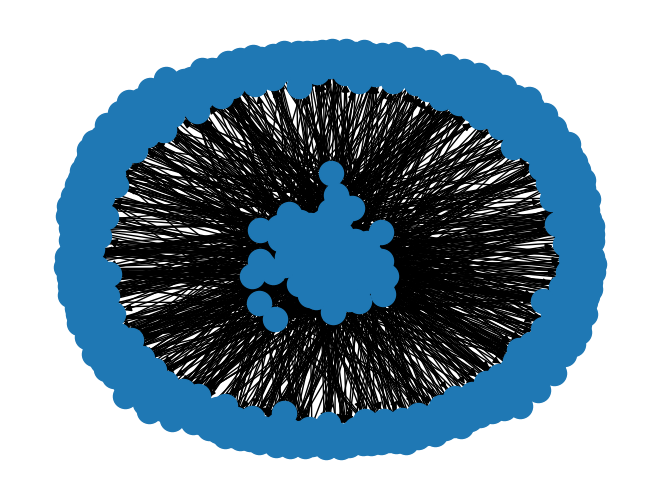

In [16]:
# plot superstar_network
nx.draw(superstar_network)
plt.show()

/opt/mamba/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129399 (\N{NINJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/mamba/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127999 (\N{EMOJI MODIFIER FITZPATRICK TYPE-6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


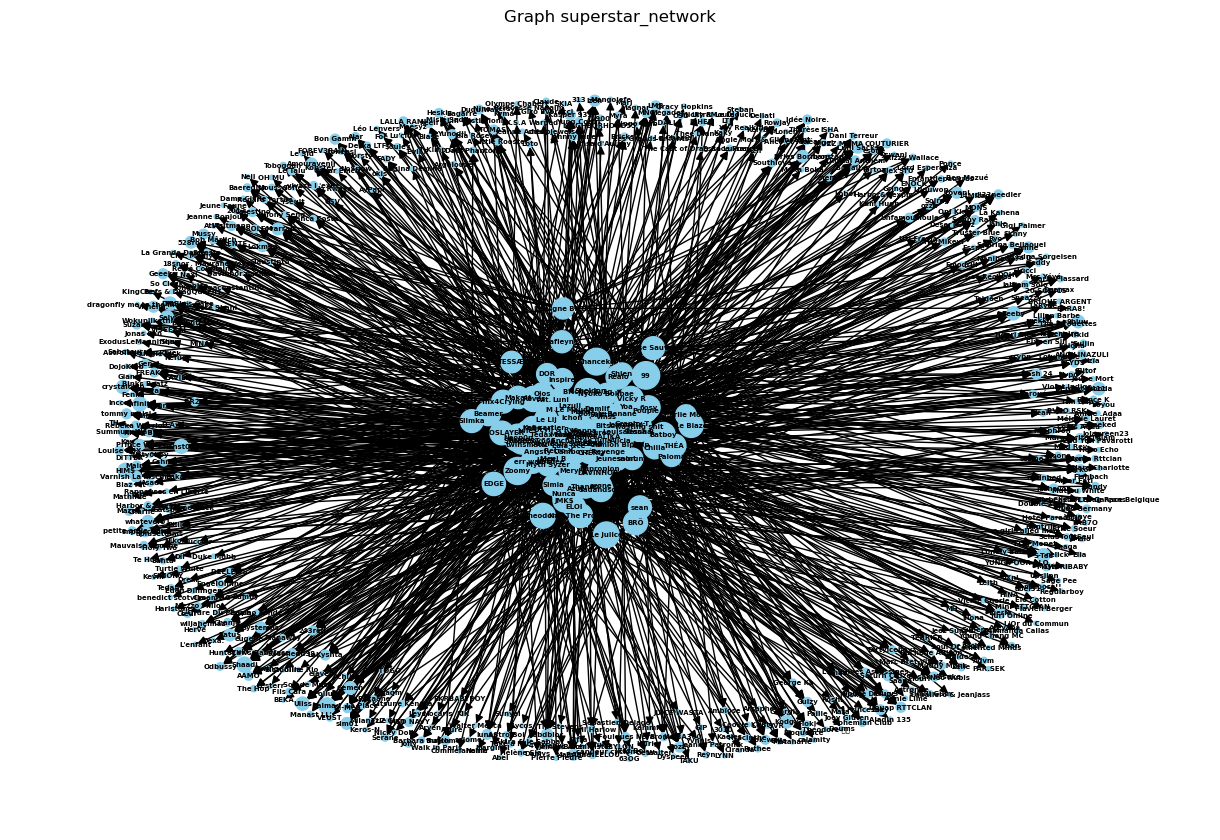

In [17]:
# Calculate the degrees (sum of in-degree and out-degree) of each node
degrees = {node: val for (node, val) in superstar_network.degree()}

# Plot the graph
plt.figure(figsize=(12, 8))
nx.draw(superstar_network, with_labels=True, node_size=[v * 10 for v in degrees.values()], 
        node_color='skyblue', font_weight='bold', font_size=5, 
        arrowstyle='-|>', arrowsize=12)
plt.title("Graph superstar_network")
plt.show()


In [18]:
## Why does the difference between Graph and DiGraph matter?

# Let's see how many edges superstar_network (directed graph) has:
print(superstar_network.number_of_edges())

# Now, let's repeat the calculation with an undirected version of the superstar_network graph:
superstar_network_undirected = nx.read_edgelist('Joanna_Network_names.txt', comments="Node", create_using=nx.Graph(), delimiter=',', data=False)
print(superstar_network_undirected.number_of_edges())

2000
1785


The difference in the number of edges between the directed and undirected graphs is due to the fact that in a directed graph, each edge counts as a specific relationship from one entity to another, whereas in an undirected graph, a single edge counts as a relationship that can be considered in both directions between the same entities.

Thus, there are 2000 specific relationships in the directed network, whereas in the undirected network, some of these relationships are counted twice, as they are considered in both directions, thus reducing the total number of edges to 1785.

In our case, we really want to use directed graph, as recommendation between artists are not necessarily reciproqual. 

In [19]:
# Identify nodes without sucessors (i.e. nodes for which we couldn't scrap the recommendations because of API restrictions in the number of request)
no_successors = [node for node, out_degree in superstar_network.out_degree() if out_degree == 0]
print("Nodes without successeurs:", no_successors)

Nodes without successeurs: ['DMS', 'HIM$', 'S-Tee', 'Ratu$', "Infinit'", 'Beeby', 'LMB', 'Eesah Yasuke', 'Leys', 'Tuerie', 'Kitsune Kendra', 'LaKyshta', 'Bon Gamin', 'Loveni', 'Prince Waly', 'Ikaz Boi', 'Varnish La Piscine', 'Di-Meh', 'Muddy Monk', 'Ateyaba', 'ANGILINAZULI', 'Amouravenir', 'Timéa', '47 Meow', 'Baeredith', 'Swing', 'Moka Boka', 'nelick', 'Moussa', 'ISHA', 'Damys', 'Chanje', 'Geeeko', 'TOMASI', 'Johnny Jane', 'Mauvaise Bouche', 'Claude', 'Zélie', 'Marguerite Thiam', 'TRENTE', 'P.R2B', 'Myra', 'jean', 'Iliona', 'Lilian Barbe', 'Coline Rio', 'Bianca Costa', 'RVCO RSK', 'Juste Shani', 'Moona', 'Rappeuses en Liberté', 'Micky R', 'Yvy Realkiller', 'Turtle White', 'Yseult', 'Suzane', 'Kemmler', 'Lonepsi', 'Kaky', 'Georgio', 'Janie', 'Ben Mazué', 'Achile', 'Zed Yun Pavarotti', 'Sabrina Bellaouel', 'The Hop', 'Flavien Berger', 'Walter Mecca', 'Lonely Band', 'Johan Papaconstantino', 'Gracy Hopkins', 'La Place', 'Cloé Mailly', 'Jahïem Solo', 'FADY', 'Sonny Rave', 'Jo Rwaka', 'Vann

To ensure the integrity of our analysis, we opt to exclude nodes that haven't been fully scraped, meaning nodes lacking all 20 recommendations. This decision aims to mitigate potential bias in our results. The rationale is to prevent the inadvertent labeling of certain artists as poorly connected, without discerning whether this perception stems from genuine network characteristics or from the limitations of our ability to collect complete recommendation data due to API constraints.

## B - Version "without no successors nodes"

### B1 - Create a complete version of the graph

In [20]:
superstar_network_restricted = nx.DiGraph()

# Iterate through all nodes in G
for node in superstar_network.nodes():
    # Check if the node has at least 1 successor
    if superstar_network.out_degree(node) > 0:
        # Add the node to G_new
        superstar_network_restricted.add_node(node)
        
        # Also add all outgoing edges from this node to G_new
        for succ in superstar_network.successors(node):
            # Ensure the successor also has a node with successors before adding
            if superstar_network.out_degree(succ) > 0:
                superstar_network_restricted.add_edge(node, succ)


Here, we create a restricted version of our directed graph. It iterates through each node in the original graph superstar_network and examines whether the node has at least 1 outgoing edges (successors). If a node meets this criterion, it is added to the restricted graph along with all of its outgoing edges. However, when adding the edges, it checks whether each successor node also has at least 1 outgoing edges before adding the edge. This process ensures that only nodes with 1 outgoing connections, as well as their related connections, are included in the restricted graph.

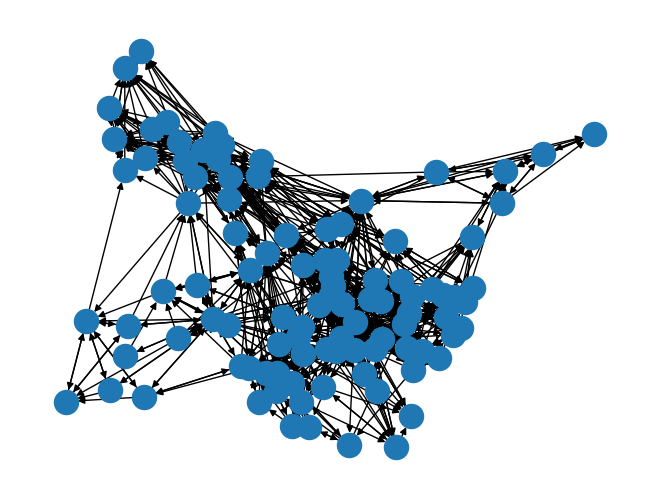

In [21]:
# Plot superstar_network
nx.draw(superstar_network_restricted)
plt.show()

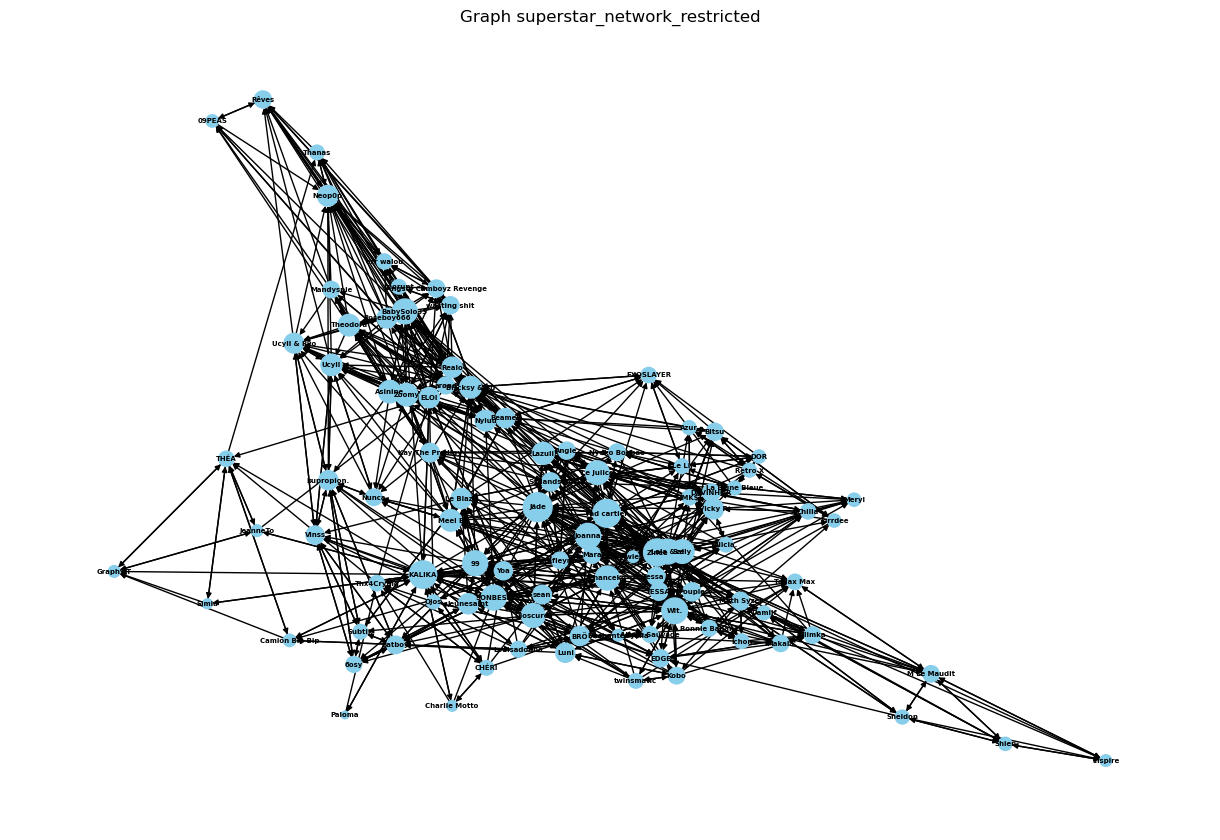

In [22]:
# Calculate the degrees (sum of in-degree and out-degree) of each node
degrees = {node: val for (node, val) in superstar_network_restricted.degree()}

# Plot the graph
plt.figure(figsize=(12, 8))
nx.draw(superstar_network_restricted, with_labels=True, node_size=[v * 10 for v in degrees.values()], 
        node_color='skyblue', font_weight='bold', font_size=5, 
        arrowstyle='-|>', arrowsize=8)
plt.title("Graph superstar_network_restricted")
plt.show()

### B2 - Basic properties of graph

In [23]:
# Number of nodes and edges
superstar_network_restricted.number_of_nodes(), superstar_network_restricted.number_of_edges()

(100, 855)

In [24]:
# See nodes 
print(superstar_network_restricted.nodes())

['Joanna', 'Jäde', 'Sally', 'KALIKA', 'Zinée', 'Dioscures', 'Lala &ce', 'BabySolo33', 'rad cartier', 'Wit.', 'Le Juiice', 'Myth Syzer', 'Lazuli', 'Ichon', 'SONBEST', 'Yoa', 'Vicky R', 'Poupie', 'Bonnie Banane', 'Lafleyne', 'Asinine', '99', 'Chanceko', 'Jeunesaint', 'Kay The Prodigy', 'Theodora', 'Meel B', 'Bitsu', 'Enchantée Julia', 'Beamer', 'Alicia.', 'Tessa B', 'DAVINHOR', 'TESSÆ', 'Chilla', 'Meryl', 'Angie', 'BRÖ', 'CHÉRI', 'Louisadonna', 'ELOI', 'Thx4Crying', 'THÉA', 'Camion Bip Bip', 'Paloma', 'Ojos', 'JeanneTo', 'Mara', 'Aloïse Sauvage', 'Graphy-T', 'Simia', 'Charlie Motto', 'M Le Maudit', 'Sheldon', 'Damlif', 'Roseboy666', 'Inspire', 'Shien', 'Nunca', 'sean', 'Nyluu', 'arøne', 'Realo', 'Batboy', 'Le Blaze', '6osy', 'Vinss', 'twinsmatic', 'bupropion.', 'EDGE', 'Tedax Max', 'Subtik', 'Luni', 'Jorrdee', 'JMK$', 'Slimka', 'Makala', 'Retro X', 'Azur', 'Kobo', 'Angsty Camboyz Revenge', 'Bricksy & 3g', 'wasting shit', 'Neop0p', '09PEAS', 'snorunt', 'Mandyspie', 'Thanas', 'Zoomy', 'Ucy

In [25]:
# See edges
print(superstar_network_restricted.edges())

[('Joanna', 'Jäde'), ('Joanna', 'Sally'), ('Joanna', 'KALIKA'), ('Joanna', 'Zinée'), ('Joanna', 'Dioscures'), ('Joanna', 'Lala &ce'), ('Joanna', 'BabySolo33'), ('Joanna', 'rad cartier'), ('Joanna', 'Wit.'), ('Joanna', 'Le Juiice'), ('Joanna', 'Myth Syzer'), ('Joanna', 'Lazuli'), ('Joanna', 'Ichon'), ('Joanna', 'SONBEST'), ('Joanna', 'Yoa'), ('Joanna', 'Vicky R'), ('Joanna', 'Poupie'), ('Joanna', 'Bonnie Banane'), ('Joanna', 'Lafleyne'), ('Joanna', 'Asinine'), ('Jäde', 'rad cartier'), ('Jäde', 'Lafleyne'), ('Jäde', 'BabySolo33'), ('Jäde', 'Zinée'), ('Jäde', '99'), ('Jäde', 'Chanceko'), ('Jäde', 'Lazuli'), ('Jäde', 'Lala &ce'), ('Jäde', 'Joanna'), ('Jäde', 'SONBEST'), ('Jäde', 'Jeunesaint'), ('Jäde', 'Dioscures'), ('Jäde', 'Kay The Prodigy'), ('Jäde', 'Theodora'), ('Jäde', 'Meel B'), ('Jäde', 'Bitsu'), ('Jäde', 'Wit.'), ('Jäde', 'Enchantée Julia'), ('Jäde', 'Le Juiice'), ('Jäde', 'Beamer'), ('Sally', 'Joanna'), ('Sally', 'Vicky R'), ('Sally', 'Alicia.'), ('Sally', 'Jäde'), ('Sally', 'Le 

In [26]:
# Indegrees
superstar_network_restricted.in_degree()

InDegreeView({'Joanna': 13, 'Jäde': 23, 'Sally': 9, 'KALIKA': 19, 'Zinée': 18, 'Dioscures': 9, 'Lala &ce': 12, 'BabySolo33': 12, 'rad cartier': 23, 'Wit.': 18, 'Le Juiice': 14, 'Myth Syzer': 5, 'Lazuli': 11, 'Ichon': 4, 'SONBEST': 17, 'Yoa': 10, 'Vicky R': 11, 'Poupie': 8, 'Bonnie Banane': 5, 'Lafleyne': 5, 'Asinine': 11, '99': 19, 'Chanceko': 17, 'Jeunesaint': 10, 'Kay The Prodigy': 10, 'Theodora': 12, 'Meel B': 17, 'Bitsu': 8, 'Enchantée Julia': 3, 'Beamer': 11, 'Alicia.': 4, 'Tessa B': 3, 'DAVINHOR': 7, 'TESSÆ': 4, 'Chilla': 7, 'Meryl': 7, 'Angie': 6, 'BRÖ': 10, 'CHÉRI': 4, 'Louisadonna': 4, 'ELOI': 6, 'Thx4Crying': 7, 'THÉA': 7, 'Camion Bip Bip': 4, 'Paloma': 1, 'Ojos': 4, 'JeanneTo': 3, 'Mara': 2, 'Aloïse Sauvage': 7, 'Graphy-T': 5, 'Simia': 2, 'Charlie Motto': 2, 'M Le Maudit': 9, 'Sheldon': 4, 'Damlif': 3, 'Roseboy666': 6, 'Inspire': 5, 'Shien': 5, 'Nunca': 9, 'sean': 7, 'Nyluu': 13, 'arøne': 5, 'Realo': 10, 'Batboy': 9, 'Le Blaze': 11, '6osy': 8, 'Vinss': 11, 'twinsmatic': 3, '

In [27]:
# Outdegrees
superstar_network_restricted.out_degree()

OutDegreeView({'Joanna': 20, 'Jäde': 20, 'Sally': 20, 'KALIKA': 20, 'Zinée': 20, 'Dioscures': 20, 'Lala &ce': 20, 'BabySolo33': 20, 'rad cartier': 17, 'Wit.': 16, 'Le Juiice': 15, 'Myth Syzer': 11, 'Lazuli': 14, 'Ichon': 7, 'SONBEST': 15, 'Yoa': 7, 'Vicky R': 10, 'Poupie': 9, 'Bonnie Banane': 8, 'Lafleyne': 9, 'Asinine': 15, '99': 13, 'Chanceko': 13, 'Jeunesaint': 11, 'Kay The Prodigy': 8, 'Theodora': 12, 'Meel B': 7, 'Bitsu': 7, 'Enchantée Julia': 4, 'Beamer': 8, 'Alicia.': 7, 'Tessa B': 13, 'DAVINHOR': 9, 'TESSÆ': 12, 'Chilla': 5, 'Meryl': 2, 'Angie': 9, 'BRÖ': 9, 'CHÉRI': 7, 'Louisadonna': 9, 'ELOI': 15, 'Thx4Crying': 5, 'THÉA': 5, 'Camion Bip Bip': 4, 'Paloma': 2, 'Ojos': 6, 'JeanneTo': 4, 'Mara': 13, 'Aloïse Sauvage': 6, 'Graphy-T': 2, 'Simia': 3, 'Charlie Motto': 4, 'M Le Maudit': 5, 'Sheldon': 6, 'Damlif': 7, 'Roseboy666': 14, 'Inspire': 2, 'Shien': 4, 'Nunca': 5, 'sean': 11, 'Nyluu': 9, 'arøne': 10, 'Realo': 11, 'Batboy': 7, 'Le Blaze': 10, '6osy': 5, 'Vinss': 6, 'twinsmatic': 

In [28]:
# Degree (= sum of in and outdegree)
superstar_network_restricted.degree()

DiDegreeView({'Joanna': 33, 'Jäde': 43, 'Sally': 29, 'KALIKA': 39, 'Zinée': 38, 'Dioscures': 29, 'Lala &ce': 32, 'BabySolo33': 32, 'rad cartier': 40, 'Wit.': 34, 'Le Juiice': 29, 'Myth Syzer': 16, 'Lazuli': 25, 'Ichon': 11, 'SONBEST': 32, 'Yoa': 17, 'Vicky R': 21, 'Poupie': 17, 'Bonnie Banane': 13, 'Lafleyne': 14, 'Asinine': 26, '99': 32, 'Chanceko': 30, 'Jeunesaint': 21, 'Kay The Prodigy': 18, 'Theodora': 24, 'Meel B': 24, 'Bitsu': 15, 'Enchantée Julia': 7, 'Beamer': 19, 'Alicia.': 11, 'Tessa B': 16, 'DAVINHOR': 16, 'TESSÆ': 16, 'Chilla': 12, 'Meryl': 9, 'Angie': 15, 'BRÖ': 19, 'CHÉRI': 11, 'Louisadonna': 13, 'ELOI': 21, 'Thx4Crying': 12, 'THÉA': 12, 'Camion Bip Bip': 8, 'Paloma': 3, 'Ojos': 10, 'JeanneTo': 7, 'Mara': 15, 'Aloïse Sauvage': 13, 'Graphy-T': 7, 'Simia': 5, 'Charlie Motto': 6, 'M Le Maudit': 14, 'Sheldon': 10, 'Damlif': 10, 'Roseboy666': 20, 'Inspire': 7, 'Shien': 9, 'Nunca': 14, 'sean': 18, 'Nyluu': 22, 'arøne': 15, 'Realo': 21, 'Batboy': 16, 'Le Blaze': 21, '6osy': 13, 

In [29]:
# Let's look at a node in particular, for ex. Jäde
superstar_network_restricted.in_degree('Jäde'), superstar_network_restricted.out_degree('Jäde'), superstar_network_restricted.degree('Jäde')

(23, 20, 43)

In [30]:
# Neighbours of node Jäde: predecessors
list(superstar_network_restricted.predecessors('Jäde'))

['Joanna',
 'Sally',
 'KALIKA',
 'Zinée',
 'Dioscures',
 'Lala &ce',
 'rad cartier',
 'Le Juiice',
 'Myth Syzer',
 'Lazuli',
 'Ichon',
 'Vicky R',
 'Bonnie Banane',
 'Lafleyne',
 'Enchantée Julia',
 'Alicia.',
 'Tessa B',
 'DAVINHOR',
 'TESSÆ',
 'Angie',
 'BRÖ',
 'Mara',
 'Nyoko Bokbae']

The predecessors of a node n are the nodes m such that there exists a directed edge from m to n.

Here the predecessors of a given artist A are all artists who recommends A. 

In [31]:
# Neighbours of node Jäde: successors
list(superstar_network_restricted.successors('Jäde'))

['rad cartier',
 'Lafleyne',
 'BabySolo33',
 'Zinée',
 '99',
 'Chanceko',
 'Lazuli',
 'Lala &ce',
 'Joanna',
 'SONBEST',
 'Jeunesaint',
 'Dioscures',
 'Kay The Prodigy',
 'Theodora',
 'Meel B',
 'Bitsu',
 'Wit.',
 'Enchantée Julia',
 'Le Juiice',
 'Beamer']

The successors of a node n are the nodes h such that there exists a directed edge from n to h.

Here the successors of a given artist A are all artists who are recommended by A.

The number of successors for an artist will be always 20, because we know that all artists systematically recommend 20 other artists on Spotify.

In [32]:
# Let's choose a particular node, for example Jäde, and Joanna
superstar_network_restricted.degree('Jäde'), superstar_network_restricted.degree('Joanna')
# Jäde has a higher degree than Joanna (while Joanna is #1)

(43, 33)

In [33]:
# Neighbors of node Jäde --> we get the same results as the list of her predecessors
list(superstar_network_restricted.adj['Jäde'])

['rad cartier',
 'Lafleyne',
 'BabySolo33',
 'Zinée',
 '99',
 'Chanceko',
 'Lazuli',
 'Lala &ce',
 'Joanna',
 'SONBEST',
 'Jeunesaint',
 'Dioscures',
 'Kay The Prodigy',
 'Theodora',
 'Meel B',
 'Bitsu',
 'Wit.',
 'Enchantée Julia',
 'Le Juiice',
 'Beamer']

# II - Matching graphs and node attributes

In [34]:
# Open attributes of the whole network
network_attributes = pd.read_table("Joanna_Attr_Network.csv", sep=',')

In [35]:
network_attributes.head()

Artist_Name  NB_Followers                                        Genres  \
0      Joanna       31771.0                              ['rennes indie']   
1        Jäde       16064.0  ['rap calme', 'rap francais nouvelle vague']   
2       Sally       12790.0                                            []   
3      KALIKA       12521.0                                ['french pop']   
4       Zinée       14656.0                                 ['rap calme']   

   Popularity Nationality   Age  Death    Type  Gender  Total_Release  ...  \
0        34.0      Brazil  67.0  False  Person  female           20.0  ...   
1        35.0        Lyon   NaN  False  Person  female           20.0  ...   
2        19.0         NaN   NaN  False     NaN     NaN           19.0  ...   
3        31.0      France   NaN  False  Person  female           20.0  ...   
4        32.0      France  27.0  False  Person  female           17.0  ...   

   Acousticness  Danceability    Duration_MS    Energy  Instrumentalness  \
0      0.280100      0.708667  204868.000000  0.549667          0.000000   
1      0.414333      0.757667  171742.000000  0.510333          0.000170   
2      0.455667      0.666667  203684.333333  0.461000          0.000267   
3      0.321600      0.784000  184395.666667  0.669000          0.008167   
4      0.515667      0.719667  252587.333333  0.441333          0.003613   

   Liveness   Loudness  Speechiness       Tempo   Valence  
0  0.115200  -8.712667     0.149967  100.518667  0.267567  
1  0.094267  -8.483667     0.085900  133.548333  0.547333  
2  0.074333  -8.858333     0.155467  123.644000  0.287233  
3  0.092200  -7.159000     0.039700  132.689667  0.751667  
4  0.162000 -10.733333     0.159933  127.027000  0.403333  

[5 rows x 23 columns]

In [36]:
network_attributes.shape

(645, 23)

In [37]:
network_attributes.columns

Index(['Artist_Name', 'NB_Followers', 'Genres', 'Popularity', 'Nationality',
       'Age', 'Death', 'Type', 'Gender', 'Total_Release', 'Available_Markets',
       'Year_Last_Release', 'Type_Last_Release', 'Acousticness',
       'Danceability', 'Duration_MS', 'Energy', 'Instrumentalness', 'Liveness',
       'Loudness', 'Speechiness', 'Tempo', 'Valence'],
      dtype='object')

In [38]:
# Remove duplicates based on the 'Artist_Name' column
network_attributes_unique = network_attributes.drop_duplicates(subset=['Artist_Name'])

# Match nodes of digraph with attributes of nodes
network_attributes_data = network_attributes_unique.set_index('Artist_Name').to_dict('index').items()
superstar_network_restricted.add_nodes_from(network_attributes_data)

# View results
print(superstar_network_restricted.nodes(data=True))


[('Joanna', {'NB_Followers': 31771.0, 'Genres': "['rennes indie']", 'Popularity': 34.0, 'Nationality': 'Brazil', 'Age': 67.0, 'Death': False, 'Type': 'Person', 'Gender': 'female', 'Total_Release': 20.0, 'Available_Markets': 185.0, 'Year_Last_Release': 2023.0, 'Type_Last_Release': 'album', 'Acousticness': 0.2801, 'Danceability': 0.7086666666666667, 'Duration_MS': 204868.0, 'Energy': 0.5496666666666666, 'Instrumentalness': 0.0, 'Liveness': 0.1152, 'Loudness': -8.712666666666665, 'Speechiness': 0.1499666666666666, 'Tempo': 100.51866666666668, 'Valence': 0.2675666666666667}), ('Jäde', {'NB_Followers': 16064.0, 'Genres': "['rap calme', 'rap francais nouvelle vague']", 'Popularity': 35.0, 'Nationality': 'Lyon', 'Age': nan, 'Death': False, 'Type': 'Person', 'Gender': 'female', 'Total_Release': 20.0, 'Available_Markets': 6.0, 'Year_Last_Release': 2024.0, 'Type_Last_Release': 'album', 'Acousticness': 0.4143333333333334, 'Danceability': 0.7576666666666667, 'Duration_MS': 171742.0, 'Energy': 0.51

In [39]:
superstar_network_restricted.number_of_nodes(), superstar_network_restricted.number_of_edges()

(536, 855)

In [40]:
# view results
print(superstar_network_restricted.edges(data=True))

[('Joanna', 'Jäde', {}), ('Joanna', 'Sally', {}), ('Joanna', 'KALIKA', {}), ('Joanna', 'Zinée', {}), ('Joanna', 'Dioscures', {}), ('Joanna', 'Lala &ce', {}), ('Joanna', 'BabySolo33', {}), ('Joanna', 'rad cartier', {}), ('Joanna', 'Wit.', {}), ('Joanna', 'Le Juiice', {}), ('Joanna', 'Myth Syzer', {}), ('Joanna', 'Lazuli', {}), ('Joanna', 'Ichon', {}), ('Joanna', 'SONBEST', {}), ('Joanna', 'Yoa', {}), ('Joanna', 'Vicky R', {}), ('Joanna', 'Poupie', {}), ('Joanna', 'Bonnie Banane', {}), ('Joanna', 'Lafleyne', {}), ('Joanna', 'Asinine', {}), ('Jäde', 'rad cartier', {}), ('Jäde', 'Lafleyne', {}), ('Jäde', 'BabySolo33', {}), ('Jäde', 'Zinée', {}), ('Jäde', '99', {}), ('Jäde', 'Chanceko', {}), ('Jäde', 'Lazuli', {}), ('Jäde', 'Lala &ce', {}), ('Jäde', 'Joanna', {}), ('Jäde', 'SONBEST', {}), ('Jäde', 'Jeunesaint', {}), ('Jäde', 'Dioscures', {}), ('Jäde', 'Kay The Prodigy', {}), ('Jäde', 'Theodora', {}), ('Jäde', 'Meel B', {}), ('Jäde', 'Bitsu', {}), ('Jäde', 'Wit.', {}), ('Jäde', 'Enchantée Ju

In [41]:
# To view attributes, for example, 'Nationality'
nationalities = nx.get_node_attributes(superstar_network_restricted,'Nationality')
print(nationalities)

{'Joanna': 'Brazil', 'Jäde': 'Lyon', 'Sally': nan, 'KALIKA': 'France', 'Zinée': 'France', 'Dioscures': 'Paris', 'Lala &ce': 'United Kingdom', 'BabySolo33': nan, 'rad cartier': 'Paris', 'Wit.': 'France', 'Le Juiice': 'France', 'Myth Syzer': 'France', 'Lazuli': 'France', 'Ichon': 'France', 'SONBEST': nan, 'Yoa': nan, 'Vicky R': nan, 'Poupie': 'France', 'Bonnie Banane': 'France', 'Lafleyne': 'France', 'Asinine': nan, '99': 'Germany', 'Chanceko': nan, 'Jeunesaint': 'France', 'Kay The Prodigy': nan, 'Theodora': 'France', 'Meel B': nan, 'Bitsu': 'France', 'Enchantée Julia': 'France', 'Beamer': nan, 'Alicia.': 'United States', 'Tessa B': nan, 'DAVINHOR': nan, 'TESSÆ': 'France', 'Chilla': 'France', 'Meryl': 'France', 'Angie': 'Japan', 'BRÖ': nan, 'CHÉRI': 'France', 'Louisadonna': 'France', 'ELOI': 'Paris', 'Thx4Crying': nan, 'THÉA': 'France', 'Camion Bip Bip': nan, 'Paloma': nan, 'Ojos': nan, 'JeanneTo': 'France', 'Mara': 'Mexico', 'Aloïse Sauvage': 'France', 'Graphy-T': nan, 'Simia': nan, 'Ch

In [42]:
# To view the value for a single node (for example, artist Britney Spears)
nationalities['Jäde'] 

'Lyon'

In [43]:
######################### Mini-digression ##############################

### A separate file with nodes (possibly with attributes)
### must be imported separately from the edge list, and 'added' to the graph if there are isolates (which do not appear in edgelists)

superstar_network2 = nx.read_edgelist('Joanna_Network_names.txt', comments="Node", create_using=nx.DiGraph(), delimiter=',', data=False)
# see nodes
superstar_network2.nodes()

NodeView(('Joanna', 'Jäde', 'Sally', 'KALIKA', 'Zinée', 'Dioscures', 'Lala &ce', 'BabySolo33', 'rad cartier', 'Wit.', 'Le Juiice', 'Myth Syzer', 'Lazuli', 'Ichon', 'SONBEST', 'Yoa', 'Vicky R', 'Poupie', 'Bonnie Banane', 'Lafleyne', 'Asinine', '99', 'Chanceko', 'Jeunesaint', 'Kay The Prodigy', 'Theodora', 'Meel B', 'Bitsu', 'Enchantée Julia', 'Beamer', 'Alicia.', 'Tessa B', 'DAVINHOR', 'TESSÆ', 'Chilla', 'Meryl', 'Angie', 'BRÖ', 'CHÉRI', 'Louisadonna', 'ELOI', 'Thx4Crying', 'THÉA', 'Camion Bip Bip', 'Paloma', 'Ojos', 'JeanneTo', 'Mara', 'Aloïse Sauvage', 'Graphy-T', 'Simia', 'Charlie Motto', 'M Le Maudit', 'Sheldon', 'Damlif', 'Roseboy666', 'Inspire', 'Shien', 'Nunca', 'sean', 'Nyluu', 'arøne', 'Realo', 'Batboy', 'Le Blaze', '6osy', 'Vinss', 'twinsmatic', 'bupropion.', 'EDGE', 'Tedax Max', 'Subtik', 'Luni', 'Jorrdee', 'JMK$', 'Slimka', 'Makala', 'Retro X', 'Azur', 'Kobo', 'Angsty Camboyz Revenge', 'Bricksy & 3g', 'wasting shit', 'Neop0p', '09PEAS', 'snorunt', 'Mandyspie', 'Thanas', 'Zoo

In [44]:
# See number of nodes
len(superstar_network2.nodes())

645

In [45]:
# See number of nodes
len(superstar_network_restricted.nodes())

536

In [46]:
# now add attributes
superstar_network_restricted.add_nodes_from(network_attributes['Artist_Name'].tolist())

# how many nodes now?
len(superstar_network_restricted.nodes())

############### end of digression ##############

536

# III - Local structures

## A - Isolates, Dyads and Triads

/opt/mamba/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129399 (\N{NINJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/mamba/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127999 (\N{EMOJI MODIFIER FITZPATRICK TYPE-6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


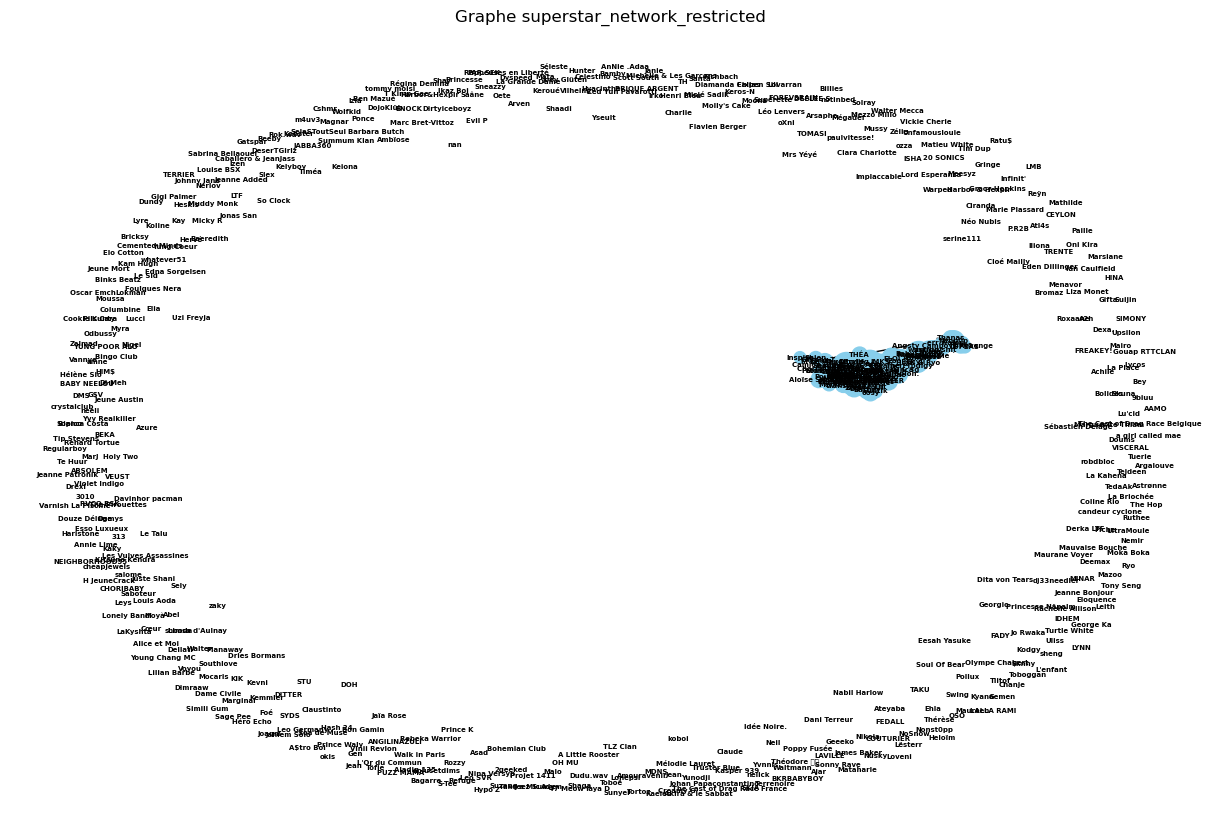

In [47]:
# Calculate the degrees (sum of in-degree and out-degree) of each node
degrees = {node: val for (node, val) in superstar_network_restricted.degree()}

# Draw the graph
plt.figure(figsize=(12, 8))
nx.draw(superstar_network_restricted, with_labels=True, node_size=[v * 10 for v in degrees.values()], 
        node_color='skyblue', font_weight='bold', font_size=5, 
        arrowstyle='-|>', arrowsize=8)
plt.title("Graphe superstar_network_restricted")
plt.show()

In [48]:
# Identify isolates
list(nx.isolates(superstar_network_restricted))  

['TOMASI',
 'DMS',
 'S-Tee',
 'HIM$',
 'Ratu$',
 "Infinit'",
 'Beeby',
 'LMB',
 'Eesah Yasuke',
 'Leys',
 'Tuerie',
 'LaKyshta',
 'Kitsune Kendra',
 'Bon Gamin',
 'Loveni',
 'Prince Waly',
 'Ikaz Boi',
 'Varnish La Piscine',
 'Di-Meh',
 'Muddy Monk',
 'Ateyaba',
 'ANGILINAZULI',
 'Amouravenir',
 'Timéa',
 '47 Meow',
 'Baeredith',
 'Swing',
 'Moka Boka',
 'nelick',
 'Moussa',
 'ISHA',
 'Damys',
 'Chanje',
 'Geeeko',
 'Mauvaise Bouche',
 'Johnny Jane',
 'Claude',
 'Zélie',
 'Marguerite Thiam',
 'TRENTE',
 'P.R2B',
 'jean',
 'Myra',
 'Iliona',
 'Lilian Barbe',
 'Coline Rio',
 'Bianca Costa',
 'RVCO RSK',
 'Juste Shani',
 'Moona',
 'Rappeuses en Liberté',
 'Micky R',
 'Yvy Realkiller',
 'Turtle White',
 'La Place',
 'Cloé Mailly',
 'Jahïem Solo',
 'FADY',
 'Sonny Rave',
 'Vannye',
 'Jo Rwaka',
 'Kohster',
 'Heloïm',
 'Yseult',
 'Suzane',
 'Kemmler',
 'Lonepsi',
 'Kaky',
 'Georgio',
 'Janie',
 'Ben Mazué',
 'Achile',
 'Zed Yun Pavarotti',
 'Sabrina Bellaouel',
 'The Hop',
 'Flavien Berger',

In [49]:
isolates_list = list(nx.isolates(superstar_network_restricted))
distinct_isolates_count = len(set(isolates_list))
print("Number distinct of isolats :", distinct_isolates_count)

Number distinct of isolats : 436


In [50]:
# We decide to keep only artists that have at least 1 successors (i.e remove isolats here)
superstar_network_restricted.remove_nodes_from(isolates_list)

# Check the number
print("Number of removed isolates :", len(isolates_list))

Number of removed isolates : 436


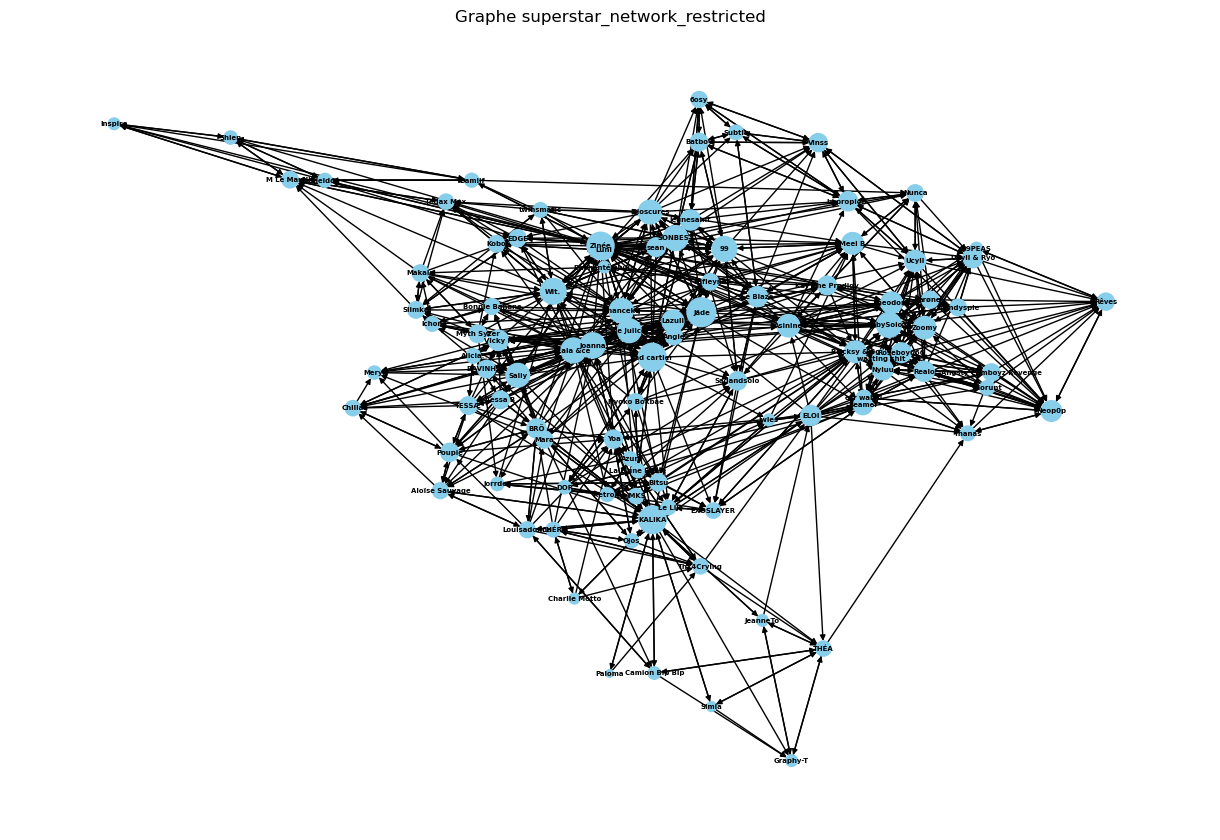

In [51]:
# Calculate the degrees (sum of in-degree and out-degree) of each node
degrees = {node: val for (node, val) in superstar_network_restricted.degree()}

# Draw the graph
plt.figure(figsize=(12, 8))
nx.draw(superstar_network_restricted, with_labels=True, node_size=[v * 10 for v in degrees.values()], 
        node_color='skyblue', font_weight='bold', font_size=5, 
        arrowstyle='-|>', arrowsize=8)
plt.title("Graphe superstar_network_restricted")
plt.show()

In [52]:
# Dyads: Reciprocity (we can do it because superstar_network_restricted is a directed graph)
nx.reciprocity(superstar_network_restricted)
print(round(nx.reciprocity(superstar_network_restricted)*100,1), "% of recommendations are reciprocical.")

50.3 % of recommendations are reciprocical.


50.3% of recommendations in this network are reciprocal. In our context, reciprocity means that if artist A recommends artist B, then artist B also recommends artist A.

- A reciprocity of 50.3% suggests a significant level of mutual recommendation connections within the Spotify network. This implies that many recommendation relationships are bidirectional, indicating a pattern where if one artist recommends another, there's a high likelihood of mutual recommendation.
- This reciprocity could imply a balanced and reciprocal relationship in the recommendation system provided by Spotify. It may reflect a feature of Spotify's recommendation algorithm, where artists are often recommended in pairs or groups based on similar musical styles or user preferences.
- The high level of reciprocity could also indicate the effectiveness of Spotify's recommendation system in creating interconnected artist networks, where recommendations foster mutual discovery and support among artists.

However, it's essential to note that while the recommendations themselves are made by Spotify's algorithm rather than the artists directly, the presence of reciprocity still reflects underlying patterns of mutual affinity or similarity in the musical tastes of the artists within the network.

In [53]:
# Triads: global transitivity
print(nx.transitivity(superstar_network_restricted)) # this is the global clustering coefficient

0.3854001360235774


The global clustering coefficient, also known as transitivity, measures the degree to which nodes in a network are grouped into cliques or triangles.

The overall clustering coefficient of 0.38 suggests a significant level of clustering within the restricted superstar network. This means that there is a tendency for artists recommended by the same artist to be equally likely to recommend each other. In other words, if artist A recommends both artist B and artist C, it's likely that artists B and C are also connected.

In [54]:
# Triads: local transitivity
print(nx.clustering(superstar_network_restricted))  

{'Joanna': 0.2547892720306513, 'Jäde': 0.22874720357941836, 'Sally': 0.35050251256281406, 'KALIKA': 0.19559228650137742, 'Zinée': 0.1812320916905444, 'Dioscures': 0.39321608040201006, 'Lala &ce': 0.23529411764705882, 'BabySolo33': 0.25967413441955195, 'rad cartier': 0.23994811932555124, 'Wit.': 0.3016304347826087, 'Le Juiice': 0.3479899497487437, 'Myth Syzer': 0.40086206896551724, 'Lazuli': 0.3938356164383562, 'Ichon': 0.5188679245283019, 'SONBEST': 0.39197530864197533, 'Yoa': 0.4576923076923077, 'Vicky R': 0.4605911330049261, 'Poupie': 0.46153846153846156, 'Bonnie Banane': 0.4266666666666667, 'Lafleyne': 0.40804597701149425, 'Asinine': 0.2859375, '99': 0.35523613963039014, 'Chanceko': 0.3820093457943925, 'Jeunesaint': 0.5172413793103449, 'Kay The Prodigy': 0.29, 'Theodora': 0.3081180811808118, 'Meel B': 0.3025830258302583, 'Bitsu': 0.3712871287128713, 'Enchantée Julia': 0.39473684210526316, 'Beamer': 0.26047904191616766, 'Alicia.': 0.7156862745098039, 'Tessa B': 0.5170940170940171, 'D

In [55]:
# Let's look at the average local transitivity
print(nx.average_clustering(superstar_network_restricted))
# Triads: global transitivity
print(nx.transitivity(superstar_network_restricted))

0.4562013042063019
0.3854001360235774


- The average local transitivity measure represents the average local clustering coefficient in the network. This means that, on average, the neighbors of a given node have a 45.62% probability of forming triangles with each other. This indicates significant cohesion in the network's local clusters.

- The global transitivity represents the global clustering coefficient, also known as transitivity, which measures the degree to which nodes are grouped into cliques or triangles throughout the network. It is similar to average local transitivity, but measures clustering at the scale of the network as a whole.

Both measures show fairly similar levels of transitivity in the network, with the local average slightly higher than the global transitivity. This suggests that, although local clusters tend to be strongly connected, this cohesion is also maintained at the scale of the network as a whole.

## B - Other indicators of cohesion

In [56]:
# Density
nx.density(superstar_network_restricted)

0.08636363636363636

A network density of 8.64% indicates a sparse network, suggesting that there are a moderate number of connections between artists relative to all possible connections.

This may indicate that there are still opportunities to establish new connections in the network, which could encourage the discovery of new artists and strengthen the cohesion of the artistic community on Spotify.
However, a lower density may also indicate a structured organization of the network, where connections are selectively established according to specific criteria, such as professional relationships or musical affinities.

In the context of Spotify's artist recommendation network, this suggests that there is a relatively low density of connections among the superstar artists. This could mean that while certain artists may be highly recommended or influential within the network, there are still many potential connections or collaborations that have not yet been established among them.

In [57]:
# To find cliques that are only defined for undirected graphs, we need to convert superstar_network_restricted to an undirected graph
superstar_network_restricted_UG = nx.DiGraph.to_undirected(superstar_network_restricted)
print(list(nx.find_cliques(superstar_network_restricted_UG)))

[['Mandyspie', 'Rêves', 'BabySolo33', 'Neop0p', '09PEAS', 'arøne'], ['Mandyspie', 'Rêves', 'BabySolo33', 'Neop0p', 'Ucyll & Ryo'], ['Mandyspie', 'Theodora', 'Neop0p', 'BabySolo33', 'Asinine', 'Zoomy', 'Ucyll & Ryo'], ['Mandyspie', 'Theodora', 'Neop0p', 'BabySolo33', 'Asinine', 'arøne'], ['Mandyspie', 'Theodora', 'Neop0p', 'BabySolo33', '09PEAS', 'arøne'], ['Mandyspie', 'Theodora', 'Kay The Prodigy', 'Zoomy', 'Asinine'], ['Ucyll', 'Beamer', 'Zoomy', 'Roseboy666', 'Realo', 'Nyluu'], ['Ucyll', 'Beamer', 'Zoomy', 'Roseboy666', 'Realo', 'Bricksy & 3g'], ['Ucyll', 'Beamer', 'Zoomy', 'Meel B', 'Bricksy & 3g'], ['Ucyll', 'Beamer', 'Le Blaze', 'Bricksy & 3g', 'Meel B'], ['Ucyll', 'Ucyll & Ryo', 'bupropion.', 'Asinine', 'Nunca'], ['Ucyll', 'Ucyll & Ryo', 'bupropion.', 'Asinine', 'Neop0p'], ['Ucyll', 'Ucyll & Ryo', 'bupropion.', 'Vinss'], ['Ucyll', 'Ucyll & Ryo', 'Rêves', 'Nyluu', 'BabySolo33', 'Neop0p'], ['Ucyll', 'Ucyll & Ryo', 'Zoomy', 'Nunca', 'Asinine'], ['Ucyll', 'Ucyll & Ryo', 'Zoomy', 'Nu

In [58]:
len(list(nx.find_cliques(superstar_network_restricted_UG)))

209

A clique is a subgraph in which every node is directly connected to every other node.

There are numerous tightly-knit groups or clusters of artists within the restricted network on Spotify. In the context of Spotify's artist recommendation network, these cliques could represent communities of artists who are frequently recommended together or who share similar characteristics, genres, or fan bases. This indicates a degree of cohesion and interconnectedness among certain groups of artists, which could influence how recommendations are made within these specific clusters.

## C - Global structures: connectivity

The graph doesn't have any isolates so it is connected and we can define the diameter and the average shortest path length 

In [59]:
print(nx.is_weakly_connected(superstar_network_restricted))
print(nx.is_strongly_connected(superstar_network_restricted))

True
True


In [60]:
# To check diameter and average_shortest_path_length we need to use the undirected version of the graph
print(nx.diameter(superstar_network_restricted_UG))
print(nx.average_shortest_path_length(superstar_network_restricted)) # we can compute it since the graph is strongly connected. 
#Otherwise we should have used the unidrected version of the graph

4
3.5603030303030305


- Network diameter: The diameter of a network is the maximum length of the shortest path between two nodes furthest apart in the network. Here, the network diameter is 4.

- Average length of shortest path: This is the average of the shortest paths between all pairs of nodes in the network. Here, the average length of the shortest path is about 3.56.

A network diameter of 4 indicates that the network is relatively small, as it only takes 4 steps to get from the farthest artist to another in the network. This suggests strong overall connectivity between artists.

An average shortest path length of around 3.56 indicates that, on average, it takes around 3.5 steps to get from one artist to another in the network. This indicates relative proximity between artists and good accessibility across the network.

These measurements suggest a well-connected and coherent structure in the superstar network on Spotify, with artists interconnected by relatively short paths. This favors information flow, collaboration and artist discovery within the network.

In [61]:
# The graph is directed so we can use in and out degrees

# indegree centrality (incoming ties, only for directed graphs)
print(nx.in_degree_centrality(superstar_network_restricted))

# outdegree centrality (outgoing ties)
print(nx.out_degree_centrality(superstar_network_restricted))

# degree centrality (sum of in and out degrees)
print(nx.degree_centrality(superstar_network_restricted))

{'Joanna': 0.13131313131313133, 'Jäde': 0.23232323232323235, 'Sally': 0.09090909090909091, 'KALIKA': 0.19191919191919193, 'Zinée': 0.18181818181818182, 'Dioscures': 0.09090909090909091, 'Lala &ce': 0.12121212121212122, 'BabySolo33': 0.12121212121212122, 'rad cartier': 0.23232323232323235, 'Wit.': 0.18181818181818182, 'Le Juiice': 0.14141414141414144, 'Myth Syzer': 0.05050505050505051, 'Lazuli': 0.11111111111111112, 'Ichon': 0.04040404040404041, 'SONBEST': 0.17171717171717174, 'Yoa': 0.10101010101010102, 'Vicky R': 0.11111111111111112, 'Poupie': 0.08080808080808081, 'Bonnie Banane': 0.05050505050505051, 'Lafleyne': 0.05050505050505051, 'Asinine': 0.11111111111111112, '99': 0.19191919191919193, 'Chanceko': 0.17171717171717174, 'Jeunesaint': 0.10101010101010102, 'Kay The Prodigy': 0.10101010101010102, 'Theodora': 0.12121212121212122, 'Meel B': 0.17171717171717174, 'Bitsu': 0.08080808080808081, 'Enchantée Julia': 0.030303030303030304, 'Beamer': 0.11111111111111112, 'Alicia.': 0.04040404040

In [62]:
# The 2 artists with the highest indegree centrality
highest_indegree = sorted(nx.in_degree_centrality(superstar_network_restricted).items(), key=lambda x: x[1], reverse=True)[:2]
print("The 2 artists with the highest indegree centrality:")
for artist, centrality in highest_indegree:
    print(artist, centrality)

# The 2 artists with the highest outdegree centrality
highest_outdegree = sorted(nx.out_degree_centrality(superstar_network_restricted).items(), key=lambda x: x[1], reverse=True)[:2]
print("\nThe 2 artists with the highest outdegree centrality:")
for artist, centrality in highest_outdegree:
    print(artist, centrality)

# The 2 artists with the highest degree centrality
highest_degree = sorted(nx.degree_centrality(superstar_network_restricted).items(), key=lambda x: x[1], reverse=True)[:2]
print("\nThe 2 artists with the highest degree centrality:")
for artist, centrality in highest_degree:
    print(artist, centrality)

# The 2 artists with the lowest indegree centrality
lowest_indegree = sorted(nx.in_degree_centrality(superstar_network_restricted).items(), key=lambda x: x[1])[:2]
print("\nThe 2 artists with the lowest indegree centrality:")
for artist, centrality in lowest_indegree:
    print(artist, centrality)

# The 2 artists with the lowest outdegree centrality
lowest_outdegree = sorted(nx.out_degree_centrality(superstar_network_restricted).items(), key=lambda x: x[1])[:2]
print("\nThe 2 artists with the lowest outdegree centrality:")
for artist, centrality in lowest_outdegree:
    print(artist, centrality)

# The 2 artists with the lowest degree centrality
lowest_degree = sorted(nx.degree_centrality(superstar_network_restricted).items(), key=lambda x: x[1])[:2]
print("\nThe 2 artists with the lowest degree centrality:")
for artist, centrality in lowest_degree:
    print(artist, centrality)

The 2 artists with the highest indegree centrality:
Jäde 0.23232323232323235
rad cartier 0.23232323232323235

The 2 artists with the highest outdegree centrality:
Joanna 0.20202020202020204
Jäde 0.20202020202020204

The 2 artists with the highest degree centrality:
Jäde 0.43434343434343436
rad cartier 0.4040404040404041

The 2 artists with the lowest indegree centrality:
Paloma 0.010101010101010102
Mara 0.020202020202020204

The 2 artists with the lowest outdegree centrality:
Meryl 0.020202020202020204
Paloma 0.020202020202020204

The 2 artists with the lowest degree centrality:
Paloma 0.030303030303030304
Simia 0.05050505050505051


In [63]:
# Calculate indegrees, outdegrees, and degrees
indegrees = [val for (node, val) in superstar_network_restricted.in_degree()]
outdegrees = [val for (node, val) in superstar_network_restricted.out_degree()]
degrees = [val for (node, val) in superstar_network_restricted.degree()]

# Convert lists to numpy arrays for easy statistical analysis
In = np.array(indegrees)
Out = np.array(outdegrees)
Degrees = np.array(degrees)

# Compute statistics
indegree_min = np.min(In)
indegree_mean = np.mean(In)
indegree_std = np.std(In)
indegree_max = np.max(In)

outdegree_min = np.min(Out)
outdegree_mean = np.mean(Out)
outdegree_std = np.std(Out)
outdegree_max = np.max(Out)

degree_min = np.min(Degrees)
degree_mean = np.mean(Degrees)
degree_std = np.std(Degrees)
degree_max = np.max(Degrees)

# Print statistics
print("Indegree statistics:")
print("Min:", indegree_min)
print("Mean:", indegree_mean)
print("Standard deviation:", indegree_std)
print("Max:", indegree_max)

print("\nOutdegree statistics:")
print("Min:", outdegree_min)
print("Mean:", outdegree_mean)
print("Standard deviation:", outdegree_std)
print("Max:", outdegree_max)

print("\nDegree statistics:")
print("Min:", degree_min)
print("Mean:", degree_mean)
print("Standard deviation:", degree_std)
print("Max:", degree_max)


Indegree statistics:
Min: 1
Mean: 8.55
Standard deviation: 4.940394721072396
Max: 23

Outdegree statistics:
Min: 2
Mean: 8.55
Standard deviation: 4.864925487610267
Max: 20

Degree statistics:
Min: 3
Mean: 17.1
Standard deviation: 8.401785524517988
Max: 43


- Indegree centrality: Measures the proportion of incoming links a node receives in relation to all other nodes. It's a measure of an artist's importance in relation to the number of other artists who recommend it. Values range from 0 to 1, where 0 means no incoming links and 1 means all other artists recommend it.

- Outdegree centrality: Measures the proportion of outdegree links a node sends out in relation to all other nodes. It indicates the effort made by an artist to recommend other artists. As with inbound degree centrality, values range from 0 to 1.

- Degree centrality: The sum of incoming and outgoing degree centrality. It captures both an artist's importance as a recommendation recipient and his or her activity as a recommendation source.

On average, each artist receives approximately 8.55 recommendations (indegree) and also makes around 8.55 recommendations (outdegree). However, there is notable variability around this average, as indicated by the standard deviations.

Some artists receive a high number of inbound recommendations, with up to 23, suggesting they are highly endorsed by other artists. Conversely, some artists may have fewer incoming recommendations, with a minimum of 1, implying they are less endorsed within the network.

In general, the total number of connections for each artist (degree) ranges from 3 to 43, with an average of approximately 17.1. This illustrates that certain artists hold more central positions in the network, boasting a greater number of connections, while others occupy more peripheral roles.

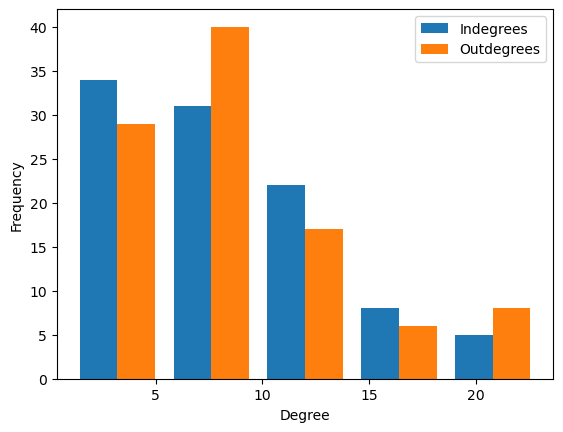

In [64]:
# Let's briefly look at degree distributions
indegrees = [val for (node, val) in superstar_network_restricted.in_degree()]
outdegrees = [val for (node, val) in superstar_network_restricted.out_degree()]

In = np.array(indegrees)
Out = np.array(outdegrees)

plt.hist([In, Out], bins=5, label=['Indegrees', 'Outdegrees'])
plt.legend(loc='upper right')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()


In [65]:
# Eigenvector centrality
print(nx.eigenvector_centrality(superstar_network_restricted))
print(nx.eigenvector_centrality(superstar_network_restricted.reverse()))

{'Joanna': 0.013403298385311676, 'Jäde': 0.07184216112700757, 'Sally': 0.009945768159231242, 'KALIKA': 0.006504972114918973, 'Zinée': 0.053098831607281294, 'Dioscures': 0.12269783203851671, 'Lala &ce': 0.027713849318988962, 'BabySolo33': 0.04539188528325805, 'rad cartier': 0.18869650148477052, 'Wit.': 0.12224797095925077, 'Le Juiice': 0.030616323020003014, 'Myth Syzer': 0.006584398938875828, 'Lazuli': 0.0467410751143064, 'Ichon': 0.003837759872284786, 'SONBEST': 0.21777676858062703, 'Yoa': 0.004333101734073871, 'Vicky R': 0.016388969071121275, 'Poupie': 0.004705976921295769, 'Bonnie Banane': 0.003931615467532806, 'Lafleyne': 0.01790401939743449, 'Asinine': 0.043064474589554994, '99': 0.2590903588919759, 'Chanceko': 0.17783311907703098, 'Jeunesaint': 0.18037203189216766, 'Kay The Prodigy': 0.040344627188104915, 'Theodora': 0.04444343017209703, 'Meel B': 0.26394878327680654, 'Bitsu': 0.05596053452529087, 'Enchantée Julia': 0.010615387171070443, 'Beamer': 0.10530489485815898, 'Alicia.': 0

- Eigenvector Centrality (Direct Graph): This measure evaluates the importance of artists according to their connection to other important artists. Thus, artists with a higher eigenvector centrality are those who are connected to other popular artists. This could indicate artists who are often listened to or followed by the same users, which can be useful for recommending similar music.

- Eigenvector Centrality (Reverse Graph): Looking at the reverse graph, this measure assesses the importance of artists based on their connection to users who listen to many other important artists. Artists with a higher eigenvector centrality in the reverse graph are those whose music is often listened to by users who listen to a lot of popular music. This could be useful for identifying artists whose music is widely appreciated among popular music listeners.

In [66]:
# Eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(superstar_network_restricted)
eigenvector_centrality_reverse = nx.eigenvector_centrality(superstar_network_restricted.reverse())

# The 2 artists with the highest Eigenvector Centrality
highest_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:2]
print("The 2 artists with the highest Eigenvector Centrality:")
for artist, centrality in highest_eigenvector:
    print(artist, centrality)

# The 2 artists with the lowest Eigenvector Centrality
lowest_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1])[:2]
print("\nThe 2 artists with the lowest Eigenvector Centrality:")
for artist, centrality in lowest_eigenvector:
    print(artist, centrality)

# The 2 artists with the highest Eigenvector Centrality (Reverse Graph)
highest_eigenvector_reverse = sorted(eigenvector_centrality_reverse.items(), key=lambda x: x[1], reverse=True)[:2]
print("\nThe 2 artists with the highest Eigenvector Centrality (Reverse Graph):")
for artist, centrality in highest_eigenvector_reverse:
    print(artist, centrality)

# The 2 artists with the lowest Eigenvector Centrality (Reverse Graph)
lowest_eigenvector_reverse = sorted(eigenvector_centrality_reverse.items(), key=lambda x: x[1])[:2]
print("\nThe 2 artists with the lowest Eigenvector Centrality (Reverse Graph):")
for artist, centrality in lowest_eigenvector_reverse:
    print(artist, centrality)


The 2 artists with the highest Eigenvector Centrality:
Meel B 0.26394878327680654
99 0.2590903588919759

The 2 artists with the lowest Eigenvector Centrality:
Paloma 0.0007372608260307059
Charlie Motto 0.0008808742106268369

The 2 artists with the highest Eigenvector Centrality (Reverse Graph):
Sally 0.3686997627564326
Joanna 0.295965048341963

The 2 artists with the lowest Eigenvector Centrality (Reverse Graph):
09PEAS 3.130498581458197e-07
Rêves 3.130498581458197e-07


In [67]:
# Closeness centrality
print(nx.closeness_centrality(superstar_network_restricted)) # uses the inward distance to a node

{'Joanna': 0.28285714285714286, 'Jäde': 0.3535714285714286, 'Sally': 0.23185011709601874, 'KALIKA': 0.24029126213592233, 'Zinée': 0.37218045112781956, 'Dioscures': 0.3485915492957746, 'Lala &ce': 0.27808988764044945, 'BabySolo33': 0.3694029850746269, 'rad cartier': 0.38976377952755903, 'Wit.': 0.3574007220216607, 'Le Juiice': 0.27808988764044945, 'Myth Syzer': 0.23798076923076922, 'Lazuli': 0.31329113924050633, 'Ichon': 0.2296983758700696, 'SONBEST': 0.38823529411764707, 'Yoa': 0.23185011709601874, 'Vicky R': 0.26052631578947366, 'Poupie': 0.22916666666666666, 'Bonnie Banane': 0.2302325581395349, 'Lafleyne': 0.2682926829268293, 'Asinine': 0.34256055363321797, '99': 0.4194915254237288, 'Chanceko': 0.3613138686131387, 'Jeunesaint': 0.35106382978723405, 'Kay The Prodigy': 0.3009118541033435, 'Theodora': 0.3256578947368421, 'Meel B': 0.4520547945205479, 'Bitsu': 0.3173076923076923, 'Enchantée Julia': 0.2632978723404255, 'Beamer': 0.4057377049180328, 'Alicia.': 0.2088607594936709, 'Tessa B'

Closeness centrality measures how close a node is to other nodes in the graph, indicating how quickly information can spread from that node to other nodes.

In the context of recommendations for artists on Spotify, closeness centrality can help identify artists who are more central in the network and thus potentially more influential or connected to other artists. Artists with higher closeness centrality values are those that can quickly influence or be influenced by other artists in the network, making them potentially more important for recommendations or collaborations.

In [68]:
# Compute closeness centrality for each artist
closeness_centrality_scores = nx.closeness_centrality(superstar_network_restricted)

# Sort the artists by their closeness centrality scores
sorted_closeness_centrality = sorted(closeness_centrality_scores.items(), key=lambda x: x[1], reverse=True)

# Print the top 2 artists with the highest closeness centrality
print("Top 2 artists with the highest closeness centrality:")
for artist, centrality in sorted_closeness_centrality[:2]:
    print(artist, centrality)

# Print the bottom 2 artists with the lowest closeness centrality
print("\nBottom 2 artists with the lowest closeness centrality:")
for artist, centrality in sorted_closeness_centrality[-2:]:
    print(artist, centrality)


Top 2 artists with the highest closeness centrality:
Meel B 0.4520547945205479
Nyluu 0.4439461883408072

Bottom 2 artists with the lowest closeness centrality:
TESSÆ 0.19223300970873786
Tessa B 0.18929254302103252


In [69]:
# Betweenness centrality
print(nx.betweenness_centrality(superstar_network_restricted))

{'Joanna': 0.2027500244603683, 'Jäde': 0.24893634860021008, 'Sally': 0.04118051933200965, 'KALIKA': 0.17584928533748442, 'Zinée': 0.16865680293293972, 'Dioscures': 0.08742416726829093, 'Lala &ce': 0.038884729565484916, 'BabySolo33': 0.1005152025374551, 'rad cartier': 0.1749945044448831, 'Wit.': 0.06635656059122383, 'Le Juiice': 0.04389611401742061, 'Myth Syzer': 0.007010443470074311, 'Lazuli': 0.05285651922314186, 'Ichon': 0.0009933782121748216, 'SONBEST': 0.05091722077845363, 'Yoa': 0.018925683181221713, 'Vicky R': 0.0186804310284802, 'Poupie': 0.011931846909397713, 'Bonnie Banane': 0.004606293354798896, 'Lafleyne': 0.0021969471742424402, 'Asinine': 0.020471326233688907, '99': 0.1498658152305722, 'Chanceko': 0.030244434507595085, 'Jeunesaint': 0.023186389042092078, 'Kay The Prodigy': 0.007550288060129922, 'Theodora': 0.014256852984228194, 'Meel B': 0.10850346067830838, 'Bitsu': 0.021225972816391353, 'Enchantée Julia': 0.001407963302329199, 'Beamer': 0.028892329033422808, 'Alicia.': 0.

Betweenness centrality measures the extent to which a node lies on the shortest paths between other nodes in the network. 

In the context of Spotify artist recommendations, nodes with high betweenness centrality act as bridges connecting different parts of the artist network. Artists with high betweenness centrality are likely to have a significant influence on the flow of information or recommendations between other artists. They may serve as key influencers or connectors within the network, potentially indicating their importance in facilitating the spread of musical styles or genres across different communities or clusters of artists.

In [70]:
# Betweenness centrality
betweenness_centrality = nx.betweenness_centrality(superstar_network_restricted)

# Sort nodes by betweenness centrality in descending order
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)

# Print the top 2 artists with the highest betweenness centrality
print("Top 2 artists with the highest betweenness centrality:")
for artist, centrality in sorted_betweenness[:2]:
    print(artist, centrality)

# Print the bottom 2 artists with the lowest betweenness centrality
print("\nBottom 2 artists with the lowest betweenness centrality:")
for artist, centrality in sorted_betweenness[-2:]:
    print(artist, centrality)


Top 2 artists with the highest betweenness centrality:
Jäde 0.24893634860021008
Joanna 0.2027500244603683

Bottom 2 artists with the lowest betweenness centrality:
Charlie Motto 0.0
Inspire 0.0


In [71]:
# Compute descriptive statistics 

# Create a list to store centrality measures
centrality_measures = {
    "Eigenvector Centrality": nx.eigenvector_centrality(superstar_network_restricted),
    "Eigenvector Centrality (Reverse)": nx.eigenvector_centrality(superstar_network_restricted.reverse()),
    "Closeness Centrality": nx.closeness_centrality(superstar_network_restricted),
    "Betweenness Centrality": nx.betweenness_centrality(superstar_network_restricted)
}

# Loop through centrality measures
for measure, centrality in centrality_measures.items():
    # Convert centrality values to a numpy array
    centrality_values = np.array(list(centrality.values()))
    
    # Compute statistics
    min_value = np.min(centrality_values)
    max_value = np.max(centrality_values)
    mean_value = np.mean(centrality_values)
    std_deviation = np.std(centrality_values)
    
    # Print statistics
    print(f"{measure} statistics:")
    print(f"Min: {min_value:.2f}")
    print(f"Max: {max_value:.2f}")
    print(f"Mean: {mean_value:.2f}")
    print(f"Standard Deviation: {std_deviation:.2f}\n")


Eigenvector Centrality statistics:
Min: 0.00
Max: 0.26
Mean: 0.06
Standard Deviation: 0.08

Eigenvector Centrality (Reverse) statistics:
Min: 0.00
Max: 0.37
Mean: 0.06
Standard Deviation: 0.08

Closeness Centrality statistics:
Min: 0.19
Max: 0.45
Mean: 0.30
Standard Deviation: 0.07

Betweenness Centrality statistics:
Min: 0.00
Max: 0.25
Mean: 0.03
Standard Deviation: 0.05



- **Eigenvector Centrality:** This metric gauges an artist's influence based on their connections with other influential artists. Those with higher eigenvector centrality (closer to 0.26, such as Meel B) likely have ties to other influential figures, suggesting their music enjoys popularity or is frequently listened to. Conversely, artists with lower eigenvector centrality (closer to 0, like Charlie Motto) may have fewer links to influential peers, indicating lesser popularity or reach.

- **Eigenvector Centrality (Reverse):** This measure evaluates an artist's influence based on connections received from other influential artists. Higher values imply that the artist garners recommendations or connections from other influential figures, potentially indicating broader reach or impact.

- **Closeness Centrality:** It quantifies an artist's proximity to all others in the network. Artists with higher closeness centrality (closer to 0.45, such as Meel B occupy more central positions and may have closer ties to a broader range of artists. Conversely, lower closeness centrality values (closer to 0.19, like Tessa B) suggest less centrality and fewer connections to other artists.

- **Betweenness Centrality:** This metric measures an artist's position on paths between other artists in the network. Higher betweenness centrality (closer to 0.25, such as Joanna) indicates acting as a bridge or intermediary between different clusters or artist communities. Lower values (closer to 0, such as Charlie Motto) imply lesser influence over the flow of recommendations between artists.

In summary, these centrality measures help identify influential artists pivotal in connecting various segments of the Spotify artist network, potentially shaping music recommendations.

## Vizualization

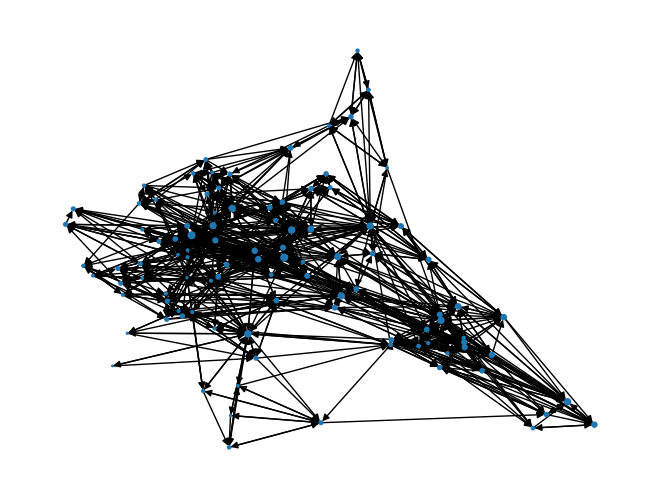

In [72]:
# change node size to reflect indegree

indeg = superstar_network_restricted.in_degree   # sets up the indegree view
indegs = [d for n, d in indeg]   # gets all nodes' degree values 

# draw plot (color = office)
nx.draw(superstar_network_restricted, pos=nx.fruchterman_reingold_layout(superstar_network_restricted), with_labels=False,
        #node_color=node_color, edge_color = "gray", 
        node_size=indegs)
plt.show()


# IV - Personal networks, ego networks

In [73]:
TS_ego = pd.read_csv('Joanna_Attr_Network.csv')
TS_ego = TS_ego[TS_ego['Artist_Name'] == 'Joanna']

In [74]:
node_names_to_keep = list(superstar_network_restricted.nodes())

In [75]:
len(node_names_to_keep)

100

In [76]:
Network_TS = pd.read_csv('Joanna_Attr_Network.csv')
Network_TS = Network_TS[Network_TS['Artist_Name'].isin(node_names_to_keep)]

In [77]:
Network_TS.head()

Artist_Name  NB_Followers                                        Genres  \
0      Joanna       31771.0                              ['rennes indie']   
1        Jäde       16064.0  ['rap calme', 'rap francais nouvelle vague']   
2       Sally       12790.0                                            []   
3      KALIKA       12521.0                                ['french pop']   
4       Zinée       14656.0                                 ['rap calme']   

   Popularity Nationality   Age  Death    Type  Gender  Total_Release  ...  \
0        34.0      Brazil  67.0  False  Person  female           20.0  ...   
1        35.0        Lyon   NaN  False  Person  female           20.0  ...   
2        19.0         NaN   NaN  False     NaN     NaN           19.0  ...   
3        31.0      France   NaN  False  Person  female           20.0  ...   
4        32.0      France  27.0  False  Person  female           17.0  ...   

   Acousticness  Danceability    Duration_MS    Energy  Instrumentalness  \
0      0.280100      0.708667  204868.000000  0.549667          0.000000   
1      0.414333      0.757667  171742.000000  0.510333          0.000170   
2      0.455667      0.666667  203684.333333  0.461000          0.000267   
3      0.321600      0.784000  184395.666667  0.669000          0.008167   
4      0.515667      0.719667  252587.333333  0.441333          0.003613   

   Liveness   Loudness  Speechiness       Tempo   Valence  
0  0.115200  -8.712667     0.149967  100.518667  0.267567  
1  0.094267  -8.483667     0.085900  133.548333  0.547333  
2  0.074333  -8.858333     0.155467  123.644000  0.287233  
3  0.092200  -7.159000     0.039700  132.689667  0.751667  
4  0.162000 -10.733333     0.159933  127.027000  0.403333  

[5 rows x 23 columns]

In [78]:
Network_TS.shape

(100, 23)

In [79]:
Alters_TS = pd.read_csv('Joanna_Attr_Ego.csv')
print(Alters_TS)

      Artist_Name  NB_Followers  \
0            Jäde       16064.0   
1           Sally       12790.0   
2          KALIKA       12521.0   
3           Zinée       14656.0   
4       Dioscures        7451.0   
5        Lala &ce       70539.0   
6      BabySolo33       18309.0   
7     rad cartier       10406.0   
8            Wit.       26934.0   
9       Le Juiice       20518.0   
10     Myth Syzer       42855.0   
11         Lazuli        6154.0   
12          Ichon       73744.0   
13        SONBEST       12250.0   
14            Yoa       12325.0   
15        Vicky R        5790.0   
16       Lafleyne        5309.0   
17         Poupie       46140.0   
18  Bonnie Banane       30259.0   
19        Asinine       10787.0   

                                               Genres  Popularity  \
0        ['rap calme', 'rap francais nouvelle vague']        35.0   
1                                                  []        19.0   
2                                      ['french pop']    

In [80]:
# use pandas to import edgelist (of Ego Joanna) as a table
EgoEdgesTS = pd.read_table('Joanna_Ego.txt', sep=',')
EgoEdgesTS

Node1        Node2
0             Wit.    Dioscures
1             Wit.      SONBEST
2             Wit.  rad cartier
3        Le Juiice      Vicky R
4        Le Juiice       Lazuli
..             ...          ...
97   Bonnie Banane        Ichon
98   Bonnie Banane         Jäde
99   Bonnie Banane     Lala &ce
100  Bonnie Banane  rad cartier
101        Asinine   BabySolo33

[102 rows x 2 columns]

In [81]:
# generate graph from pandas edgelist
# it is an directed graph
EgoNetTS = nx.from_pandas_edgelist(EgoEdgesTS, 'Node1', 'Node2', create_using=nx.DiGraph()) 
print(EgoNetTS)

DiGraph with 20 nodes and 102 edges


In [82]:
# Match nodes of graph with attributes of nodes
NodeData = Alters_TS.set_index('Artist_Name').to_dict('index').items()
EgoNetTS.add_nodes_from(NodeData)

# View results
print(EgoNetTS.nodes(data=True))

[('Wit.', {'NB_Followers': 26934.0, 'Genres': "['french hip hop', 'rap calme', 'rap francais']", 'Popularity': 39.0, 'Nationality': 'France', 'Age': nan, 'Death': False, 'Type': 'Person', 'Gender': 'male', 'Total_Release': 20.0, 'Available_Markets': 185.0, 'Year_Last_Release': 2024.0, 'Type_Last_Release': 'album', 'Acousticness': 0.2070333333333333, 'Danceability': 0.7443333333333334, 'Duration_MS': 203752.66666666663, 'Energy': 0.5826666666666667, 'Instrumentalness': 0.0075832, 'Liveness': 0.0977, 'Loudness': -7.991333333333333, 'Speechiness': 0.2018666666666666, 'Tempo': 114.999, 'Valence': 0.2673333333333333}), ('Dioscures', {'NB_Followers': 7451.0, 'Genres': "['rap francais nouvelle vague']", 'Popularity': 24.0, 'Nationality': 'Paris', 'Age': 29.0, 'Death': False, 'Type': 'Person', 'Gender': 'male', 'Total_Release': 6.0, 'Available_Markets': 3.0, 'Year_Last_Release': 2021.0, 'Type_Last_Release': 'album', 'Acousticness': 0.214, 'Danceability': 0.7526666666666667, 'Duration_MS': 1844

In [83]:
# View edges
print(EgoNetTS.edges(data=True))

[('Wit.', 'Dioscures', {}), ('Wit.', 'SONBEST', {}), ('Wit.', 'rad cartier', {}), ('Dioscures', 'Wit.', {}), ('Dioscures', 'SONBEST', {}), ('Dioscures', 'rad cartier', {}), ('Dioscures', 'Jäde', {}), ('Dioscures', 'Zinée', {}), ('SONBEST', 'Dioscures', {}), ('SONBEST', 'Wit.', {}), ('SONBEST', 'rad cartier', {}), ('rad cartier', 'Jäde', {}), ('rad cartier', 'SONBEST', {}), ('rad cartier', 'Lazuli', {}), ('Le Juiice', 'Vicky R', {}), ('Le Juiice', 'Lazuli', {}), ('Le Juiice', 'Jäde', {}), ('Le Juiice', 'Lala &ce', {}), ('Le Juiice', 'rad cartier', {}), ('Le Juiice', 'Zinée', {}), ('Le Juiice', 'Sally', {}), ('Le Juiice', 'BabySolo33', {}), ('Le Juiice', 'Wit.', {}), ('Vicky R', 'Le Juiice', {}), ('Vicky R', 'Lazuli', {}), ('Vicky R', 'Sally', {}), ('Vicky R', 'Jäde', {}), ('Vicky R', 'Zinée', {}), ('Lazuli', 'rad cartier', {}), ('Lazuli', 'Jäde', {}), ('Lazuli', 'Lafleyne', {}), ('Lazuli', 'Le Juiice', {}), ('Lazuli', 'Vicky R', {}), ('Lazuli', 'BabySolo33', {}), ('Lazuli', 'Zinée', {})

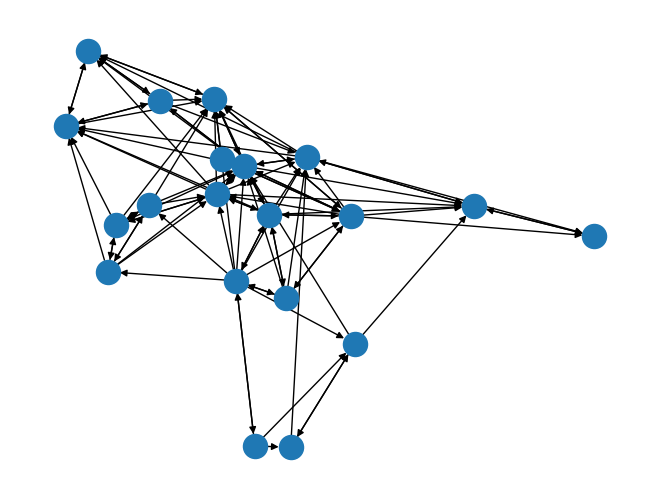

In [84]:
# Draw graph
nx.draw(EgoNetTS)
plt.show()

## A - Overall network composition indicators

### A1 - Numerical variables

In [85]:
# Is the whole network homogeneous ? 

for column in Network_TS.select_dtypes(include=['float64', 'int64']).columns:
    print("Column:", column)
    print("Joanna's", column, TS_ego[column].iloc[0])
    print("Mean:", Network_TS[column].mean())
    print("Variance:", Network_TS[column].var())
    print("Standard Deviation:", Network_TS[column].std())
    print("Quantiles:", Network_TS[column].quantile([0.25, 0.5, 0.75]))
    print("Minimum:", Network_TS[column].min())
    print("Maximum:", Network_TS[column].max())
    print("\n")

Column: NB_Followers
Joanna's NB_Followers 31771.0
Mean: 15434.96
Variance: 475527768.0185859
Standard Deviation: 21806.59918507666
Quantiles: 0.25     3758.5
0.50     7047.0
0.75    17326.5
Name: NB_Followers, dtype: float64
Minimum: 873.0
Maximum: 167936.0


Column: Popularity
Joanna's Popularity 34.0
Mean: 27.07
Variance: 81.15666666666667
Standard Deviation: 9.008699499187808
Quantiles: 0.25    21.0
0.50    27.0
0.75    33.0
Name: Popularity, dtype: float64
Minimum: 3.0
Maximum: 47.0


Column: Age
Joanna's Age 67.0
Mean: 29.615384615384617
Variance: 114.00615384615386
Standard Deviation: 10.677366428392062
Quantiles: 0.25    26.25
0.50    30.00
0.75    32.00
Name: Age, dtype: float64
Minimum: 5.0
Maximum: 67.0


Column: Total_Release
Joanna's Total_Release 20.0
Mean: 16.78
Variance: 25.547070707070702
Standard Deviation: 5.054411014853334
Quantiles: 0.25    14.0
0.50    20.0
0.75    20.0
Name: Total_Release, dtype: float64
Minimum: 1.0
Maximum: 20.0


Column: Available_Markets
Joan

The network of artists displays a broad spectrum of characteristics and attributes, as evident from the provided statistics:

- **Follower Count:** The average follower count per artist is approximately 15,435, with considerable variability indicated by the standard deviation of 21,806. This suggests a diverse range of artists in terms of their popularity among listeners, with some having significantly larger followings than others.

- **Popularity:** Artists in the network exhibit varying levels of popularity, with an average popularity score of 27.07. The standard deviation of 9.01 indicates a notable spread in popularity across the network, with some artists enjoying greater recognition than others.

- **Age:** The average age of artists in the network is around 29.62 years old, with a standard deviation of 10.68. It suggests a predominantly young but diverse demographic within the network. 
  
- **Release Activity:** On average, artists in the network have released approximately 16.78 albums or tracks, with a standard deviation of 5.05. This indicates variations in the productivity and output of artists, with some maintaining a steady stream of releases while others may be less prolific.

- **Market Availability:** Artists in the network typically have their music available in around 174 markets, with some variability indicated by the standard deviation of 42.92. This underscores the global reach of the network, with artists catering to audiences across a wide range of geographical locations.
  
- **Release Years:** The mean release year of artists' most recent releases is approximately 2023.57, reflecting the contemporary nature of the network's musical output. The standard deviation of 0.67 suggests relatively uniform distribution around this average.

- **Musical Attributes:** The network encompasses artists with diverse musical styles and characteristics, as reflected in attributes such as Acousticness. The mean Acousticness value of 0.28 suggests a varied sonic landscape within the network, encompassing both acoustic and non-acoustic genres.
  
Overall, the network comprises artists with varied levels of popularity, age, release activity, market availability, and musical styles, contributing to its rich and multifaceted nature within the Spotify ecosystem.

Joanna appears to be above average in terms of popularity, follower count, availability in markets, and total release within the network. Also, she is much older than the average age in the network, being actually the oldest one.

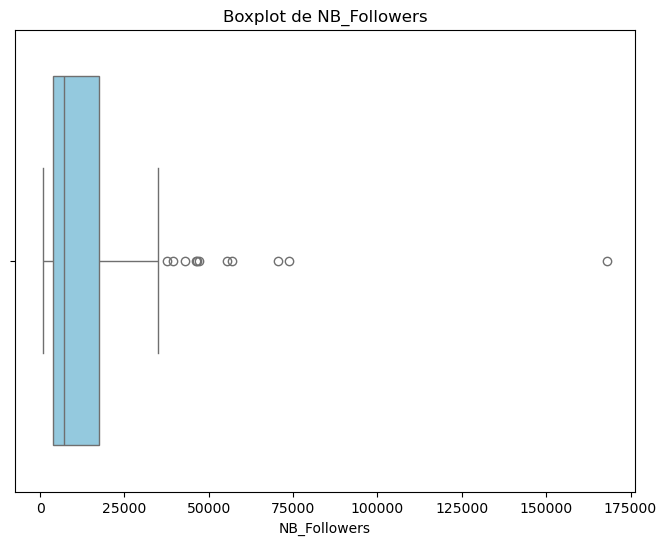

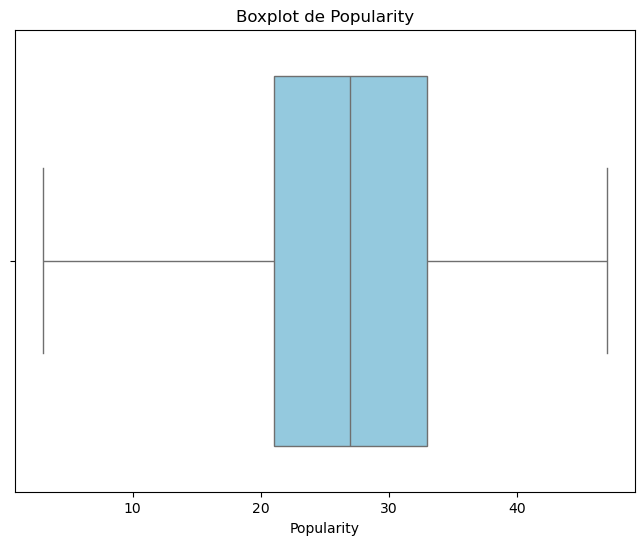

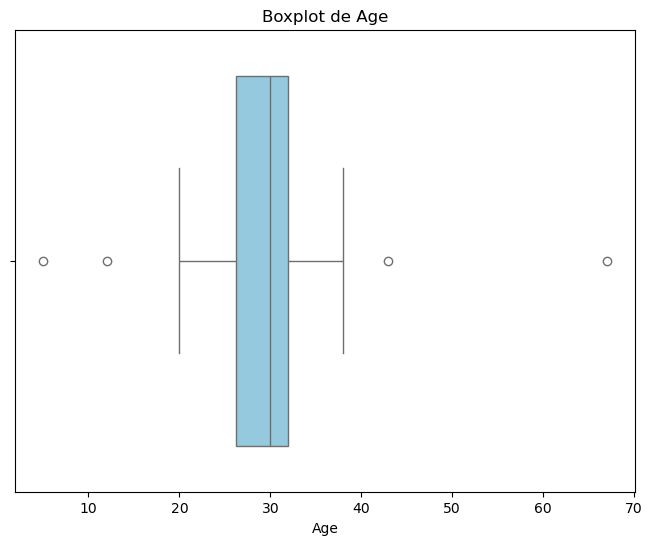

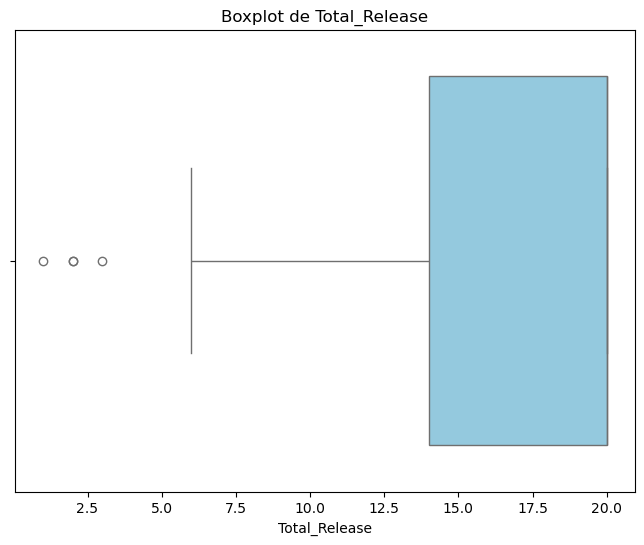

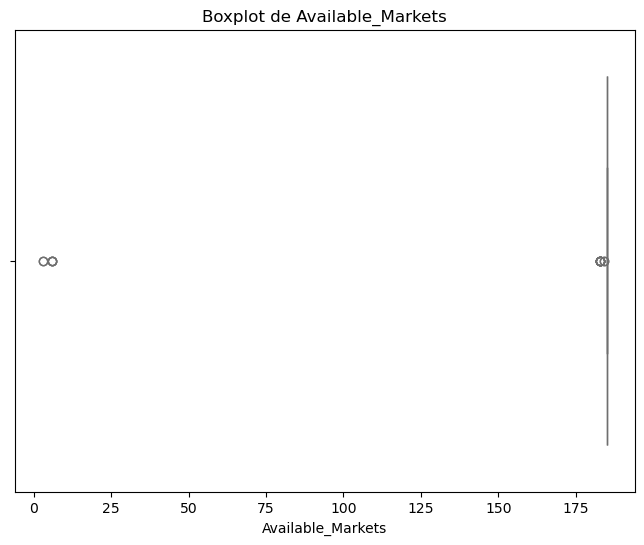

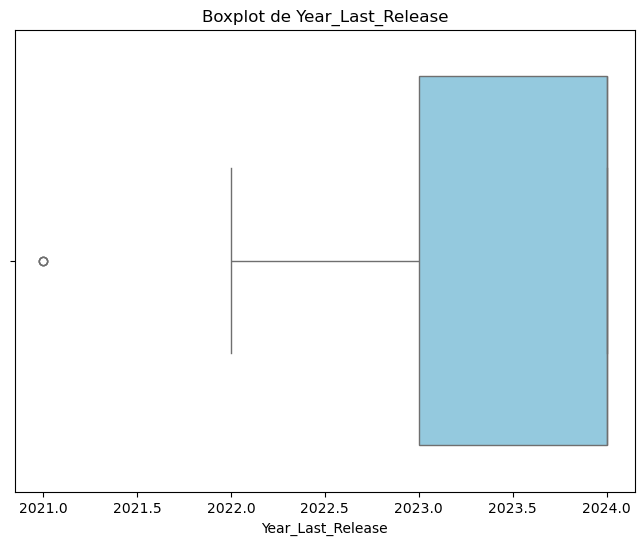

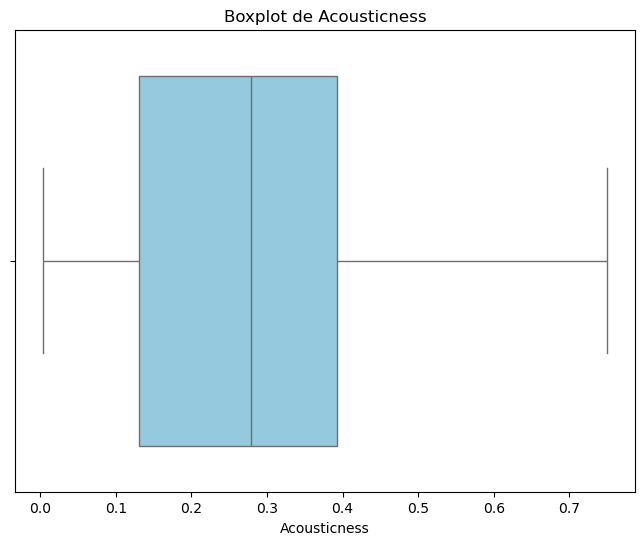

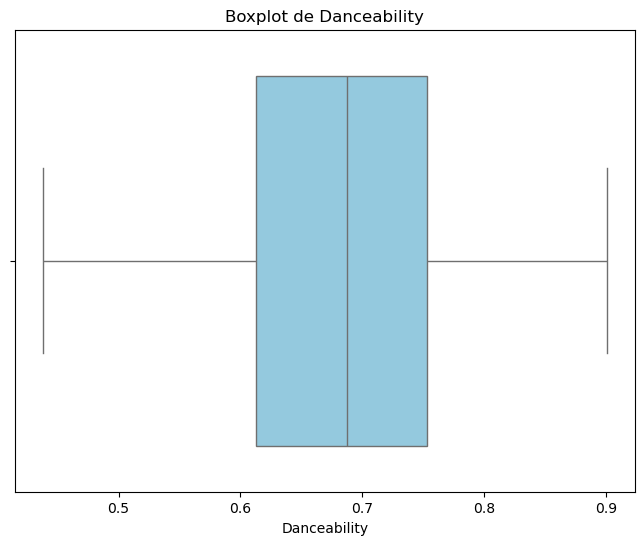

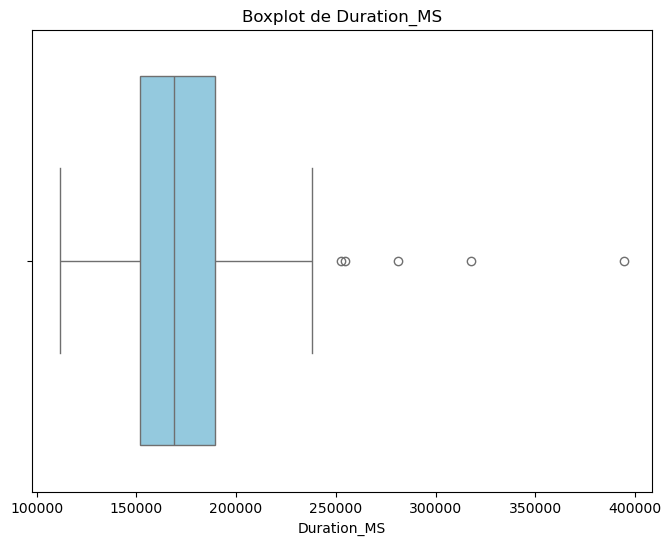

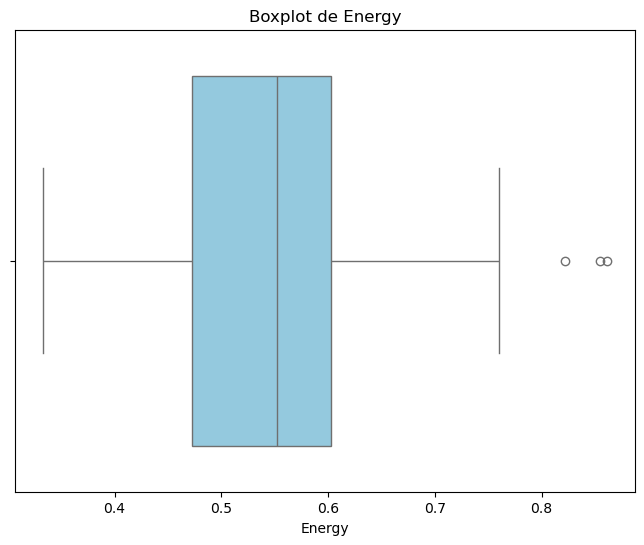

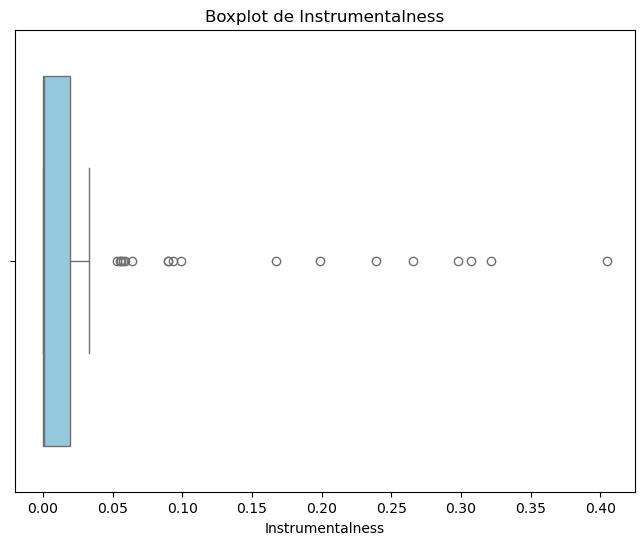

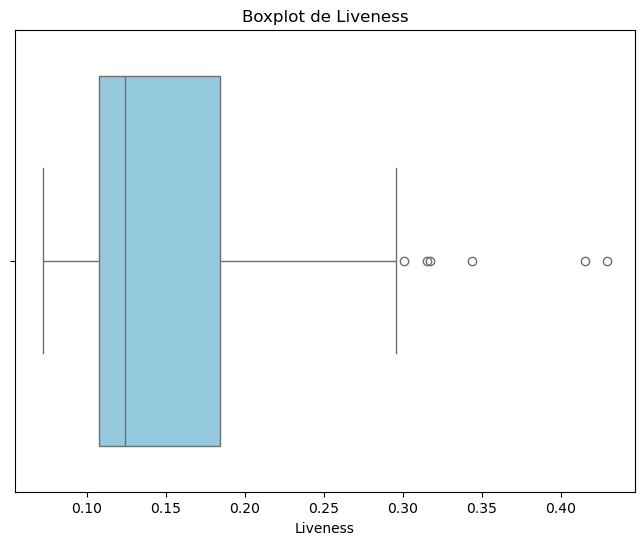

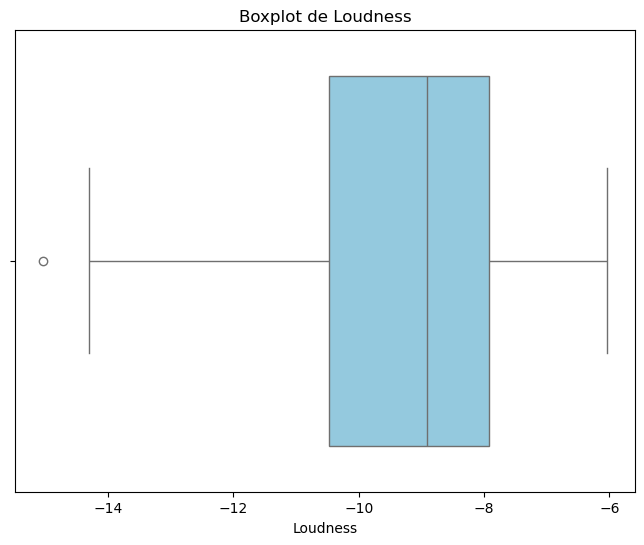

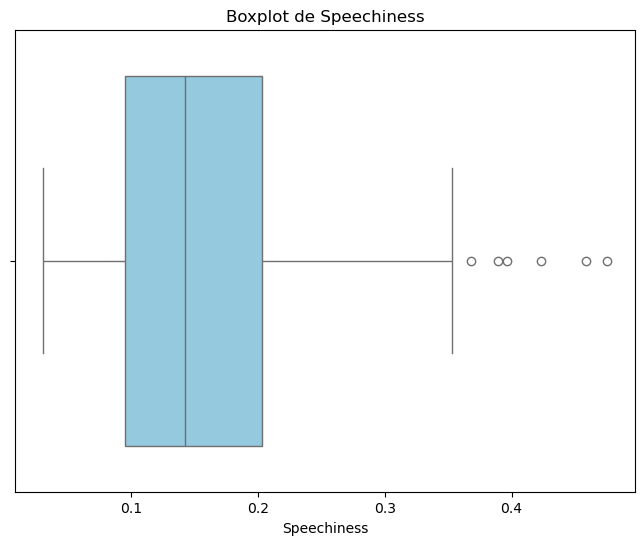

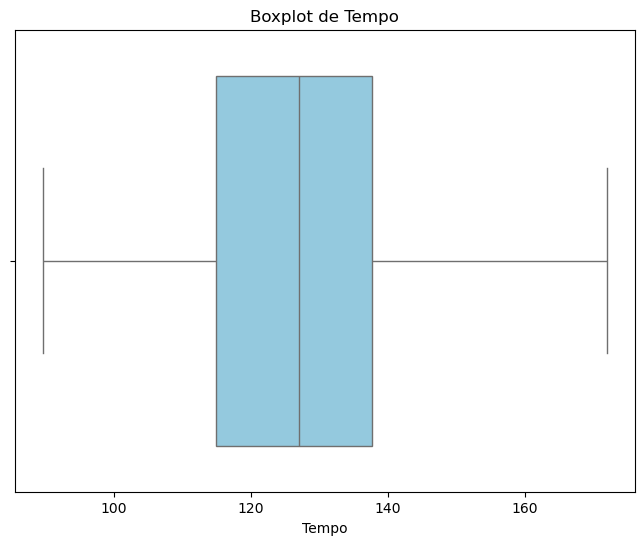

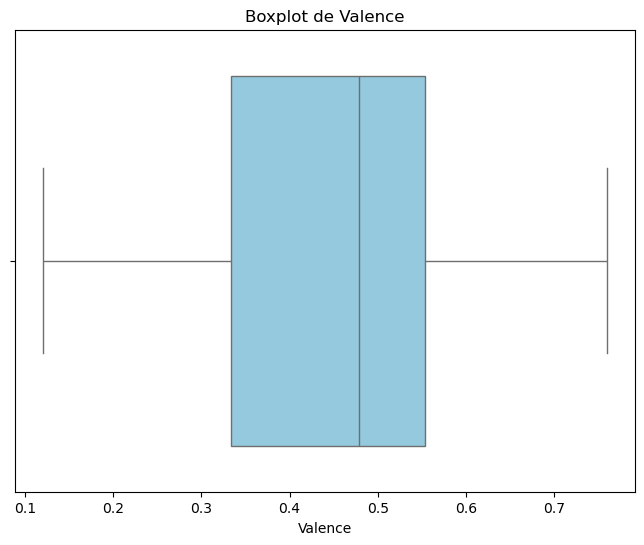

In [86]:
# Draw boxplots for all numerical variables

numeric_columns = Network_TS.select_dtypes(include=['float64', 'int64']).columns

for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=Network_TS[column], color='skyblue')
    plt.title(f'Boxplot de {column}')
    plt.show()

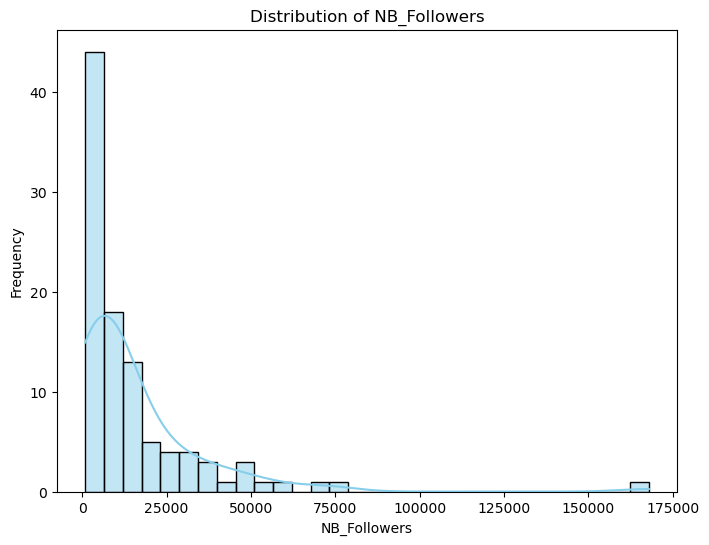

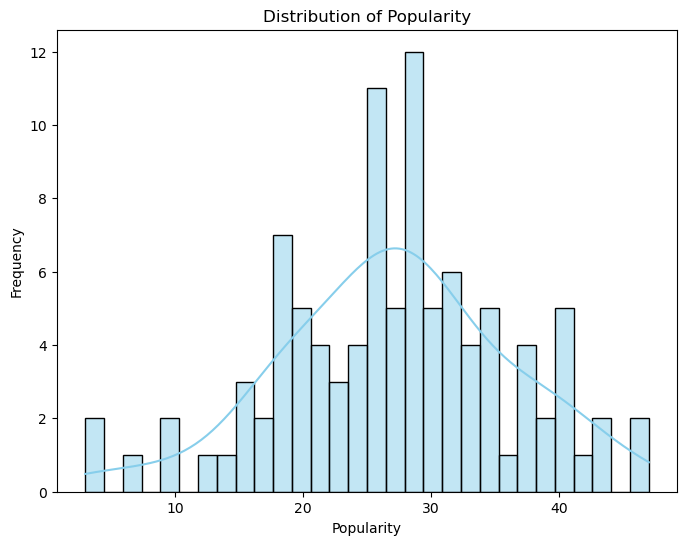

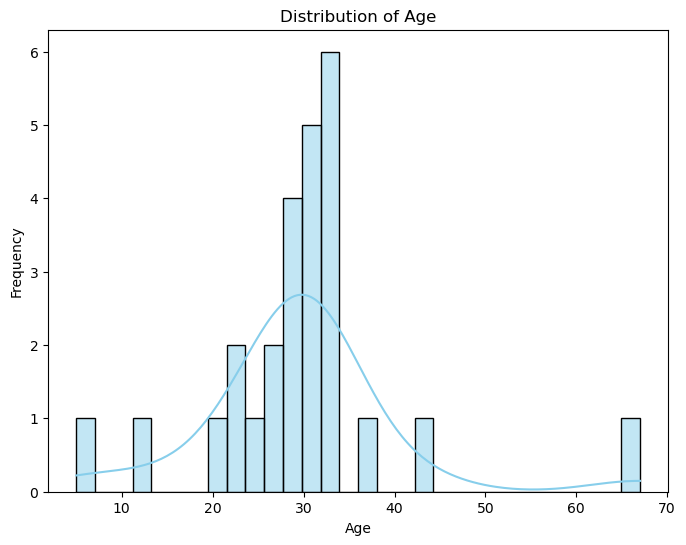

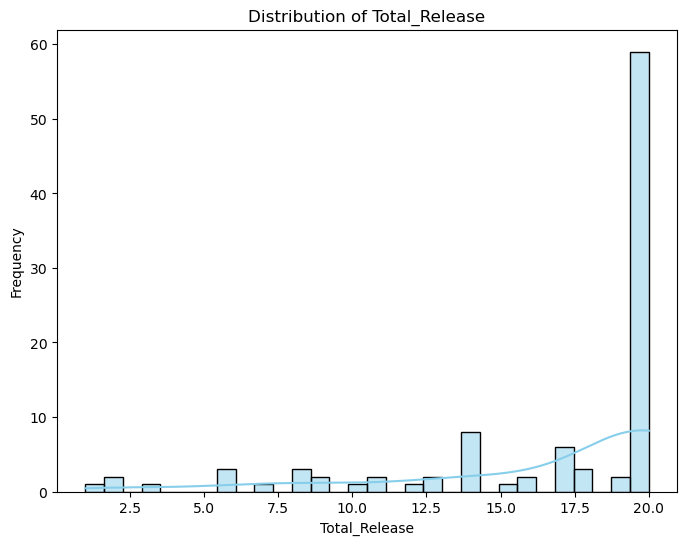

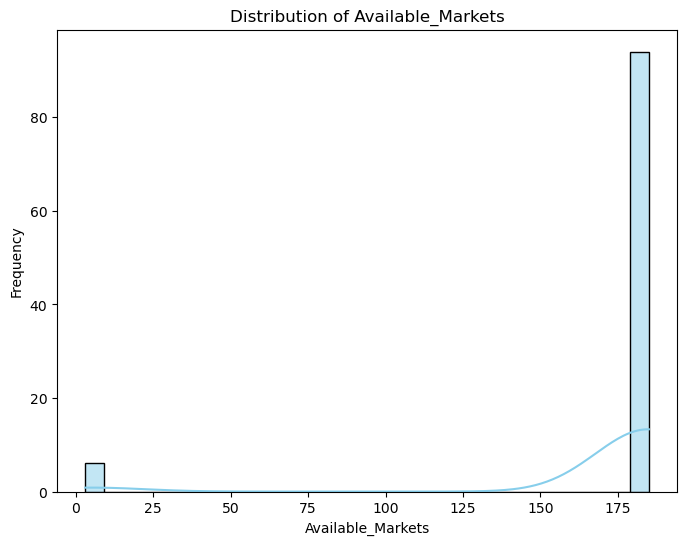

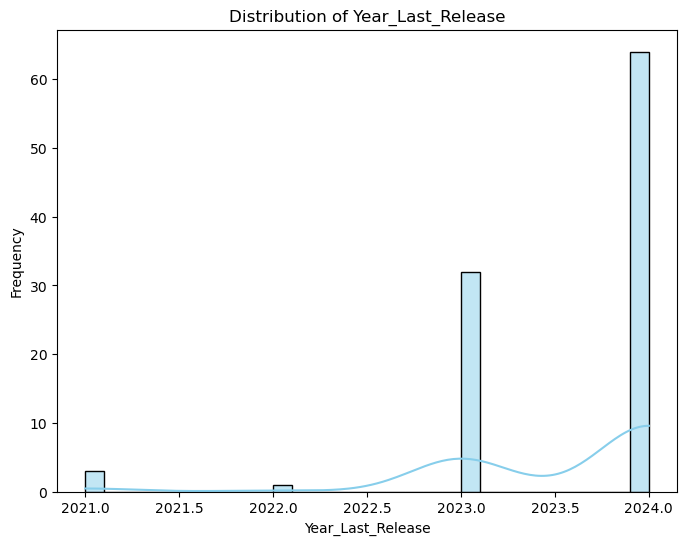

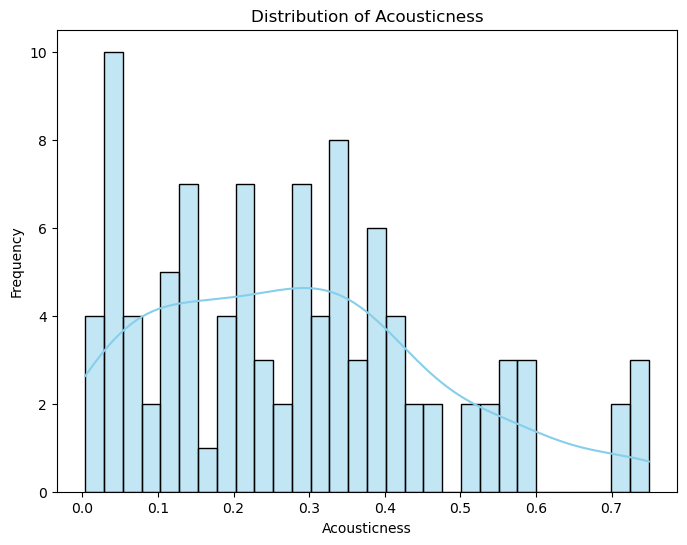

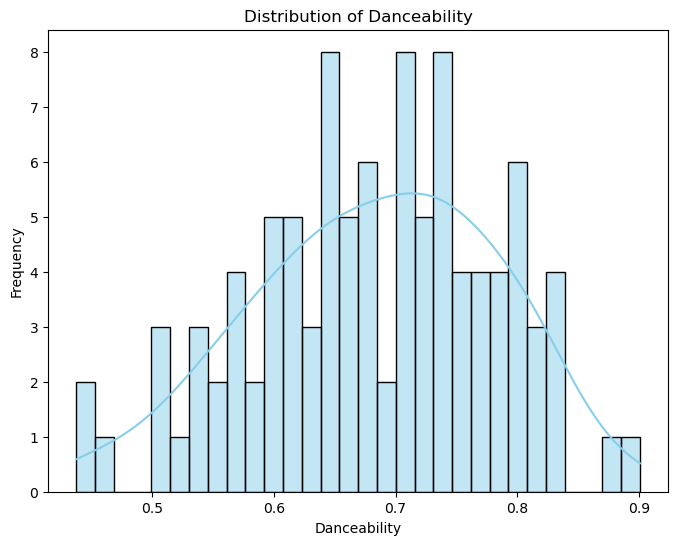

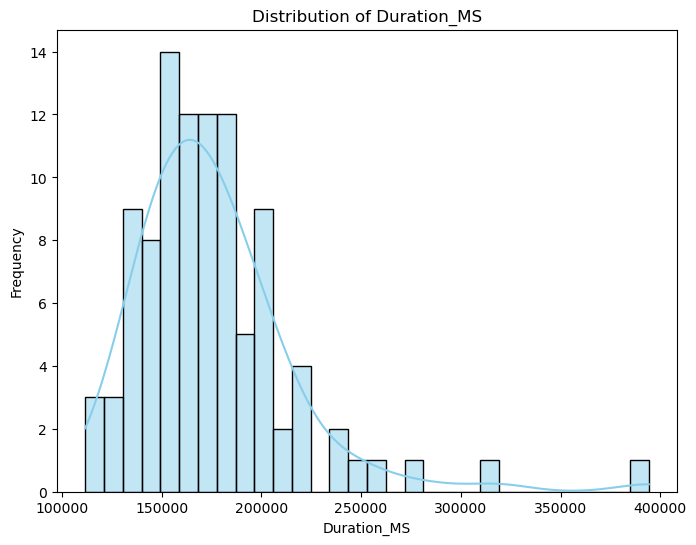

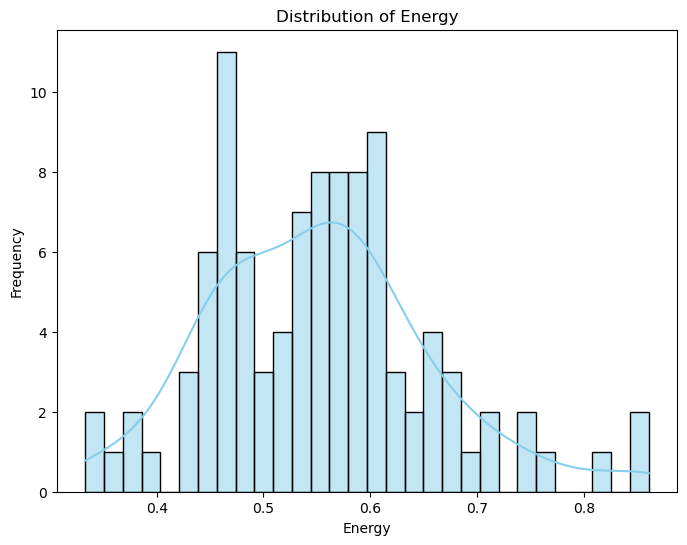

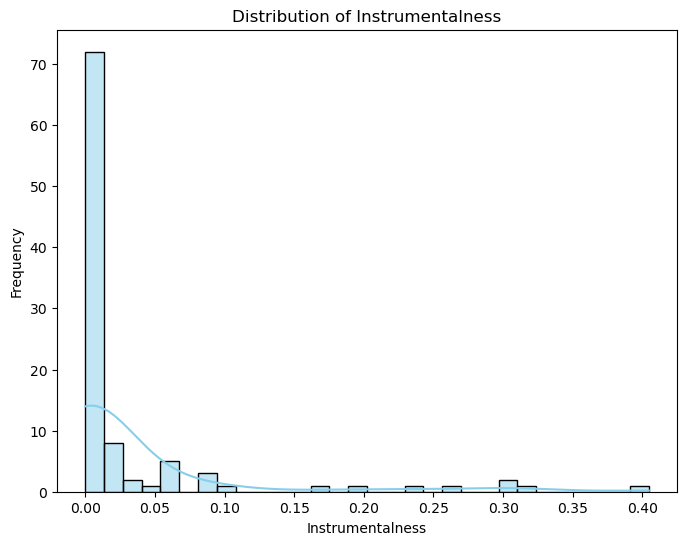

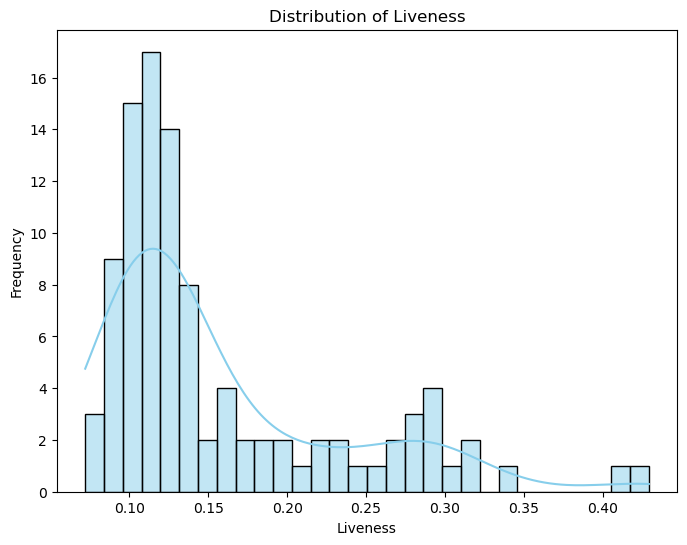

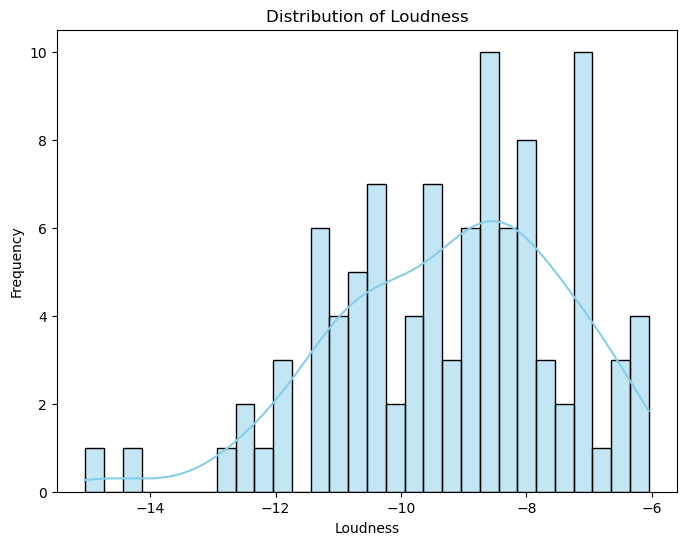

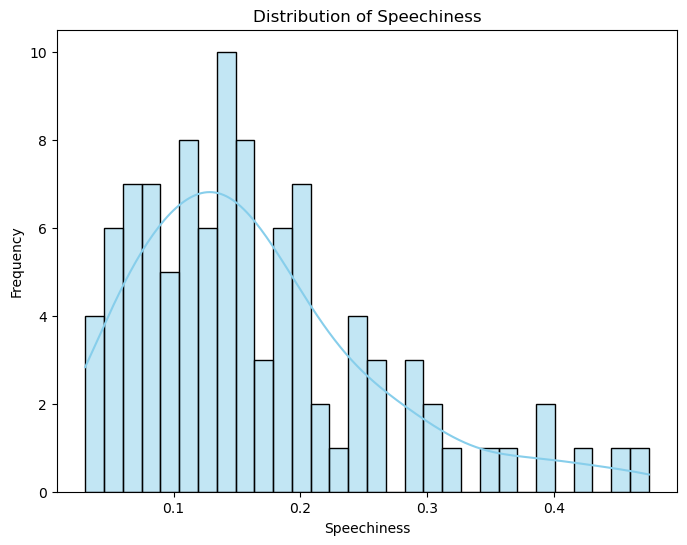

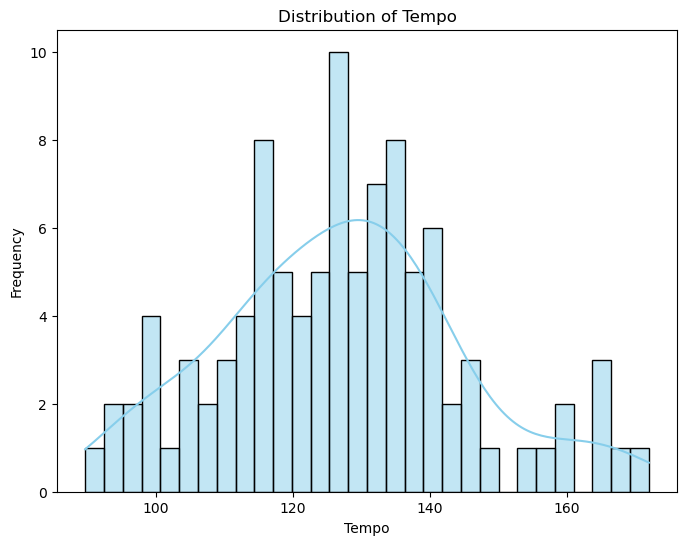

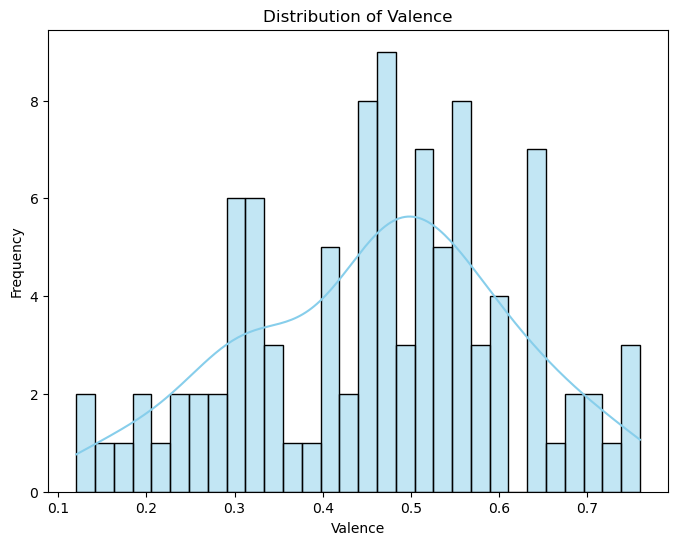

In [87]:
numeric_columns = Network_TS.select_dtypes(include=['float64', 'int64']).columns

# Draw distribution plots for numerical variables 
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=Network_TS, x=column, kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

### A2 - Categorical variables

In [88]:
# Define a function to compare categorical variables
def compare_categorical_variable(df_1, df_2, variable):
    print(f"Comparison of {variable}:")
    print(f"Joanna's {variable}: {df_1[variable].iloc[0]}")
    print(f"Joanna's alters {variable}:")
    print(df_2[[variable]].value_counts(normalize=True) * 100)
    print("\n")

# Loop through each categorical variable
for col in Network_TS.select_dtypes(include='object').columns:
    if col != "Artist_Name":
        compare_categorical_variable(TS_ego, Network_TS, col)


Comparison of Genres:
Joanna's Genres: ['rennes indie']
Joanna's alters Genres:
Genres                                                                                  
[]                                                                                          29.0
['hyperpop francais']                                                                       12.0
['rap calme']                                                                                9.0
['rap francais nouvelle vague']                                                              9.0
['plugg francais']                                                                           5.0
['hyperpop francais', 'rap francais nouvelle vague']                                         5.0
['cloud rap francais']                                                                       3.0
['french pop']                                                                               2.0
['rap calme', 'rap francais nouvelle vague']           

- **Genres:** Among the diverse genres present in the artist network, "hyperpop francais" emerges as the most common, followed by "rap calme" and "rap francais nouvelle vague." However, there is a wide variety of genre combinations, reflecting the eclectic musical landscape within the network.

- **Nationality:** The network is predominantly composed of French artists, comprising around 69% of the total, indicating a significant representation of French music. Additionally, there are smaller percentages of artists from Belgium, Brazil, and other countries, suggesting a degree of international diversity and collaboration within the network.

- **Death Status:** The vast majority of artists in the network are alive, with only a small proportion (2%) marked as deceased. This indicates that the network primarily consists of currently active artists, contributing to a dynamic and evolving musical community.

- **Type:** Most of the entities within the network are individual artists (84%), while a smaller proportion (16%) represents groups or collaborative projects. This distribution highlights the predominance of solo musicians but also acknowledges the presence of collective endeavors and bands.

- **Gender:** There is a balanced distribution of genders within the network, with male artists constituting the majority (50%) and female artists representing a significant portion (33%). Additionally, there is a small percentage (17%) attributed to groups, contributing to a diverse representation of gender identities and collaborative dynamics.

In summary, thenetwork exhibits a rich tapestry of genres, nationalities, life statuses, entity types, and gender representations, reflecting the vibrant and inclusive nature of the music community she is a part of.

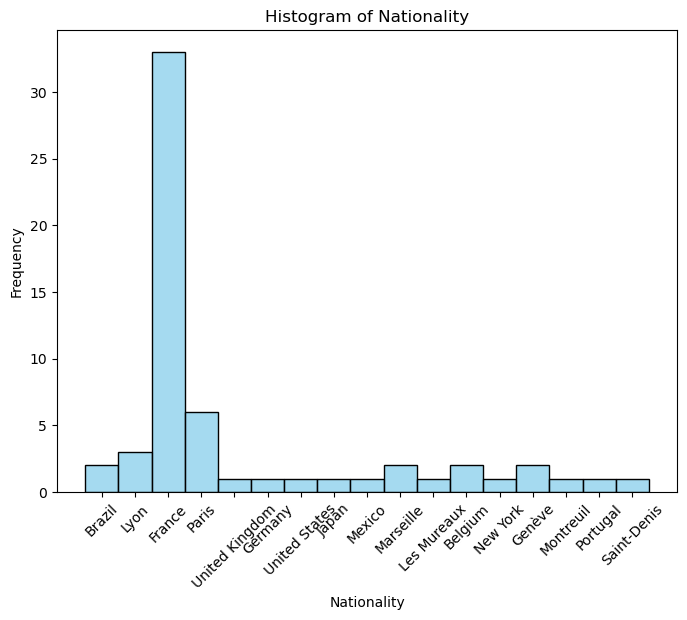

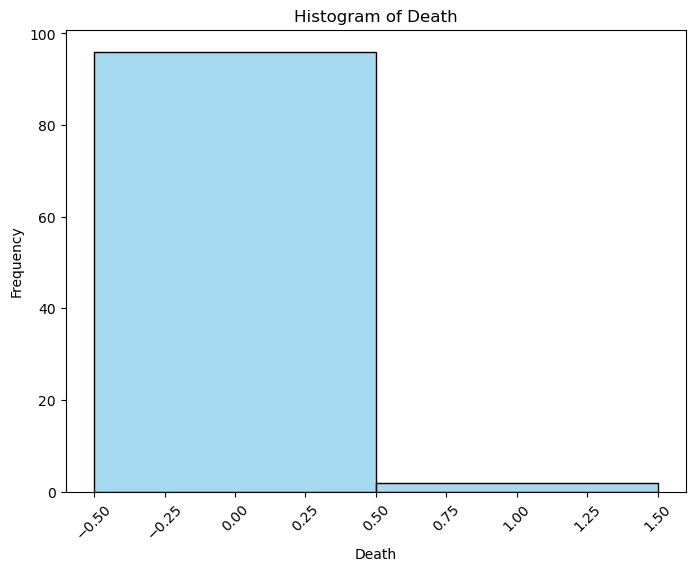

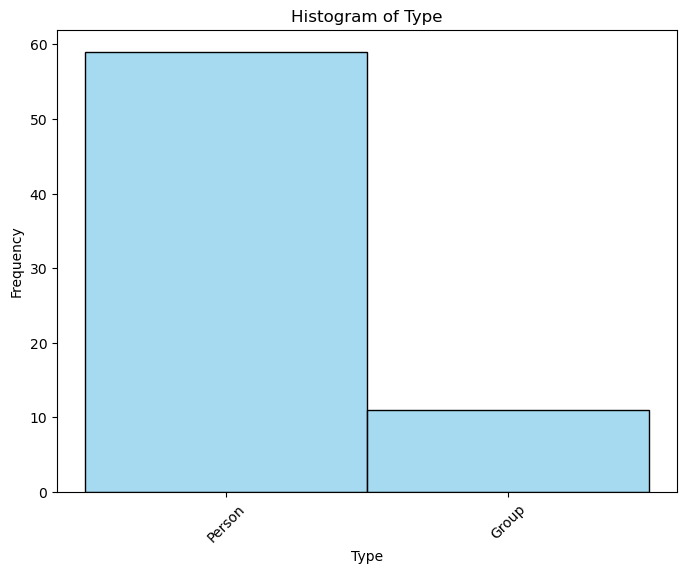

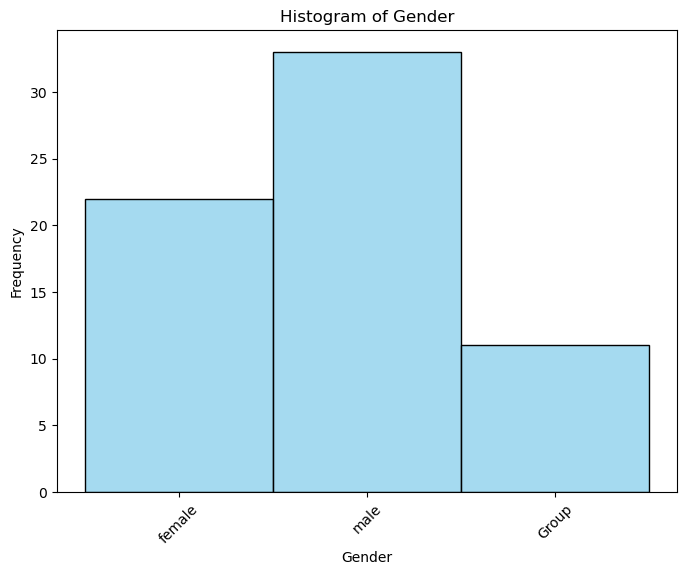

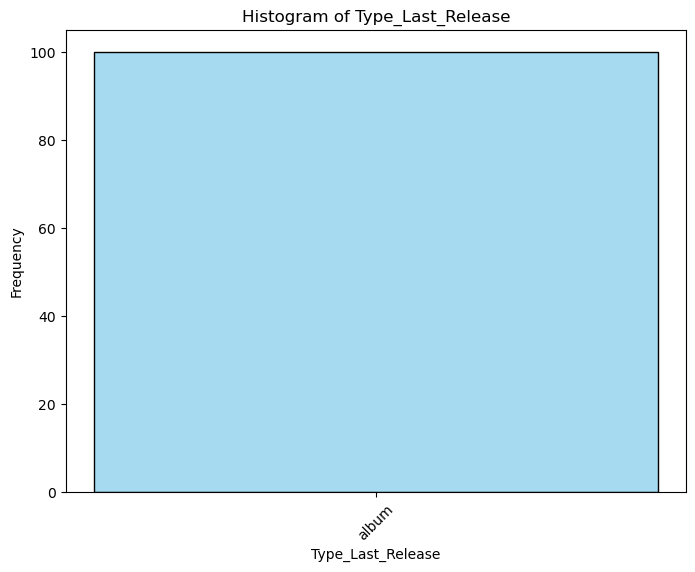

In [89]:
# Loop through each categorical variable except "Artist_Name"
for col in Network_TS.select_dtypes(include='object').columns:
    if col != "Artist_Name" and col != "Genres":
        plt.figure(figsize=(8, 6))
        sns.histplot(data=Network_TS, x=col, color='skyblue', discrete=True)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.show()

In [90]:
## Blau index (for a categorical variable with more than 2 categories)

# Function
def blau(df, col):
    return (1- ((df[col].value_counts() / df[col].count()) ** 2).sum())
    
# List to store Blau index results
blau_results = {}

# List to store Index of Qualitative Variation results
# This is a normalized version of Blau
# It is equal to Blau * k/(k-1), where k is the number of categories
iqv_results = {}

# List to store Herfindahl-Hirschman index (HHI) results
# equal to 1 - Blau
hhi_results = {}

# Loop through categorical columns except "Artist_Name"
for col in Network_TS.select_dtypes(include='object').columns:
    if col != "Artist_Name" and Network_TS[col].nunique() > 2:  # Check if the column has more than 2 distinct categories
        blau_results[col] = blau(Network_TS, col)  # Calculate Blau index and store the result
        iqv_results[col] = blau(Network_TS, col)*Network_TS[col].nunique()/(Network_TS[col].nunique()-1)
        hhi_results[col] = 1 - blau(Network_TS, col)

# Print Blau index for each eligible categorical variable
for col, index in blau_results.items():
    print(f"Blaux Index for {col}: {index}")

# Print IQV for each eligible categorical variable
for col, index in iqv_results.items():
    print(f"Index of Qualitative Variation for {col}: {index}")

# Print HHI for each eligible categorical variable
for col, index in hhi_results.items():
    print(f"Herfindahl-Hirschman index for {col}: {index}")

Blaux Index for Genres: 0.8758
Blaux Index for Nationality: 0.6777777777777778
Blaux Index for Gender: 0.6111111111111112
Index of Qualitative Variation for Genres: 0.9049933333333333
Index of Qualitative Variation for Nationality: 0.7201388888888889
Index of Qualitative Variation for Gender: 0.9166666666666667
Herfindahl-Hirschman index for Genres: 0.12419999999999998
Herfindahl-Hirschman index for Nationality: 0.3222222222222222
Herfindahl-Hirschman index for Gender: 0.38888888888888884


These statistical measures provide insights into the diversity and concentration of characteristics within the Spotify artist network:

- **Blaux Index**
    - For Genres (0.8758): This index measures the diversity of music genres within the network. A value closer to 1 indicates higher diversity. In this case, the Blaux Index suggests a relatively high diversity of genres among the artists in the network.
    - For Nationality (0.6778): This index assesses the diversity of nationalities represented in the network. A value closer to 1 indicates higher diversity. The Blaux Index here suggests a moderate level of diversity in terms of the nationalities of the artists.
    - For Gender (0.6111): This index measures the diversity of genders among the artists. A value closer to 1 indicates higher diversity. The Blaux Index indicates a moderate level of gender diversity within the network.

- **Index of Qualitative Variation**
    - For Genres (0.905): This index quantifies the variability of genres represented in the network. A higher value suggests greater variability. The high Index of Qualitative Variation indicates significant variability in the genres of music among artists in this network.
    - For Nationality (0.7201): This index measures the variability of nationalities among artists. A higher value indicates greater variability. The relatively high value suggests a notable variability in the nationalities represented in the network.
    - For Gender (0.9167): This index quantifies the variability of genders among artists. A higher value indicates greater variability. The high Index of Qualitative Variation suggests considerable variability in the gender representation within the network.

- **Herfindahl-Hirschman index**
    - For Genres (0.1242): This index measures the concentration of genres within the network. A lower value indicates lower concentration. The relatively low value suggests a diverse distribution of genres among artists, with no single genre dominating the network.
    - For Nationality (0.3222): This index assesses the concentration of nationalities within the network. A lower value indicates lower concentration. The value suggests a moderate level of concentration in terms of the nationalities represented in the network.
    - For Gender (0.3889): This index measures the concentration of genders among artists. A lower value indicates lower concentration. The index suggests a moderate level of gender concentration within the network.
      
Overall, these statistics indicate a diverse and varied landscape within the network, with a wide range of genres, nationalities, and genders represented among the artists.

## B - Personal network composition indicators

In [91]:
Alters_TS.columns

Index(['Artist_Name', 'NB_Followers', 'Genres', 'Popularity', 'Nationality',
       'Age', 'Death', 'Type', 'Gender', 'Total_Release', 'Available_Markets',
       'Year_Last_Release', 'Type_Last_Release', 'Acousticness',
       'Danceability', 'Duration_MS', 'Energy', 'Instrumentalness', 'Liveness',
       'Loudness', 'Speechiness', 'Tempo', 'Valence'],
      dtype='object')

In [92]:
Alters_TS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Artist_Name        20 non-null     object 
 1   NB_Followers       20 non-null     float64
 2   Genres             20 non-null     object 
 3   Popularity         20 non-null     float64
 4   Nationality        14 non-null     object 
 5   Age                6 non-null      float64
 6   Death              20 non-null     bool   
 7   Type               14 non-null     object 
 8   Gender             14 non-null     object 
 9   Total_Release      20 non-null     float64
 10  Available_Markets  20 non-null     float64
 11  Year_Last_Release  20 non-null     float64
 12  Type_Last_Release  20 non-null     object 
 13  Acousticness       20 non-null     float64
 14  Danceability       20 non-null     float64
 15  Duration_MS        20 non-null     float64
 16  Energy             20 non-nu

### B1 - Numerical variables

In [93]:
# Is the network of Joanna homogeneous ? 

for column in Alters_TS.select_dtypes(include=['float64', 'int64']).columns:
    print("Column:", column)
    print("Joanna's", column, TS_ego[column].iloc[0])
    print("Mean:", Alters_TS[column].mean())
    print("Variance:", Alters_TS[column].var())
    print("Standard Deviation:", Alters_TS[column].std())
    print("Quantiles:", Alters_TS[column].quantile([0.25, 0.5, 0.75]))
    print("Minimum:", Alters_TS[column].min())
    print("Maximum:", Alters_TS[column].max())
    print("\n")


Column: NB_Followers
Joanna's NB_Followers 31771.0
Mean: 22790.05
Variance: 413885649.73421043
Standard Deviation: 20344.179750833173
Quantiles: 0.25    10691.75
0.50    13723.00
0.75    27765.25
Name: NB_Followers, dtype: float64
Minimum: 5309.0
Maximum: 73744.0


Column: Popularity
Joanna's Popularity 34.0
Mean: 33.05
Variance: 56.36578947368421
Standard Deviation: 7.50771532982466
Quantiles: 0.25    28.0
0.50    31.5
0.75    40.0
Name: Popularity, dtype: float64
Minimum: 19.0
Maximum: 47.0


Column: Age
Joanna's Age 67.0
Mean: 29.166666666666668
Variance: 5.366666666666667
Standard Deviation: 2.316606713852541
Quantiles: 0.25    27.50
0.50    29.50
0.75    30.75
Name: Age, dtype: float64
Minimum: 26.0
Maximum: 32.0


Column: Total_Release
Joanna's Total_Release 20.0
Mean: 18.15
Variance: 17.18684210526316
Standard Deviation: 4.1457016420942745
Quantiles: 0.25    18.75
0.50    20.00
0.75    20.00
Name: Total_Release, dtype: float64
Minimum: 6.0
Maximum: 20.0


Column: Available_Marke

Comparing the overall network data with Joanna's alters provides insights into potential features that Spotify might use in its artist recommendation process:

- **Number of Followers (NB_Followers):** Joanna's alters have a higher mean number of followers (22790.05) compared to the overall network (15434.96). This suggests that Spotify may consider an artist's follower count as a factor in recommending similar artists to users. Artists with a larger following may be more likely to be recommended to users who enjoy Joanna's music.

- **Popularity:** Similar to the number of followers, Joanna's alters have a higher mean popularity score (33.05) compared to the overall network (27.07). This indicates that Spotify may take into account an artist's popularity metric when recommending similar artists. More popular artists, as measured by their Spotify popularity score, may be prioritized in recommendations.

- **Age:** The mean age of Joanna's alters (29.17) is slightly lower than that of the overall network (29.62). However, Joanna is way older, as she is 67. Here it seems that Spotify doesn't use age as a factor in artist recommendations, without favoring artists who are closer in age to the artists they already listen to.

- **Total Releases:** Joanna's alters have a slightly higher mean total release count (18.15) compared to the overall network (16.78). This suggests that Spotify may consider an artist's discography depth when recommending similar artists. Artists with a larger number of releases may be seen as more established or prolific, making them more likely to be recommended.
  
- **Acousticness, Danceability, Energy, Instrumentalness, Liveness, Loudness, Speechiness, Tempo, Valence:** These are audio features that Spotify extracts from songs. Joanna's alters and the overall network exhibit similar mean values for these features, indicating that Spotify may leverage these audio characteristics to recommend artists with similar musical styles or sonic attributes. For example, if a user enjoys Joanna's music for its high danceability and energy, Spotify may recommend artists with similar audio profiles.
  
Overall, Spotify likely employs a combination of factors such as follower count, popularity, age, discography depth, and audio features to recommend artists to users. By analyzing users' listening behavior and preferences alongside these artist characteristics, Spotify can tailor recommendations to individual users' tastes and preferences.

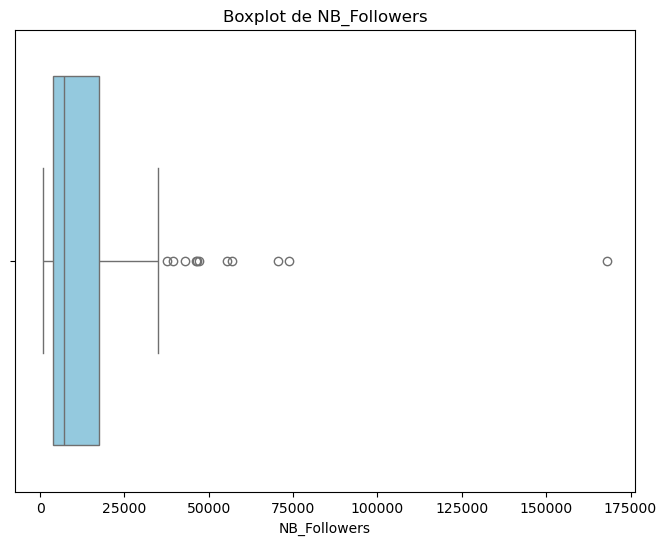

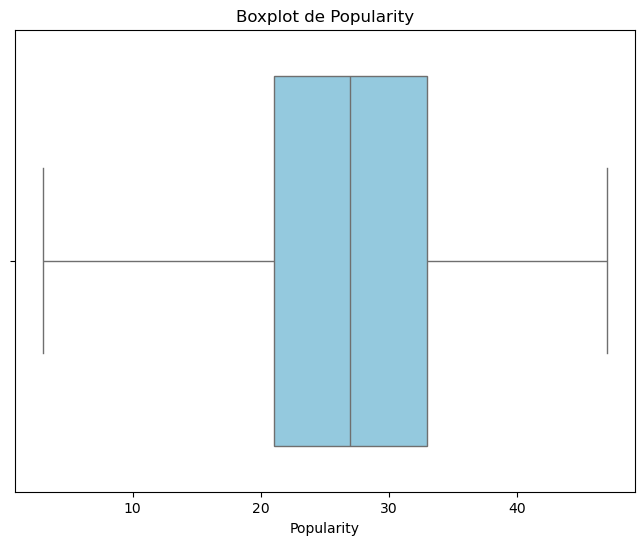

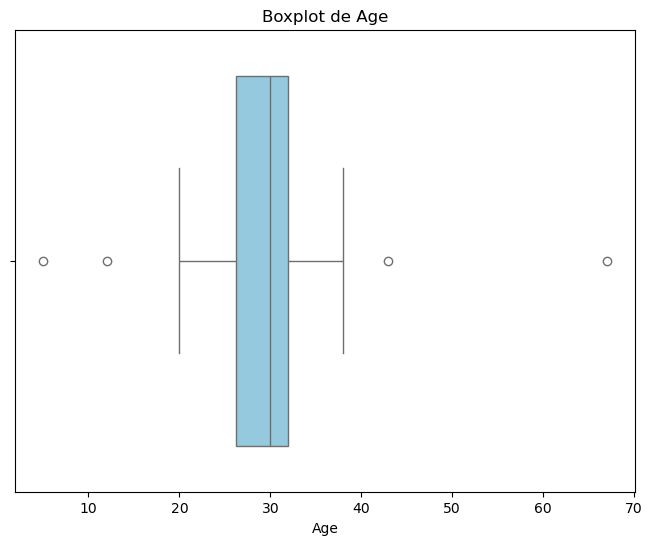

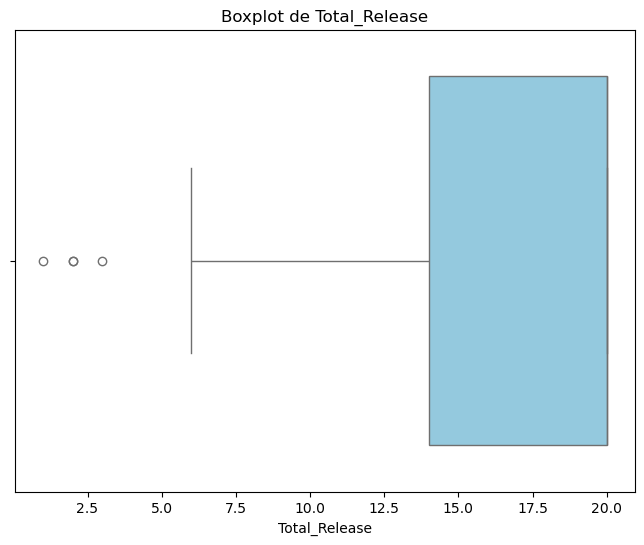

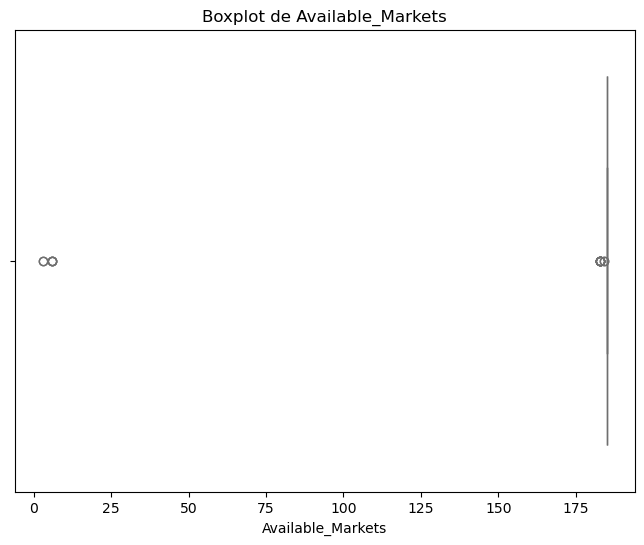

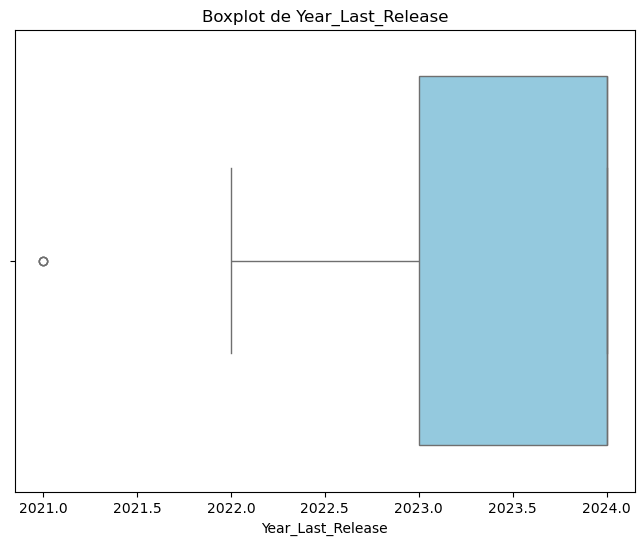

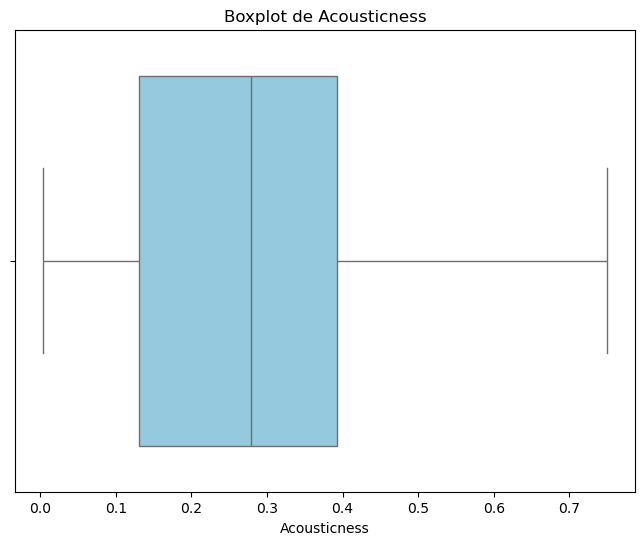

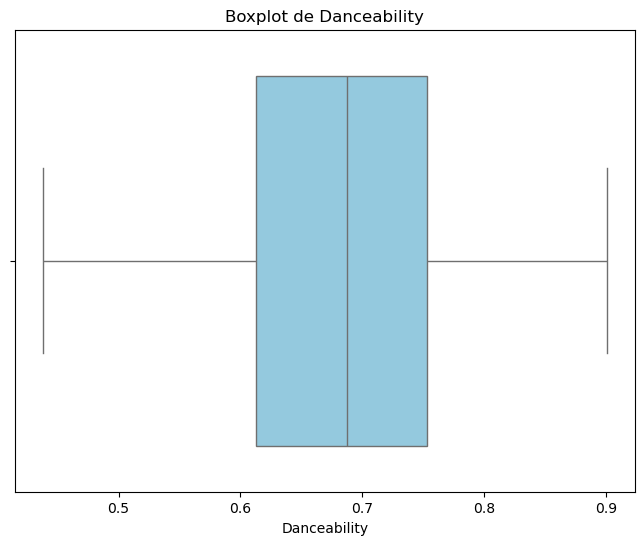

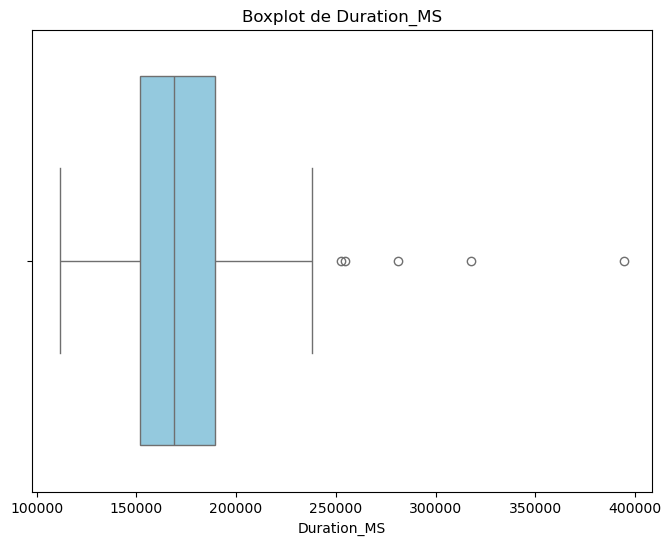

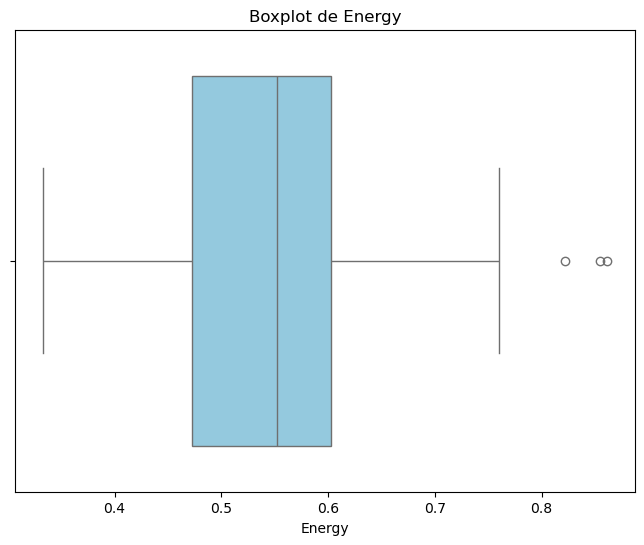

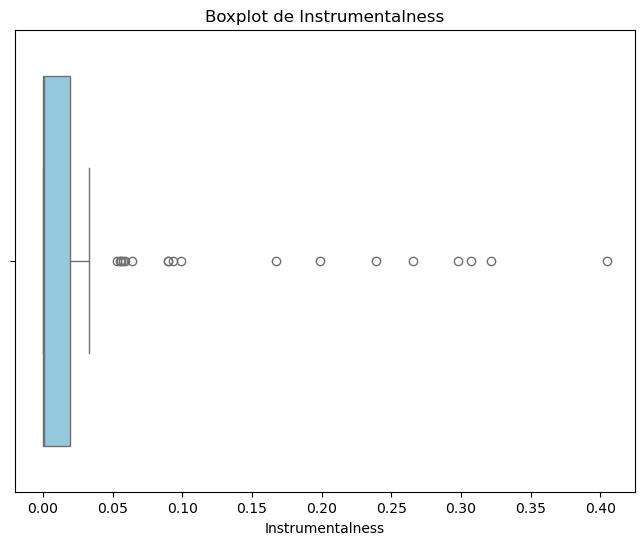

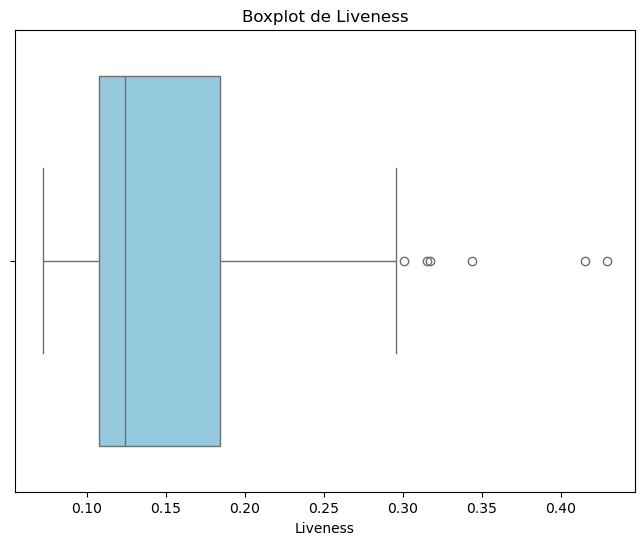

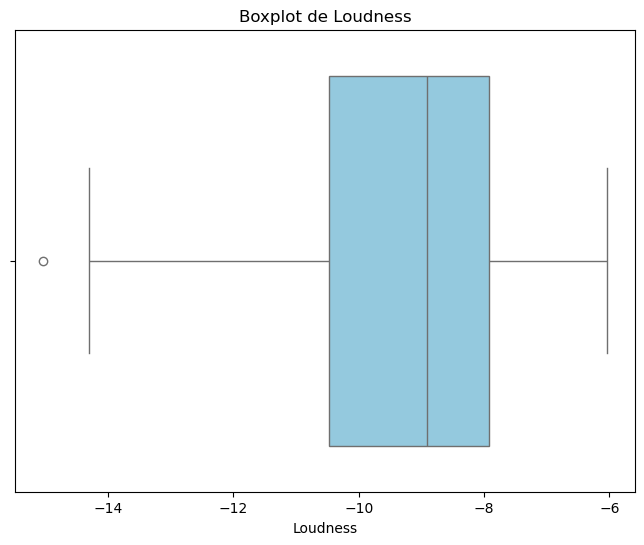

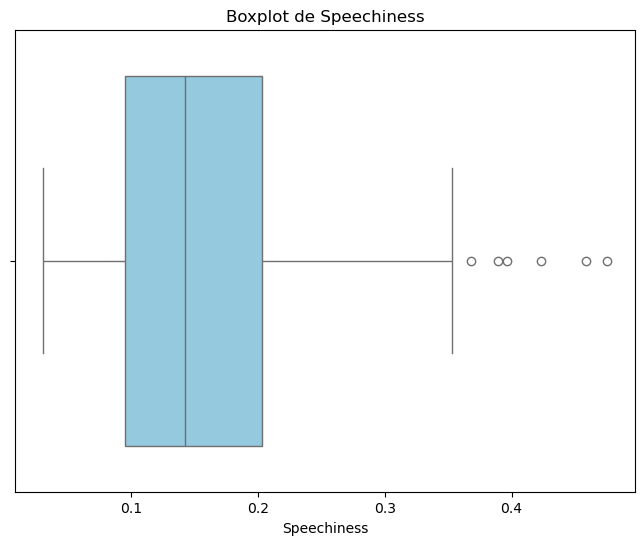

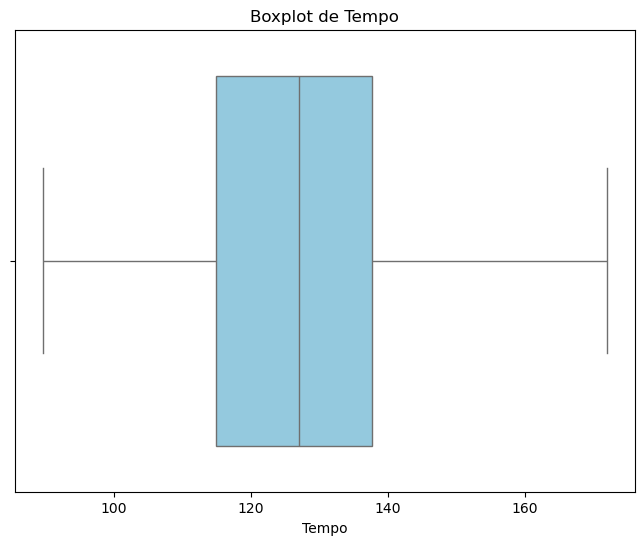

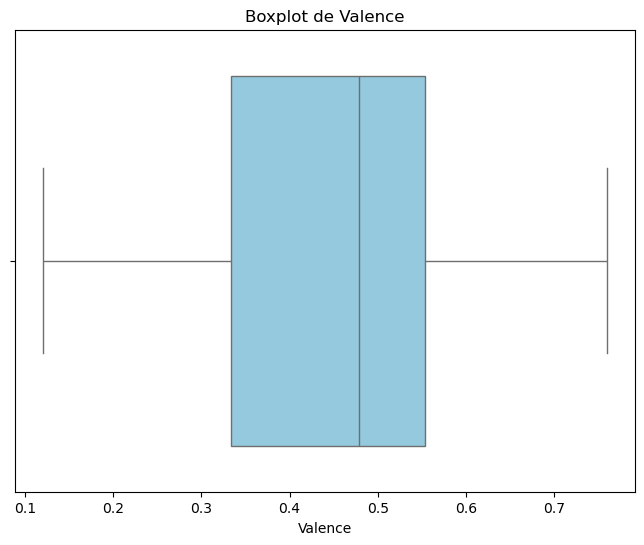

In [94]:
# Draw boxplots for all numerical variables

numeric_columns = Alters_TS.select_dtypes(include=['float64', 'int64']).columns

for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=Network_TS[column], color='skyblue')
    plt.title(f'Boxplot de {column}')
    plt.show()

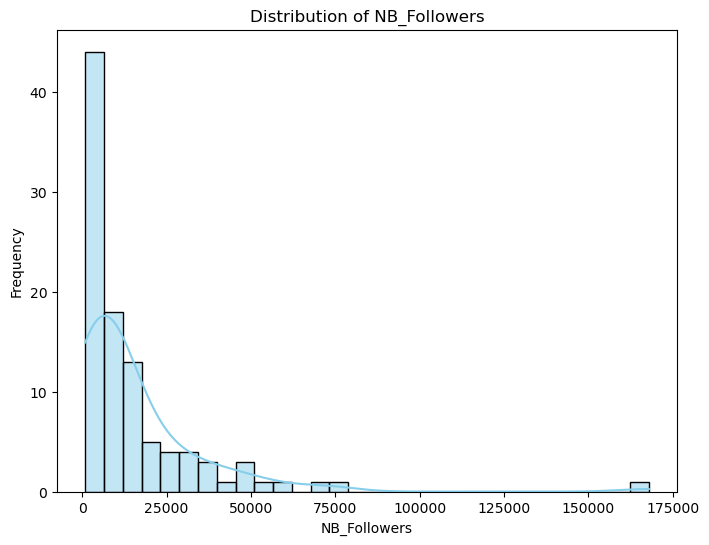

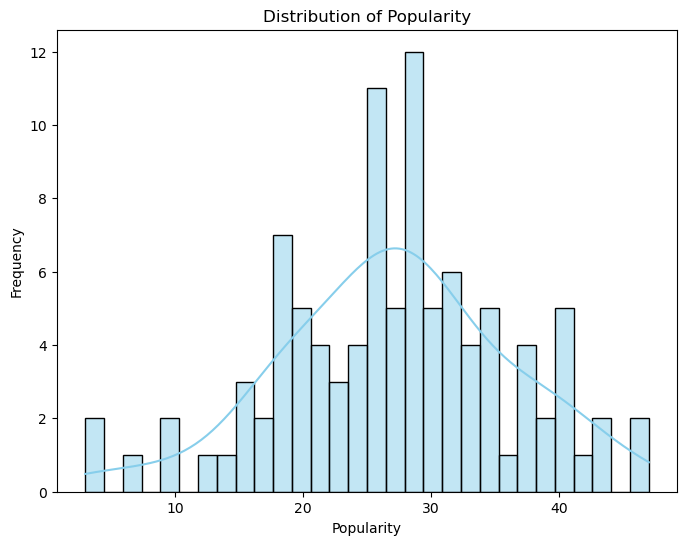

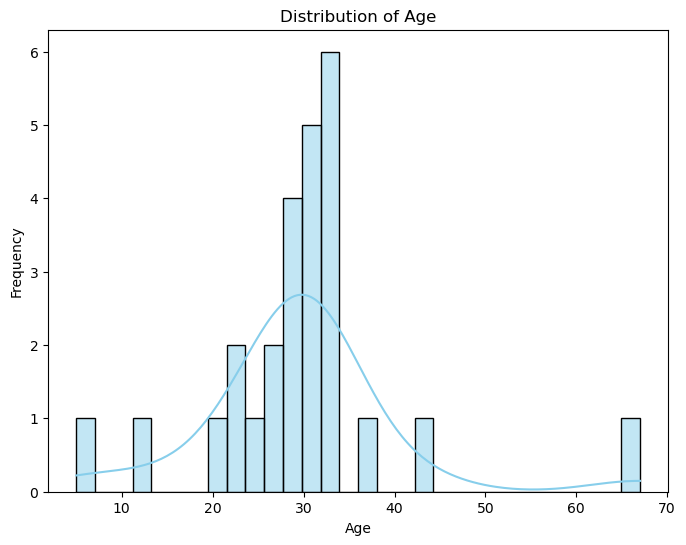

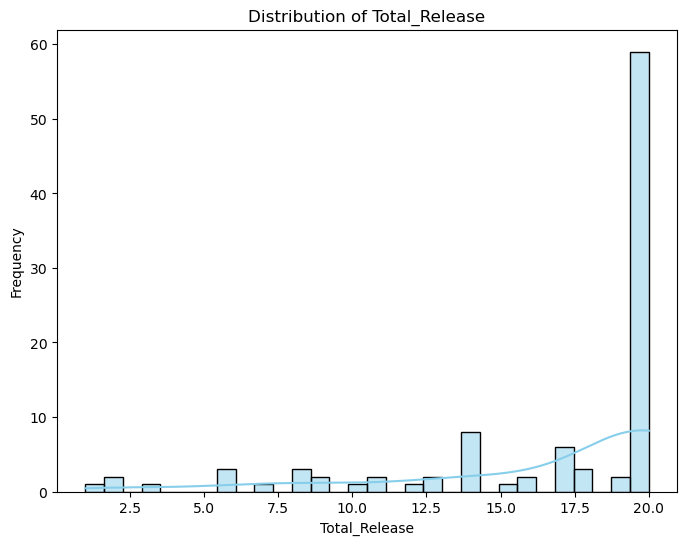

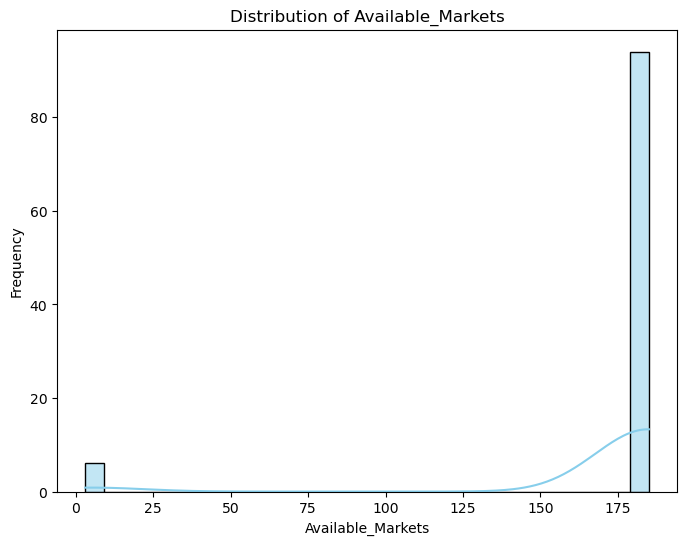

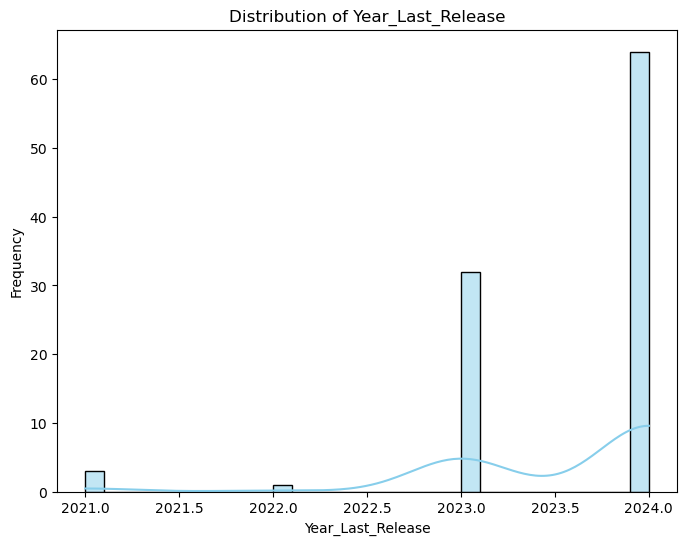

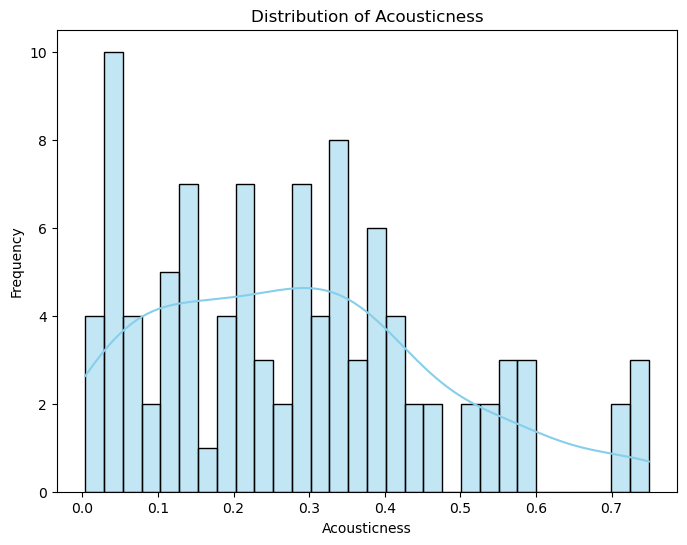

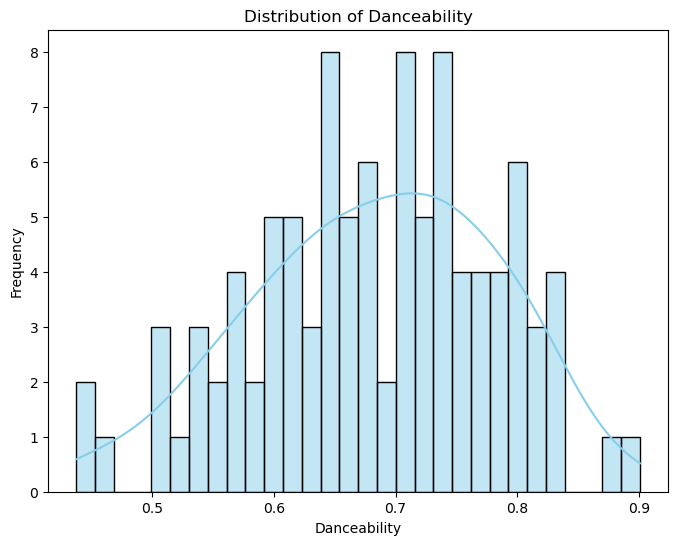

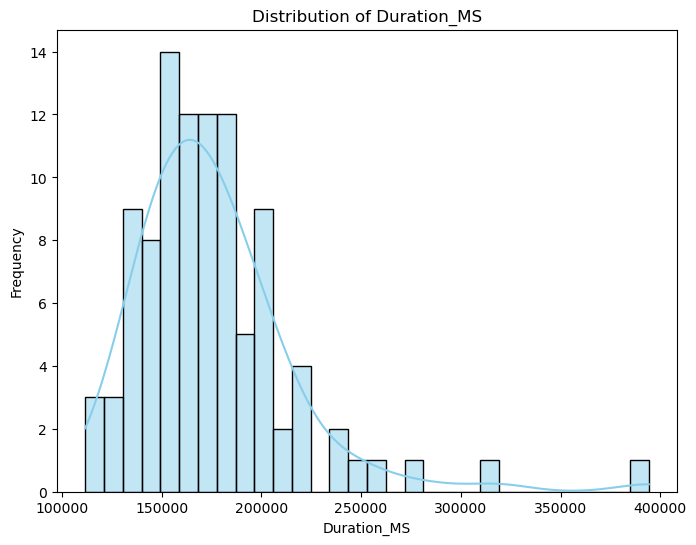

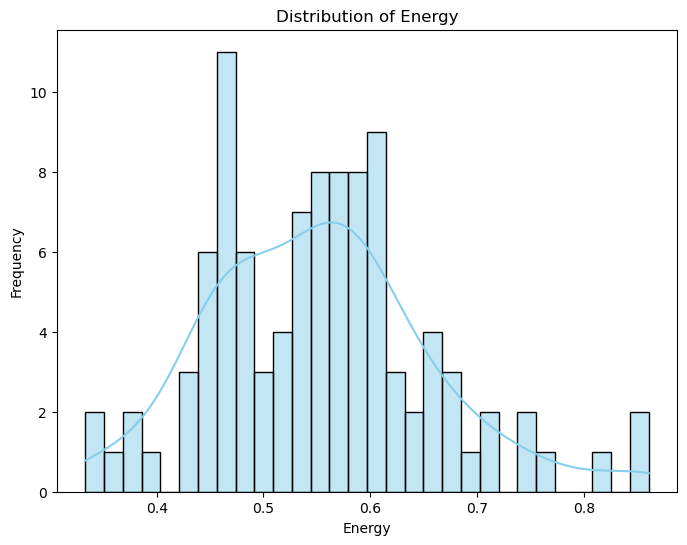

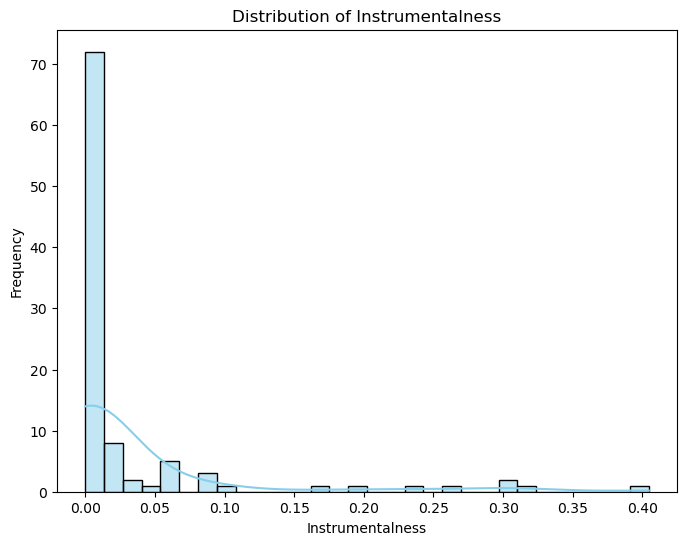

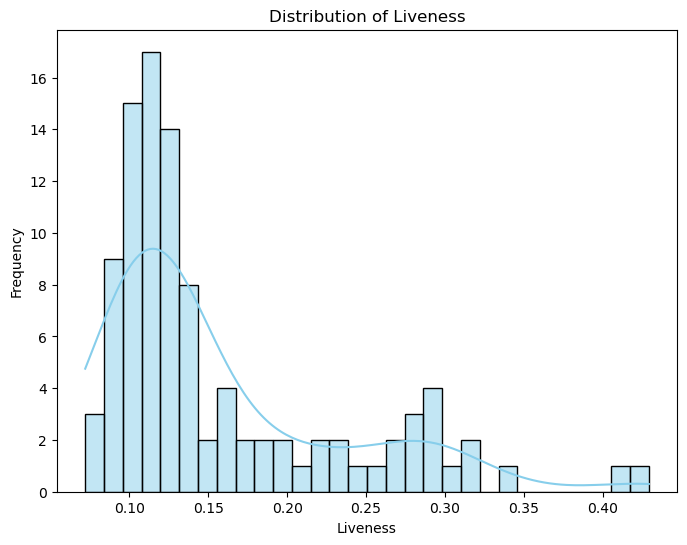

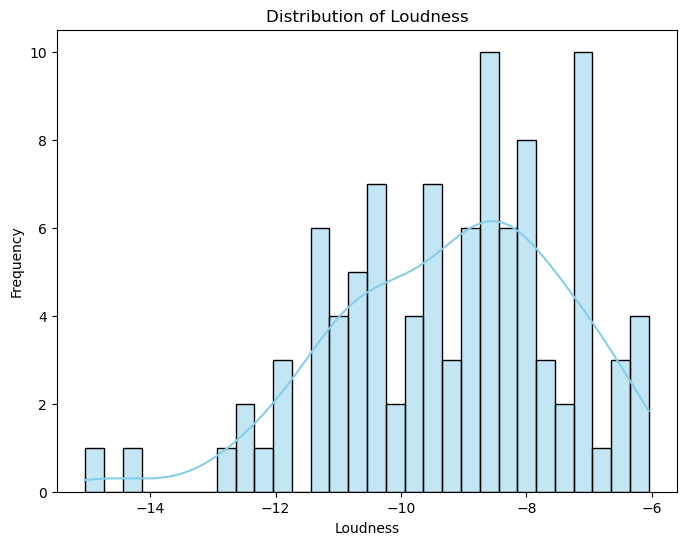

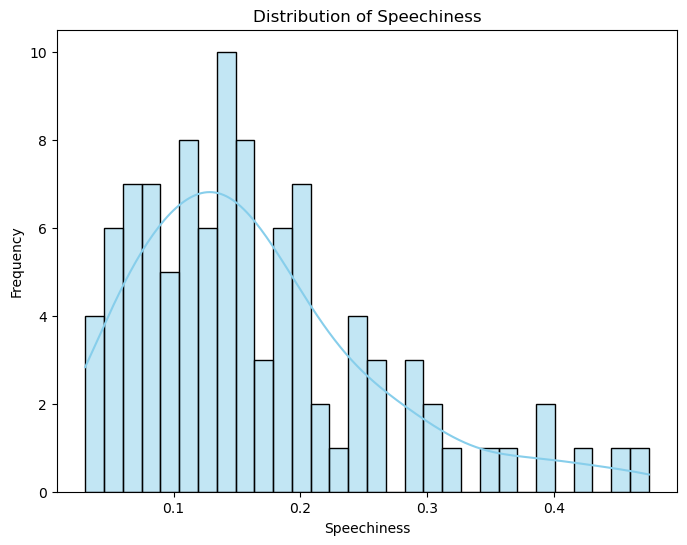

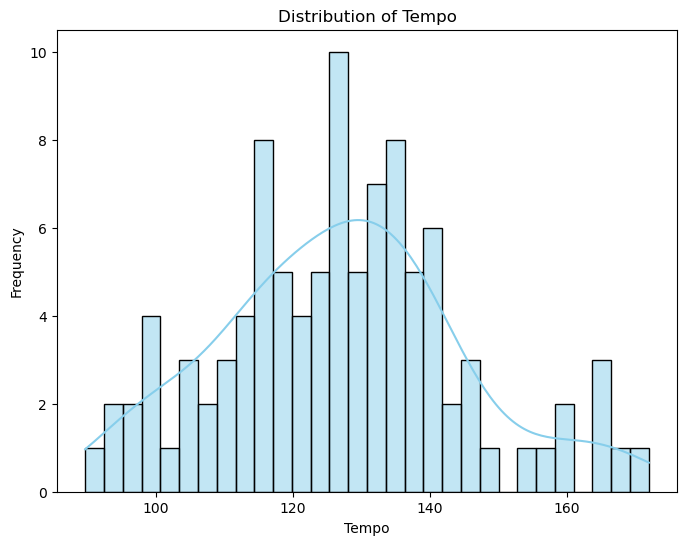

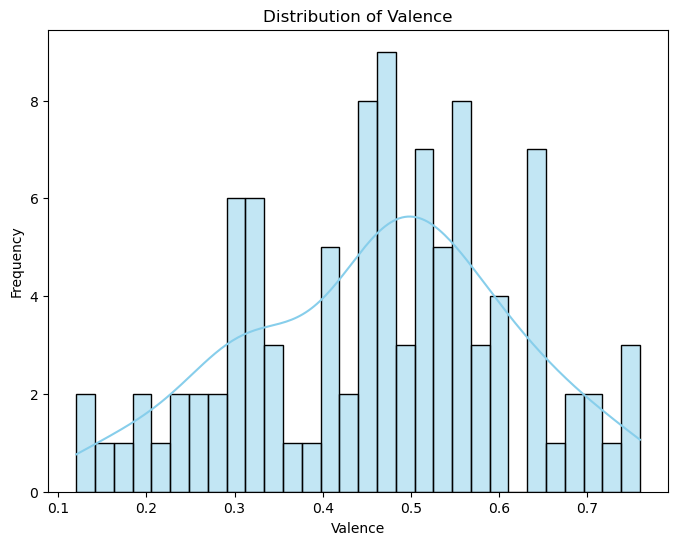

In [95]:
numeric_columns = Alters_TS.select_dtypes(include=['float64', 'int64']).columns

# Draw distribution plots for numerical variables 
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=Network_TS, x=column, kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

### B2 - Categorical variables

In [96]:
# Define a function to compare categorical variables
def compare_categorical_variable(df_1, df_2, variable):
    print(f"Comparison of {variable}:")
    print(f"Joanna's {variable}: {df_1[variable].iloc[0]}")
    print(f"Joanna's alters {variable}:")
    print(df_2[[variable]].value_counts(normalize=True) * 100)
    print("\n")

# Loop through each categorical variable
for col in Alters_TS.select_dtypes(include='object').columns:
    if col != "Artist_Name":
        compare_categorical_variable(TS_ego, Alters_TS, col)


Comparison of Genres:
Joanna's Genres: ['rennes indie']
Joanna's alters Genres:
Genres                                              
[]                                                      15.0
['rap calme']                                           15.0
['rap francais nouvelle vague']                         10.0
['electro-pop francais', 'french indietronica']          5.0
['cloud rap francais', 'rap calme']                      5.0
['cloud rap francais']                                   5.0
['drill francais', 'trap antillais']                     5.0
['french pop', 'variete francaise']                      5.0
['french hip hop']                                       5.0
['french hip hop', 'rap calme', 'rap francais']          5.0
['french pop']                                           5.0
['hyperpop francais']                                    5.0
['hyperpop francais', 'rap francais nouvelle vague']     5.0
['gabonese pop', 'rap gabonais']                         5.0
['rap calme',

Comparing the overall network data with Joanna's alters provides insights into potential features that Spotify might use in its artist recommendation process:

- **Genres:** Both in the overall network and Joanna's alters, there is a diverse range of genres represented. However, certain genres appear more frequently than others. For example, "rap calme" and "rap francais nouvelle vague" are prevalent in both datasets, suggesting that Spotify might consider genre preferences when recommending similar artists. Artists with similar genre profiles to Joanna or artists whose music falls within these prevalent genres may be recommended to users who enjoy Joanna's music.

- **Nationality:** In both datasets, artists from France dominate, indicating a strong representation of French artists within the network. However, there are also artists from various other countries. Spotify may use nationality as a factor in recommendations, potentially suggesting artists from similar cultural backgrounds or regions to users who enjoy Joanna's music.

- **Death:** The proportion of deceased artists is very low in both datasets, suggesting that Spotify likely does not use this attribute as a factor in artist recommendations.

- **Type:** The majority of artists in both datasets are individuals (Persons), with a smaller proportion being groups. Spotify may take into account whether an artist is a solo artist or part of a group when making recommendations, potentially suggesting similar solo artists or groups based on the user's listening habits.

- **Gender:** In both datasets, there is a mix of genders represented among artists, with a slightly higher proportion of male artists, while Joanna is a female. Spotify may use gender as a factor in recommendations, but it doesn't seem to prioritize the same gender as the artist of reference.

Overall, Spotify likely employs a combination of factors such as genre preferences, nationality, artist type (solo or group), and gender when recommending artists to users. By analyzing these characteristics alongside users' listening behavior, Spotify can tailor recommendations to individual users' tastes and preferences, enhancing their music discovery experience.

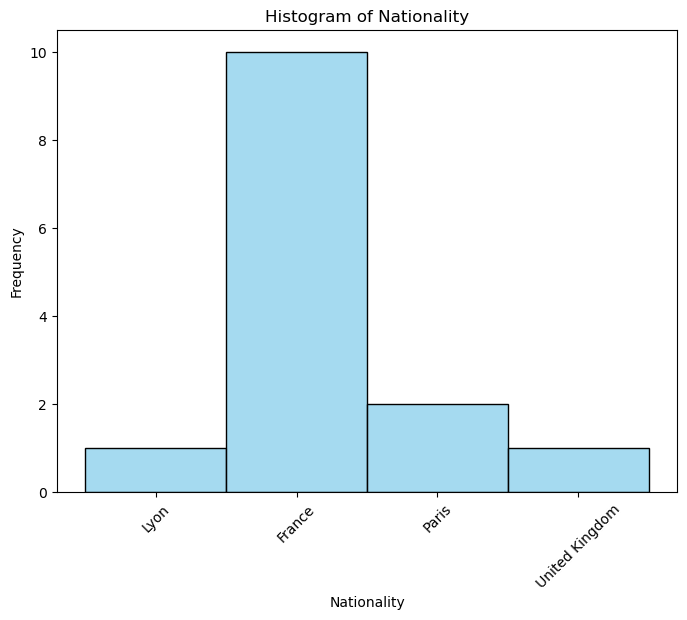

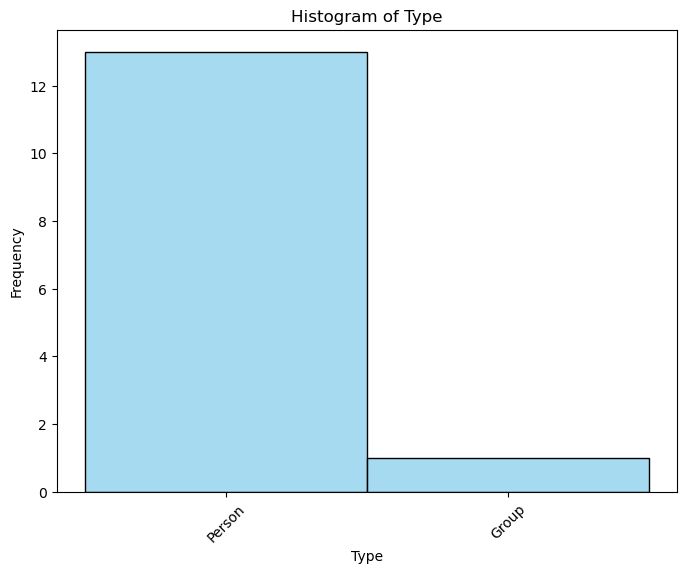

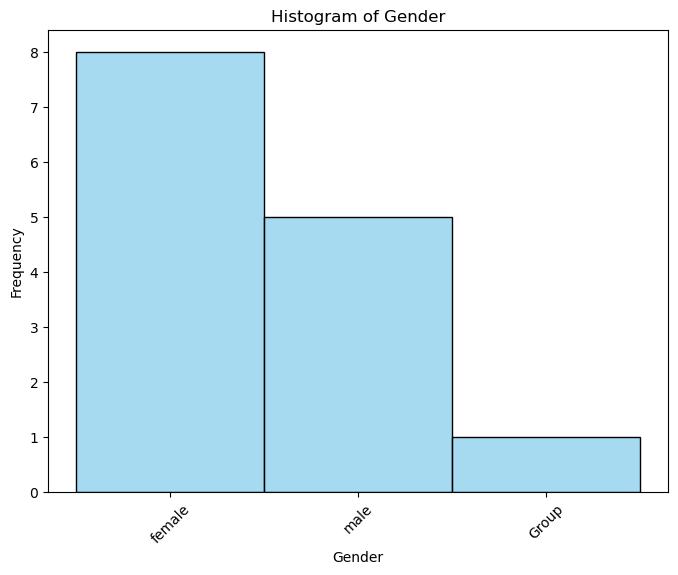

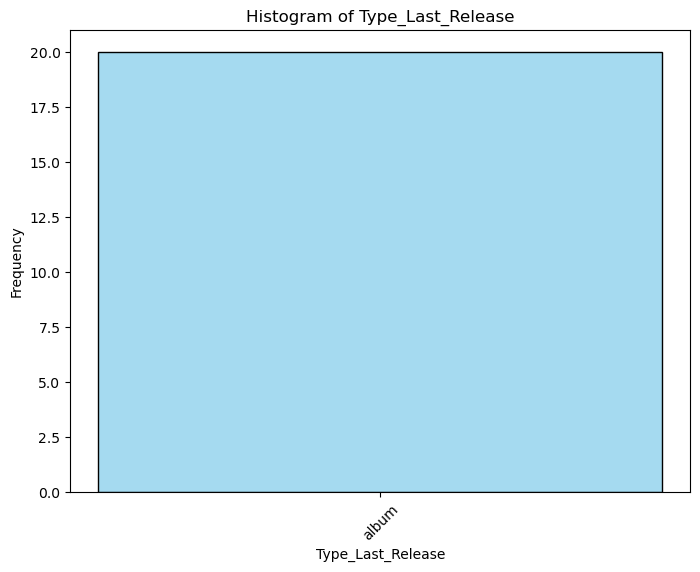

In [97]:
# Loop through each categorical variable except "Artist_Name"
for col in Alters_TS.select_dtypes(include='object').columns:
    if col != "Artist_Name" and col != "Genres":
        plt.figure(figsize=(8, 6))
        sns.histplot(data=Alters_TS, x=col, color='skyblue', discrete=True)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.show() 

In [98]:
## Blau index (for a categorical variable with more than 2 categories)

# Function
def blau(df, col):
    return (1- ((df[col].value_counts() / df[col].count()) ** 2).sum())
    
# List to store Blau index results
blau_results = {}

# List to store Index of Qualitative Variation results
# This is a normalized version of Blau
# It is equal to Blau * k/(k-1), where k is the number of categories
iqv_results = {}

# List to store Herfindahl-Hirschman index (HHI) results
# equal to 1 - Blau
hhi_results = {}

# Loop through categorical columns except "Artist_Name"
for col in Alters_TS.select_dtypes(include='object').columns:
    if col != "Artist_Name" and Alters_TS[col].nunique() > 2:  # Check if the column has more than 2 distinct categories
        blau_results[col] = blau(Alters_TS, col)  # Calculate Blau index and store the result
        iqv_results[col] = blau(Alters_TS, col)*Alters_TS[col].nunique()/(Alters_TS[col].nunique()-1)
        hhi_results[col] = 1 - blau(Alters_TS, col)

# Print Blau index for each eligible categorical variable
for col, index in blau_results.items():
    print(f"Blaux Index for {col}: {index}")

# Print IQV for each eligible categorical variable
for col, index in iqv_results.items():
    print(f"Index of Qualitative Variation for {col}: {index}")

# Print HHI for each eligible categorical variable
for col, index in hhi_results.items():
    print(f"Herfindahl-Hirschman index for {col}: {index}")

Blaux Index for Genres: 0.915
Blaux Index for Nationality: 0.4591836734693878
Blaux Index for Gender: 0.5408163265306123
Index of Qualitative Variation for Genres: 0.9803571428571429
Index of Qualitative Variation for Nationality: 0.6122448979591838
Index of Qualitative Variation for Gender: 0.8112244897959184
Herfindahl-Hirschman index for Genres: 0.08499999999999996
Herfindahl-Hirschman index for Nationality: 0.5408163265306122
Herfindahl-Hirschman index for Gender: 0.4591836734693877


- **Blaux Index:** 
    - Genres: In the overall network, the Blaux Index for genres (0.8758) suggests a relatively high diversity of music genres among all artists.
However, when looking specifically at artists recommended when listening to Joanna, the Blaux Index for genres is slightly higher (0.915), indicating even greater diversity in recommended genres. This suggests that Spotify aims to provide a wider range of genre recommendations to users based on their listening habits.
    - Nationality: Regarding nationality, the Blaux Index for the overall network (0.6778) indicates moderate diversity among the nationalities of artists.
However, in the recommended artists for Joanna, the Blaux Index for nationality is lower (0.4592), suggesting a concentration of artists from fewer nationalities. This could mean that Spotify's recommendation algorithm might prioritize artists from certain nationalities when suggesting music similar to Joanna's, potentially based on regional popularity or similar listener preferences.
    - Gender: Similarly, the Blaux Index for gender in the overall network (0.6111) and for recommended artists for Joanna (0.5408) indicates moderate diversity but slightly more concentrated recommendations in terms of gender. This suggests that while Spotify considers gender diversity in recommendations, there may be a slight bias towards certain genders in the recommended artists.


- **Index of Qualitative Variation:** 
    - Genre: In both cases, the Index of Qualitative Variation for genres is relatively high, indicating a wide variety of genres represented in both the overall network and Joanna's recommendations.
    - Nationality and gender: Similarly, for nationality and gender, the Index of Qualitative Variation is relatively high, suggesting diverse representation across these attributes in both datasets. However, the values are slightly lower for recommended artists for Joanna, indicating a slightly less diverse range of nationalities and genders compared to the overall network.
    

- **Herfindahl-Hirschman Index:** 
    - Genre: In the overall network, the Herfindahl-Hirschman Index for genres (0.1242) suggests a relatively low concentration, indicating a more evenly distributed presence of genres among all artists.
However, for recommended artists for Joanna, the Herfindahl-Hirschman Index for genres is even lower (0.085), indicating an even more evenly distributed presence of genres in the recommendations. This aligns with the higher Blaux Index and Index of Qualitative Variation for genres in Joanna's recommendations, indicating a more diverse range of recommended genres.
    - Nationality and gender: Conversely, for nationality and gender, the Herfindahl-Hirschman Index is higher in Joanna's recommendations compared to the overall network, suggesting a slightly higher concentration of certain nationalities and genders in the recommended artists. This implies that Spotify's recommendation algorithm may exhibit some degree of bias or preference towards certain nationalities and genders when suggesting artists similar to Joanna.
  
Overall, these statistics suggest that Spotify's recommendation algorithm aims to provide diverse genre recommendations to users, as evidenced by the higher Blaux Index and Index of Qualitative Variation for genres in Joanna's recommendations. However, there may be some degree of concentration or bias towards certain nationalities and genders in the recommended artists.

### B3 - Structural measures

In [99]:
# Find isolates (components consisting in 1 node)
list(nx.isolates(EgoNetTS)) 

[]

In [100]:
# Density
print("Density :", nx.density(EgoNetTS))

# Transitivity
print("Transitivity :", nx.transitivity(EgoNetTS)) 

# Diameter
print("Diameter :", nx.diameter(EgoNetTS)) 

print("Average shortest path length :", nx.average_shortest_path_length(EgoNetTS)) 

Density : 0.26842105263157895
Transitivity : 0.4672413793103448
Diameter : 7
Average shortest path length : 2.418421052631579


These statistical measures provide insights into the structural characteristics of the network as a whole and specifically among the artists recommended by Spotify when Joanna's music is played.

- **Density:** In the overall network, the density is 0.0864, indicating a relatively sparse network where only a small fraction of possible connections exist between artists.
However, when looking specifically at artists recommended when listening to Joanna, the density is significantly higher at 0.2684. This suggests that the recommended artists form a more densely connected network, meaning there are more direct connections or similarities between these recommended artists. In the context of Spotify, this could imply that the recommended artists share more similarities in terms of musical style, genre, or listener preferences.

- **Transitivity:** In the overall network, the transitivity is 0.3854, indicating a moderate level of clustering among artists' connections.
For the recommended artists for Joanna, the transitivity is higher at 0.4672, suggesting an even greater degree of clustering among these recommended artists. This implies that the recommended artists tend to belong to similar clusters or musical communities, where connections between artists are more common. In the context of Spotify recommendations, this could mean that users like Joanna are more likely to encounter cohesive groups of artists with shared musical characteristics in their recommendations.

- **Diameter and Average Shortest Path Length:** In the overall network, the diameter is 4, and the average shortest path length is 3.5603. This suggests that, on average, it takes around 3.56 steps to navigate from one artist to another, with a maximum distance of 4 steps between any pair of artists.
However, for recommended artists for Joanna, the diameter is higher at 7, indicating a greater maximum distance between artists in the recommended network. Additionally, the average shortest path length is lower at 2.4184, suggesting that recommended artists are more closely connected, on average, compared to the overall network. This implies that the recommended artists for Joanna form a more tightly knit network, where artists are more easily reachable from one another. In the context of Spotify, this could mean that users like Joanna are recommended artists who are not only similar to her but also more closely connected within the recommendation network.

Overall, these network statistics suggest that the artists recommended when listening to Joanna form a more densely connected and tightly knit network compared to the overall network of artists on Spotify. This indicates a higher degree of similarity and cohesion among recommended artists, potentially leading to more relevant and closely related artist recommendations for users like Joanna.

In [101]:
# degree centrality
nx.degree_centrality(EgoNetTS)

{'Wit.': 0.5789473684210527,
 'Dioscures': 0.42105263157894735,
 'SONBEST': 0.47368421052631576,
 'rad cartier': 0.7894736842105263,
 'Le Juiice': 0.7368421052631579,
 'Vicky R': 0.42105263157894735,
 'Lazuli': 0.7894736842105263,
 'Jäde': 1.2105263157894737,
 'Lala &ce': 0.7894736842105263,
 'Zinée': 0.7894736842105263,
 'Sally': 0.7368421052631579,
 'BabySolo33': 0.47368421052631576,
 'Lafleyne': 0.2631578947368421,
 'Asinine': 0.21052631578947367,
 'Yoa': 0.21052631578947367,
 'KALIKA': 0.3157894736842105,
 'Myth Syzer': 0.47368421052631576,
 'Ichon': 0.42105263157894735,
 'Bonnie Banane': 0.42105263157894735,
 'Poupie': 0.21052631578947367}

In [102]:
# The 2 artists with the highest indegree centrality
highest_indegree = sorted(nx.in_degree_centrality(EgoNetTS).items(), key=lambda x: x[1], reverse=True)[:2]
print("The 2 artists with the highest indegree centrality:")
for artist, centrality in highest_indegree:
    print(artist, centrality)

# The 2 artists with the highest outdegree centrality
highest_outdegree = sorted(nx.out_degree_centrality(EgoNetTS).items(), key=lambda x: x[1], reverse=True)[:2]
print("\nThe 2 artists with the highest outdegree centrality:")
for artist, centrality in highest_outdegree:
    print(artist, centrality)

# The 2 artists with the highest degree centrality
highest_degree = sorted(nx.degree_centrality(EgoNetTS).items(), key=lambda x: x[1], reverse=True)[:2]
print("\nThe 2 artists with the highest degree centrality:")
for artist, centrality in highest_degree:
    print(artist, centrality)

# The 2 artists with the lowest indegree centrality
lowest_indegree = sorted(nx.in_degree_centrality(EgoNetTS).items(), key=lambda x: x[1])[:2]
print("\nThe 2 artists with the lowest indegree centrality:")
for artist, centrality in lowest_indegree:
    print(artist, centrality)

# The 2 artists with the lowest outdegree centrality
lowest_outdegree = sorted(nx.out_degree_centrality(EgoNetTS).items(), key=lambda x: x[1])[:2]
print("\nThe 2 artists with the lowest outdegree centrality:")
for artist, centrality in lowest_outdegree:
    print(artist, centrality)

# The 2 artists with the lowest degree centrality
lowest_degree = sorted(nx.degree_centrality(EgoNetTS).items(), key=lambda x: x[1])[:2]
print("\nThe 2 artists with the lowest degree centrality:")
for artist, centrality in lowest_degree:
    print(artist, centrality)

The 2 artists with the highest indegree centrality:
Jäde 0.6842105263157894
rad cartier 0.631578947368421

The 2 artists with the highest outdegree centrality:
Sally 0.5789473684210527
Jäde 0.5263157894736842

The 2 artists with the highest degree centrality:
Jäde 1.2105263157894737
rad cartier 0.7894736842105263

The 2 artists with the lowest indegree centrality:
Poupie 0.05263157894736842
Lafleyne 0.10526315789473684

The 2 artists with the lowest outdegree centrality:
Asinine 0.05263157894736842
BabySolo33 0.10526315789473684

The 2 artists with the lowest degree centrality:
Asinine 0.21052631578947367
Yoa 0.21052631578947367


In the broader network of artist recommendations on Spotify, Jäde and rad cartier emerge as the most influential figures, receiving the highest number of recommendations from other artists. Conversely, Paloma and Mara have minimal influence, receiving very few recommendations and making few themselves.

When focusing specifically on artists recommended alongside Joanna, Jäde stands out as the most influential, receiving the highest number of recommendations from other artists within this context. Conversely, Asinine and BabySolo33 are among the least influential, with minimal influence and recommendations in the Joanna recommendation network.

In [103]:
# Get all unique nodes from the graph
unique_nodes = list(superstar_network_restricted.nodes())

# Create a DataFrame with the unique nodes
df_unique_nodes = pd.DataFrame(unique_nodes, columns=['Artist_Name'])

df_unique_nodes.to_csv('artists_Joanna.csv',  index=False)
Network_TS.to_csv('artists_attr_Joanna.csv',  index=False)

### B4 - Extra analysis

In [104]:
data = {}
with open("artists_attr_Joanna.csv", "r", newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        artist_name = row["Artist_Name"]
        genres = row["Genres"].strip("[]").replace("'", "").split(",")
        data[artist_name] = genres


with open("artist_genre_pairs_TS.txt", "w") as f:
    for artist, genres in data.items():
        for genre in genres:
            if genre.strip():
                f.write(f"{artist},{genre.strip()}\n")

In [105]:
with open("artist_genre_pairs_TS.txt", "r") as file:
    lines = file.readlines()

G = nx.Graph()

artistes = set()
genres = set()
genres_WC=[]

for line in lines:
    artiste, genre = line.strip().split(",")
    artistes.add(artiste)
    genres.add(genre)
    genres_WC.append(genre)

G.add_nodes_from(artistes, bipartite=0)  
G.add_nodes_from(genres, bipartite=1) 

for line in lines:
    artiste, genre = line.strip().split(",")
    G.add_edge(artiste, genre)

pos = nx.bipartite_layout(G, artistes)

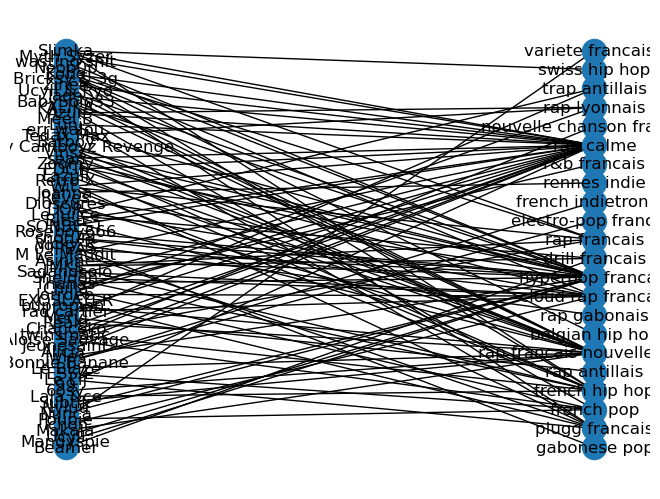

In [106]:
nx.draw(G, pos, with_labels=True)
plt.show()

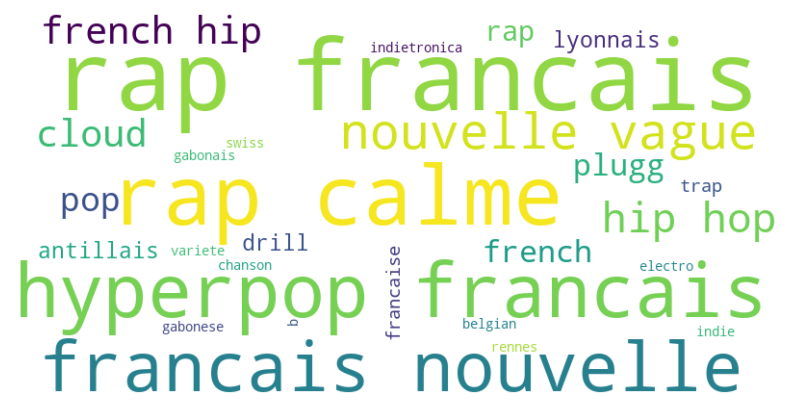

In [107]:
text = ' '.join(genres_WC)
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [108]:
# Popularity of genres
left_nodes = {n for n, d in G.nodes(data=True) if d['bipartite'] == 0}
right_nodes = {n for n, d in G.nodes(data=True) if d['bipartite'] == 1}

In [109]:
print("Nombre de genres: ",len(right_nodes))

Nombre de genres:  22


In [110]:
right_degrees = G.degree(right_nodes)

print("Degré des nœuds de la partition droite :", right_degrees)

Degré des nœuds de la partition droite : [('plugg francais', 6), ('gabonese pop', 1), ('french hip hop', 9), ('french pop', 5), ('rap antillais', 1), ('rap francais nouvelle vague', 16), ('belgian hip hop', 1), ('rap gabonais', 1), ('hyperpop francais', 19), ('cloud rap francais', 9), ('drill francais', 3), ('rap francais', 5), ('electro-pop francais', 1), ('french indietronica', 1), ('rennes indie', 1), ('r&b francais', 1), ('rap calme', 21), ('nouvelle chanson francaise', 1), ('rap lyonnais', 3), ('trap antillais', 2), ('swiss hip hop', 1), ('variete francaise', 1)]


In [111]:
# Display first top 10 of genres with the degrees and the centrality 
genre_nodes = [node for node in G.nodes if G.nodes[node]['bipartite'] == 1]
degree_centralities = nx.degree_centrality(G)
genre_degree_centralities = {node: degree_centralities[node] for node in genre_nodes}
sorted_genre_centralities = sorted(genre_degree_centralities.items(), key=lambda x: x[1], reverse=True)

print("Les 10 genres avec les plus gros degrés et leurs centralités :")
for node, centrality in sorted_genre_centralities[:10]:
    degree = G.degree[node]
    print(f"Genre : {node}, Degré : {degree}, Centralité de degré : {centrality}")

Les 10 genres avec les plus gros degrés et leurs centralités :
Genre : rap calme, Degré : 21, Centralité de degré : 0.22826086956521738
Genre : hyperpop francais, Degré : 19, Centralité de degré : 0.20652173913043478
Genre : rap francais nouvelle vague, Degré : 16, Centralité de degré : 0.17391304347826086
Genre : french hip hop, Degré : 9, Centralité de degré : 0.09782608695652173
Genre : cloud rap francais, Degré : 9, Centralité de degré : 0.09782608695652173
Genre : plugg francais, Degré : 6, Centralité de degré : 0.06521739130434782
Genre : french pop, Degré : 5, Centralité de degré : 0.05434782608695652
Genre : rap francais, Degré : 5, Centralité de degré : 0.05434782608695652
Genre : drill francais, Degré : 3, Centralité de degré : 0.03260869565217391
Genre : rap lyonnais, Degré : 3, Centralité de degré : 0.03260869565217391


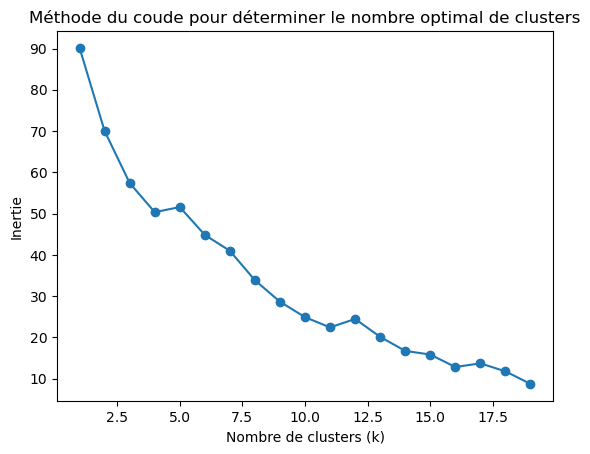

In [112]:
# Cluster of genres
# We will identify clusters or groups of genres that are often associated with each other in the graph. 
# To do this, we will use a data clustering technique such as the K-means algorithm to group similar genres into distinct clusters.
genres = [node for node in G.nodes if G.nodes[node]['bipartite'] == 1]
adjacency_matrix = nx.bipartite.biadjacency_matrix(G, row_order=artistes, column_order=genres)
adjacency_matrix_np = adjacency_matrix.toarray()
k_values = range(1, 20)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(adjacency_matrix_np)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
plt.show()

In [113]:
# Clusters identification
kmeans = KMeans(n_clusters=10)
cluster_assignments = kmeans.fit_predict(adjacency_matrix_np)

genre_clusters = {}
for i, genre in enumerate(genres):
    cluster_id = cluster_assignments[i]
    if cluster_id not in genre_clusters:
        genre_clusters[cluster_id] = []
    genre_clusters[cluster_id].append(genre)

print("Nombre de genres dans chaque cluster :")
for cluster_id, genres_in_cluster in genre_clusters.items():
    genre_count = len(genres_in_cluster)
    genres_str = ', '.join(genres_in_cluster)
    print(f"Cluster {cluster_id}: {genre_count} genres - {genres_str}")

Nombre de genres dans chaque cluster :
Cluster 9: 4 genres - gabonese pop, hyperpop francais, electro-pop francais, r&b francais
Cluster 0: 5 genres - plugg francais, french pop, belgian hip hop, rap gabonais, rap calme
Cluster 4: 4 genres - french hip hop, cloud rap francais, drill francais, rennes indie
Cluster 6: 1 genres - rap antillais
Cluster 5: 3 genres - rap francais nouvelle vague, french indietronica, trap antillais
Cluster 3: 4 genres - rap francais, nouvelle chanson francaise, rap lyonnais, variete francaise
Cluster 2: 1 genres - swiss hip hop


# V - Statistical characterization of the Network 

## A - Statistical properties of the degree

### A1 - Degree Distribution (Directed Graph)

In [114]:
in_degrees = [superstar_network_restricted.in_degree(node) for node in superstar_network_restricted.nodes()]
out_degrees = [superstar_network_restricted.out_degree(node) for node in superstar_network_restricted.nodes()]
total_degrees = [superstar_network_restricted.degree(node) for node in superstar_network_restricted.nodes()]

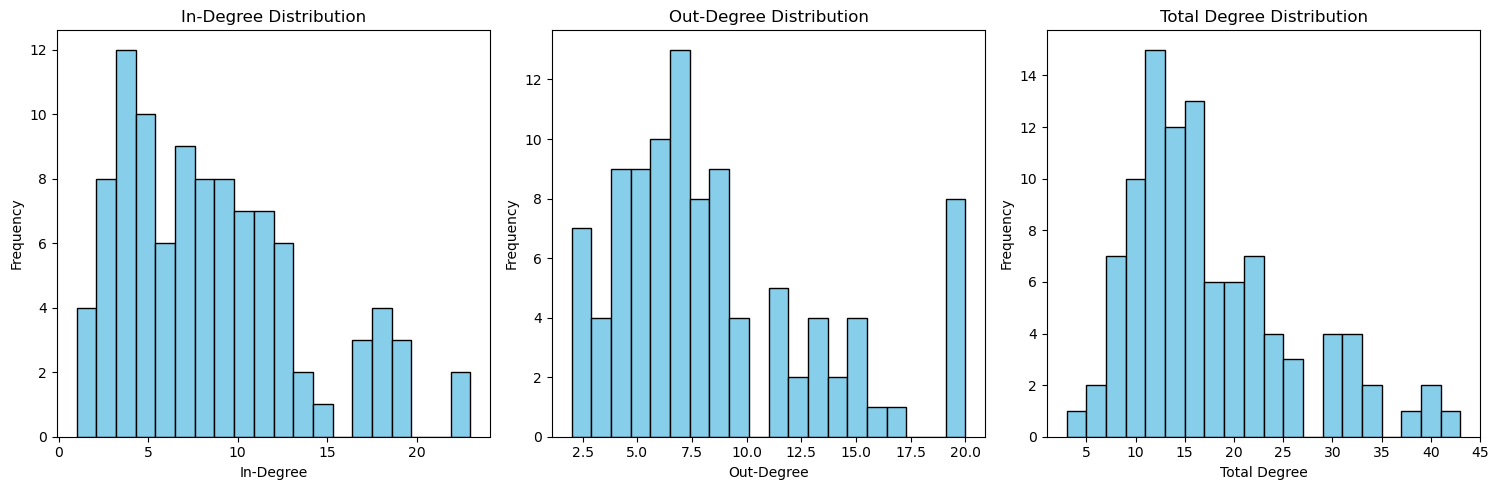

In [115]:
# Plot histograms for in-degree, out-degree, and total degree distributions
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(in_degrees, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('In-Degree')
plt.ylabel('Frequency')
plt.title('In-Degree Distribution')

plt.subplot(1, 3, 2)
plt.hist(out_degrees, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Out-Degree')
plt.ylabel('Frequency')
plt.title('Out-Degree Distribution')

plt.subplot(1, 3, 3)
plt.hist(total_degrees, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Total Degree')
plt.ylabel('Frequency')
plt.title('Total Degree Distribution')

plt.tight_layout()
plt.show()

* The histograms shows the distribution of node degrees in the network.
* The histograms of in-degree, out-degree, and total degree distributions show a skew towards a lower number of degrees for most nodes. This suggests that most artists are recommended by only a few others, with a few nodes (likely popular artists) having high in-degree and out-degree values, indicative of a heterogeneous (scale-free) network.

In [116]:
# Applying log-binning to degree distribution
def logBinning(degreeList, nbin):
    kmin = min(degreeList)
    kmax = max(degreeList)
    logBins = np.logspace(np.log10(kmin), np.log10(kmax), num=nbin)
    logBinDensity, binedges = np.histogram(degreeList, bins=logBins, density=True)
    logBins = np.delete(logBins, -1)
    return logBinDensity, logBins

In [117]:
pk_in, k_in = logBinning(in_degrees, 1000)
pk_out, k_out = logBinning(out_degrees, 1000)
pk_total, k_total = logBinning(total_degrees, 1000)

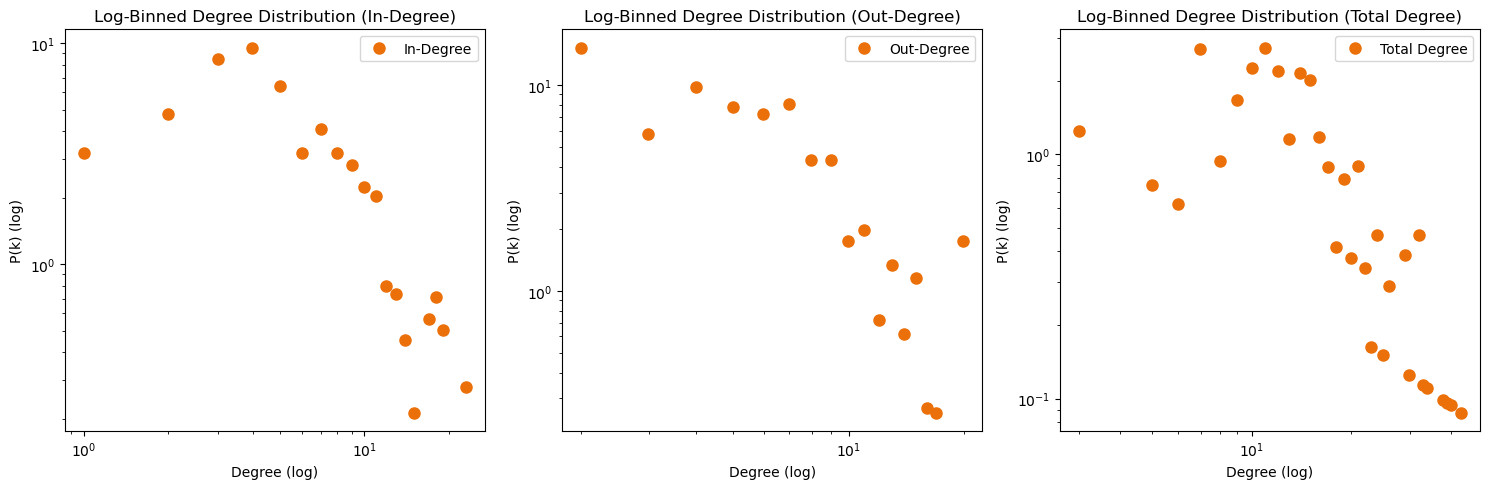

In [118]:
# Plot log-binned for in-degree, out-degree, and total degree distributions
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.loglog(k_in, pk_in, 'o', color='#EB7009', markersize=8, label='In-Degree')
plt.xlabel('Degree (log)')
plt.ylabel('P(k) (log)')
plt.title('Log-Binned Degree Distribution (In-Degree)')
plt.legend()

plt.subplot(1, 3, 2)
plt.loglog(k_out, pk_out, 'o', color='#EB7009', markersize=8, label='Out-Degree')
plt.xlabel('Degree (log)')
plt.ylabel('P(k) (log)')
plt.title('Log-Binned Degree Distribution (Out-Degree)')
plt.legend()

plt.subplot(1, 3, 3)
plt.loglog(k_total, pk_total, 'o', color='#EB7009', markersize=8, label='Total Degree')
plt.xlabel('Degree (log)')
plt.ylabel('P(k) (log)')
plt.title('Log-Binned Degree Distribution (Total Degree)')
plt.legend()

plt.tight_layout()
plt.show()

* The log-binned degree distribution graphs provide insights into the connectivity patterns of the network and reveal the structure of the network on a multiplicative scale.
* A straight-line trend (power-law (pareto) distribution) in these plots is characteristic of scale-free networks, where few nodes (artists) act as hubs with a high number of connections.

### A2 - Degree Distribution (Undirected Graph)

In [120]:
superstar_network_undirected = nx.read_edgelist('Joanna_Network_names.txt', create_using=nx.Graph(), delimiter=', ', data=False)
superstar_network_restricted_undirected = nx.Graph()

for node in superstar_network.nodes():
    if superstar_network.out_degree(node) > 0:
        superstar_network_restricted_undirected.add_node(node)
        for succ in superstar_network.successors(node):
            if superstar_network.out_degree(succ) > 0:
                superstar_network_restricted_undirected.add_edge(node, succ)

print(superstar_network_restricted_undirected.number_of_edges())

640


In [121]:
print(superstar_network_restricted_undirected)

Graph with 100 nodes and 640 edges


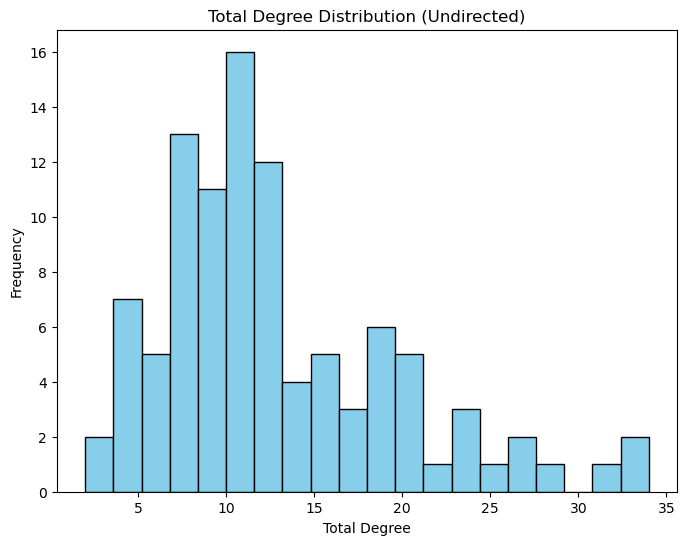

In [122]:
# Plot histograms for total degree distributions for the undirected graph
total_degrees_undirected = [superstar_network_restricted_undirected.degree(node) for node in superstar_network_restricted_undirected.nodes()]

plt.figure(figsize=(8, 6))
plt.hist(total_degrees_undirected, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Total Degree')
plt.ylabel('Frequency')
plt.title('Total Degree Distribution (Undirected)')
plt.show()

* The degree distribution of the undirected graph provides a view of the network's structure without the directionality of recommendations.
* This histogram helps in understanding the general connectivity of the nodes, which may point to the average number of other artists an artist is associated with in the network. The graph show how interconnected the network is, potentially indicating a 'small-world' nature where most nodes can be reached from every other by a small number of steps.

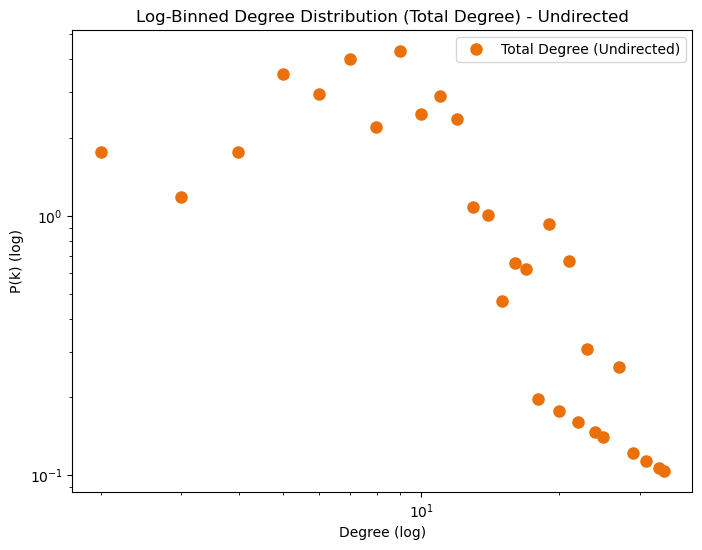

In [123]:
# Applying log-binning to degree distribution for undirected graph
pk, k = logBinning(total_degrees_undirected, 1000)

plt.figure(figsize=(8, 6))
plt.loglog(k, pk, 'o', color='#EB7009', markersize=8, label='Total Degree (Undirected)')
plt.xlabel('Degree (log)')
plt.ylabel('P(k) (log)')
plt.title('Log-Binned Degree Distribution (Total Degree) - Undirected')
plt.legend()
plt.show()

* Similar to the directed case, this plot is useful for identifying the scaling properties of the network. It could indicate a hierarchy where a small number of artists are highly connected. As it suggest the presence of influential nodes with many connections, which can have significant implications for network dynamics and information flow.

### A3 - Degree assortativity/correlation (Directed Graph)

In [124]:
TS_Nodes_Attributes = pd.read_csv('Joanna_Attr_Network.csv')

In [125]:
superstar_network = nx.read_edgelist('Joanna_Network_names.txt', comments="Node", create_using=nx.DiGraph(), delimiter=',', data=False)

In [126]:
superstar_network_restricted = nx.DiGraph()
for node in superstar_network.nodes():
    if superstar_network.out_degree(node) > 0:
        superstar_network_restricted.add_node(node)
        for succ in superstar_network.successors(node):
            if superstar_network.out_degree(succ) > 0:
                superstar_network_restricted.add_edge(node, succ)

In [127]:
# Add nodes with attributes
for _, row in TS_Nodes_Attributes.iterrows():
    artist_name = row['Artist_Name']
    attributes = row.drop('Artist_Name').to_dict()
    superstar_network_restricted.add_node(artist_name, **attributes)

# View results
print(superstar_network_restricted.nodes(data=True))

[('Joanna', {'NB_Followers': 31771.0, 'Genres': "['rennes indie']", 'Popularity': 34.0, 'Nationality': 'Brazil', 'Age': 67.0, 'Death': False, 'Type': 'Person', 'Gender': 'female', 'Total_Release': 20.0, 'Available_Markets': 185.0, 'Year_Last_Release': 2023.0, 'Type_Last_Release': 'album', 'Acousticness': 0.2801, 'Danceability': 0.7086666666666667, 'Duration_MS': 204868.0, 'Energy': 0.5496666666666666, 'Instrumentalness': 0.0, 'Liveness': 0.1152, 'Loudness': -8.712666666666665, 'Speechiness': 0.1499666666666666, 'Tempo': 100.51866666666668, 'Valence': 0.2675666666666667}), ('Jäde', {'NB_Followers': 16064.0, 'Genres': "['rap calme', 'rap francais nouvelle vague']", 'Popularity': 35.0, 'Nationality': 'Lyon', 'Age': nan, 'Death': False, 'Type': 'Person', 'Gender': 'female', 'Total_Release': 20.0, 'Available_Markets': 6.0, 'Year_Last_Release': 2024.0, 'Type_Last_Release': 'album', 'Acousticness': 0.4143333333333334, 'Danceability': 0.7576666666666667, 'Duration_MS': 171742.0, 'Energy': 0.51

In [128]:
# Calculate degree assortativity
degree_assortativity = nx.degree_assortativity_coefficient(superstar_network_restricted)
print("Degree Assortativity Coefficient:", degree_assortativity)

Degree Assortativity Coefficient: 0.030518396907165724


* The assortativity coefficient value indicates a weak level of the likelihood of nodes to attach to others with similar degree. A positive value implies a preference for connecting to similar nodes.

In [129]:
# Calculate assortativity based on specific attributes
categorical_attributes = ['Genres', 'Nationality', 'Type', 'Gender', 'Age', 'NB_Followers', 'Popularity', 'Total_Release', 'Available_Markets', 'Year_Last_Release', 
                        'Acousticness', 'Danceability', 'Duration_MS', 'Energy', 'Instrumentalness', 
                        'Liveness', 'Loudness', 'Speechiness', 'Tempo', 'Valence']

for cat_attr in categorical_attributes:
    assortativity = nx.attribute_assortativity_coefficient(superstar_network_restricted, cat_attr)
    print(f"Assortativity based on {cat_attr}: {assortativity}")


Assortativity based on Genres: 0.12942669839824134
Assortativity based on Nationality: 0.027074063675460797
Assortativity based on Type: 0.01204039657045134
Assortativity based on Gender: 0.12801251241537565
Assortativity based on Age: -0.013297473729787342
Assortativity based on NB_Followers: -0.011674686440009466
Assortativity based on Popularity: -0.005193707202443559
Assortativity based on Total_Release: 0.06153398145244387
Assortativity based on Available_Markets: 0.018688843101462432
Assortativity based on Year_Last_Release: 0.10789380388132919
Assortativity based on Acousticness: -0.01173909372867774
Assortativity based on Danceability: -0.012235493745009322
Assortativity based on Duration_MS: -0.011674686440009466
Assortativity based on Energy: -0.010519271243953708
Assortativity based on Instrumentalness: -0.01045206859239288
Assortativity based on Liveness: -0.01218737149052301
Assortativity based on Loudness: -0.011674686440009466
Assortativity based on Speechiness: -0.01195

* The assortativity based on categorical and numerical attributes provides insights into the homophily of the network. For instance, assortativity based on genres or nationality can suggest a tendency of artists to be recommended with those of similar genres or from the same countries.

In [130]:
# Degree mixing : Calculate the average degree of neighbors for each node
kDict = dict(superstar_network_restricted.degree())
knn = {}
for n in superstar_network_restricted.nodes():
    #neighbors = list(superstar_network_restricted.neighbors(n))
    neighbor_degrees = [kDict[v] for v in superstar_network_restricted.neighbors(n)]
    knn[n] = np.mean(neighbor_degrees)

/opt/mamba/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/mamba/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


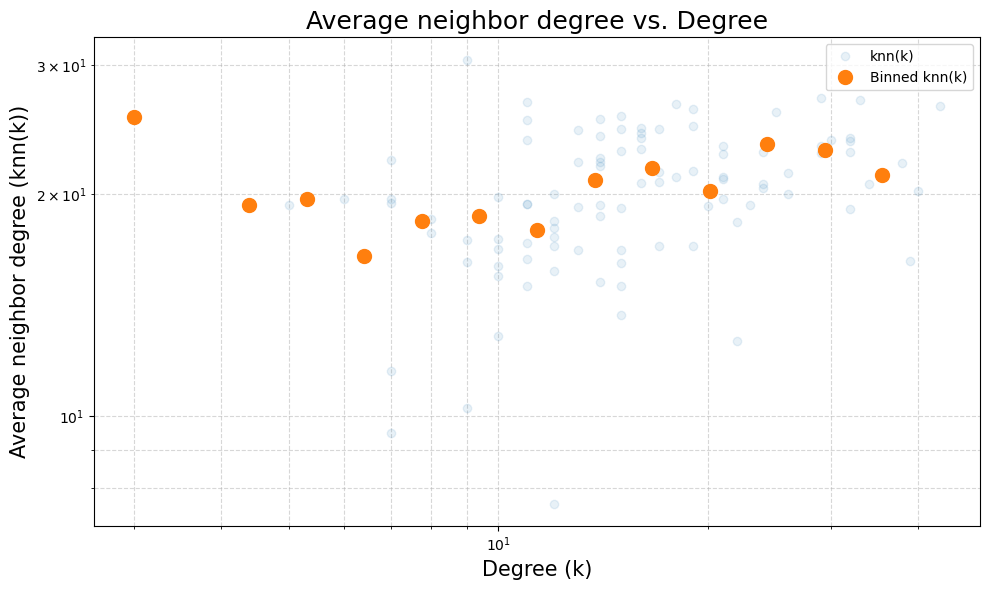

In [131]:
# Plot the average degree of neighbors for each node
xx = list(kDict.values())
yy = [knn[n] for n in kDict.keys()]
xx_filtered = [x for x, y in zip(xx, yy) if not np.isnan(y)]
yy_filtered = [y for y in yy if not np.isnan(y)]

plt.figure(figsize=(10, 6))
plt.loglog(xx_filtered, yy_filtered, 'o', alpha=0.1, label='knn(k)')

logBins = np.logspace(np.log2(np.nanmin(xx_filtered)), np.log2(np.nanmax(xx_filtered)), base=2, num=15)
ybin, xbin, _ = scipy.stats.binned_statistic(xx_filtered, yy_filtered, statistic='mean', bins=logBins)
plt.loglog(xbin[:-1], ybin, 'o', markersize=10, label='Binned knn(k)')

plt.xlabel('Degree (k)', size=15)
plt.ylabel('Average neighbor degree (knn(k))', size=15)
plt.title('Average neighbor degree vs. Degree', size=18)
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.tight_layout()
plt.show()

* These scatter plots show the relationship between the degree of a node and the average degree of its neighbors. An upward trend would indicate assortative mixing, meaning high-degree nodes tend to connect with other high-degree nodes.

### A4 - Degree assortativity/correlation (Undirected Graph)

In [132]:
superstar_network_undirected = nx.read_edgelist('Joanna_Network_names.txt', create_using=nx.Graph(), delimiter=', ', data=False)
superstar_network_restricted_undirected = nx.Graph()

for node in superstar_network.nodes():
    if superstar_network.out_degree(node) > 0:
        superstar_network_restricted_undirected.add_node(node)
        for succ in superstar_network.successors(node):
            if superstar_network.out_degree(succ) > 0:
                superstar_network_restricted_undirected.add_edge(node, succ)

print(superstar_network_restricted_undirected.number_of_edges())

640


In [133]:
# Add nodes with attributes
for _, row in TS_Nodes_Attributes.iterrows():
    artist_name = row['Artist_Name']
    attributes = row.drop('Artist_Name').to_dict()
    superstar_network_restricted_undirected.add_node(artist_name, **attributes)

# View results
print(superstar_network_restricted_undirected.nodes(data=True))

[('Joanna', {'NB_Followers': 31771.0, 'Genres': "['rennes indie']", 'Popularity': 34.0, 'Nationality': 'Brazil', 'Age': 67.0, 'Death': False, 'Type': 'Person', 'Gender': 'female', 'Total_Release': 20.0, 'Available_Markets': 185.0, 'Year_Last_Release': 2023.0, 'Type_Last_Release': 'album', 'Acousticness': 0.2801, 'Danceability': 0.7086666666666667, 'Duration_MS': 204868.0, 'Energy': 0.5496666666666666, 'Instrumentalness': 0.0, 'Liveness': 0.1152, 'Loudness': -8.712666666666665, 'Speechiness': 0.1499666666666666, 'Tempo': 100.51866666666668, 'Valence': 0.2675666666666667}), ('Jäde', {'NB_Followers': 16064.0, 'Genres': "['rap calme', 'rap francais nouvelle vague']", 'Popularity': 35.0, 'Nationality': 'Lyon', 'Age': nan, 'Death': False, 'Type': 'Person', 'Gender': 'female', 'Total_Release': 20.0, 'Available_Markets': 6.0, 'Year_Last_Release': 2024.0, 'Type_Last_Release': 'album', 'Acousticness': 0.4143333333333334, 'Danceability': 0.7576666666666667, 'Duration_MS': 171742.0, 'Energy': 0.51

In [134]:
# Calculate degree assortativity
degree_assortativity = nx.degree_assortativity_coefficient(superstar_network_restricted_undirected)
print("Degree Assortativity Coefficient:", degree_assortativity)

Degree Assortativity Coefficient: 0.08971473044817475


* The assortativity coefficient value indicates a moderate level of the likelihood of nodes to attach to others with similar degree. A positive value implies a preference for connecting to similar nodes.

In [135]:
# Calculate assortativity based on specific attributes
categorical_attributes = ['Genres', 'Nationality', 'Type', 'Gender', 'Age', 'NB_Followers', 'Popularity', 'Total_Release', 'Available_Markets', 'Year_Last_Release', 
                        'Acousticness', 'Danceability', 'Duration_MS', 'Energy', 'Instrumentalness', 
                        'Liveness', 'Loudness', 'Speechiness', 'Tempo', 'Valence']

for cat_attr in categorical_attributes:
    assortativity = nx.attribute_assortativity_coefficient(superstar_network_restricted_undirected, cat_attr)
    print(f"Assortativity based on {cat_attr}: {assortativity}")


Assortativity based on Genres: 0.1136499846119789
Assortativity based on Nationality: 0.020063024172437244
Assortativity based on Type: 0.010272188914663046
Assortativity based on Gender: 0.11921068772586793
Assortativity based on Age: -0.01426181674786929
Assortativity based on NB_Followers: -0.012971275240815622
Assortativity based on Popularity: -0.010557148959541105
Assortativity based on Total_Release: 0.07590074548580233
Assortativity based on Available_Markets: -0.0038591363411794627
Assortativity based on Year_Last_Release: 0.10556640550011143
Assortativity based on Acousticness: -0.013027644327379078
Assortativity based on Danceability: -0.01304829790001053
Assortativity based on Duration_MS: -0.012971275240815622
Assortativity based on Energy: -0.011059703580630107
Assortativity based on Instrumentalness: -0.012683303700989013
Assortativity based on Liveness: -0.013427418456947894
Assortativity based on Loudness: -0.01297127524081562
Assortativity based on Speechiness: -0.013

* The assortativity based on categorical and numerical attributes provides insights into the homophily of the network. For instance, assortativity based on genres or nationality can suggest a tendency of artists to be recommended with those of similar genres or from the same countries.

In [136]:
# Degree mixing : Calculate the average degree of neighbors for each node
kDict = dict(superstar_network_restricted_undirected.degree())
knn = {}
for n in superstar_network_restricted_undirected.nodes():
    #neighbors = list(superstar_network_restricted.neighbors(n))
    neighbor_degrees = [kDict[v] for v in superstar_network_restricted_undirected.neighbors(n)]
    knn[n] = np.mean(neighbor_degrees)

/opt/mamba/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/mamba/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


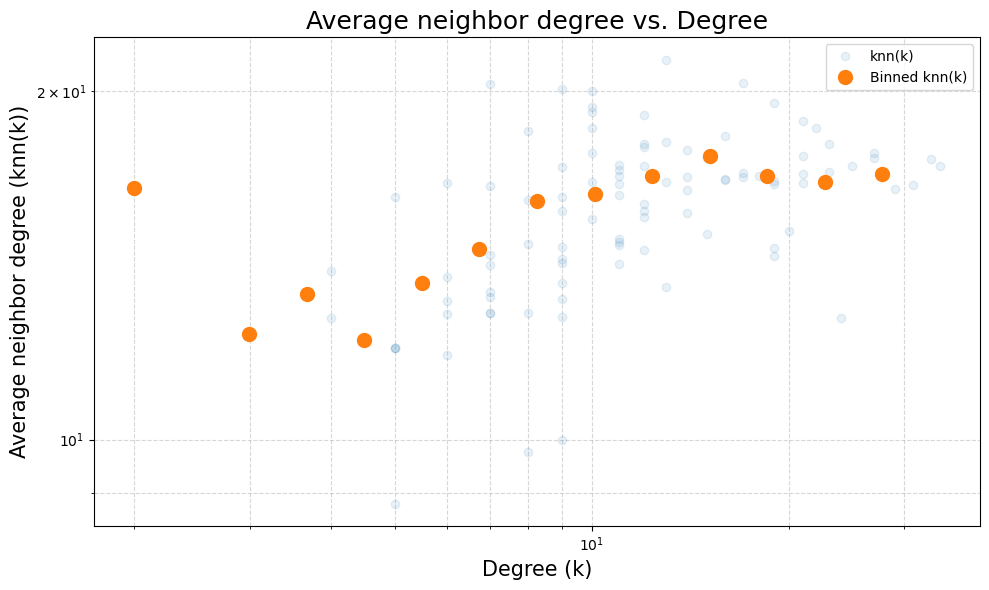

In [137]:
# Plot the average degree of neighbors for each node
xx = list(kDict.values())
yy = [knn[n] for n in kDict.keys()]
xx_filtered = [x for x, y in zip(xx, yy) if not np.isnan(y)]
yy_filtered = [y for y in yy if not np.isnan(y)]

plt.figure(figsize=(10, 6))
plt.loglog(xx_filtered, yy_filtered, 'o', alpha=0.1, label='knn(k)')

logBins = np.logspace(np.log2(np.nanmin(xx_filtered)), np.log2(np.nanmax(xx_filtered)), base=2, num=15)
ybin, xbin, _ = scipy.stats.binned_statistic(xx_filtered, yy_filtered, statistic='mean', bins=logBins)
plt.loglog(xbin[:-1], ybin, 'o', markersize=10, label='Binned knn(k)')

plt.xlabel('Degree (k)', size=15)
plt.ylabel('Average neighbor degree (knn(k))', size=15)
plt.title('Average neighbor degree vs. Degree', size=18)
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.tight_layout()
plt.show()

* These scatter plots show the relationship between the degree of a node and the average degree of its neighbors. An upward trend would indicate assortative mixing, meaning high-degree nodes tend to connect with other high-degree nodes.

### A5 - Weighted networks (Directed Graph)

In [138]:
# Assign weights based on the Popularity attribute
for u, v in superstar_network_restricted.edges():
    popularity_u = superstar_network_restricted.nodes[u]['Popularity']
    popularity_v = superstar_network_restricted.nodes[v]['Popularity']
    weight = max(popularity_u, popularity_v)
    superstar_network_restricted[u][v]['weight'] = weight
    
# View results
print(superstar_network_restricted.edges(data=True))

[('Joanna', 'Jäde', {'weight': 35.0}), ('Joanna', 'Sally', {'weight': 34.0}), ('Joanna', 'KALIKA', {'weight': 34.0}), ('Joanna', 'Zinée', {'weight': 34.0}), ('Joanna', 'Dioscures', {'weight': 34.0}), ('Joanna', 'Lala &ce', {'weight': 47.0}), ('Joanna', 'BabySolo33', {'weight': 34.0}), ('Joanna', 'rad cartier', {'weight': 34.0}), ('Joanna', 'Wit.', {'weight': 39.0}), ('Joanna', 'Le Juiice', {'weight': 34.0}), ('Joanna', 'Myth Syzer', {'weight': 42.0}), ('Joanna', 'Lazuli', {'weight': 34.0}), ('Joanna', 'Ichon', {'weight': 40.0}), ('Joanna', 'SONBEST', {'weight': 34.0}), ('Joanna', 'Yoa', {'weight': 40.0}), ('Joanna', 'Vicky R', {'weight': 34.0}), ('Joanna', 'Poupie', {'weight': 44.0}), ('Joanna', 'Bonnie Banane', {'weight': 40.0}), ('Joanna', 'Lafleyne', {'weight': 34.0}), ('Joanna', 'Asinine', {'weight': 34.0}), ('Jäde', 'rad cartier', {'weight': 35.0}), ('Jäde', 'Lafleyne', {'weight': 35.0}), ('Jäde', 'BabySolo33', {'weight': 35.0}), ('Jäde', 'Zinée', {'weight': 35.0}), ('Jäde', '99',

In [139]:
# Calculate node strength
in_strength = dict(superstar_network_restricted.in_degree(weight='weight'))
out_strength = dict(superstar_network_restricted.out_degree(weight='weight'))

# View results
print("In-Strength:", in_strength)

In-Strength: {'Joanna': 471.0, 'Jäde': 839.0, 'Sally': 265.0, 'KALIKA': 627.0, 'Zinée': 622.0, 'Dioscures': 286.0, 'Lala &ce': 564.0, 'BabySolo33': 415.0, 'rad cartier': 753.0, 'Wit.': 716.0, 'Le Juiice': 486.0, 'Myth Syzer': 215.0, 'Lazuli': 324.0, 'Ichon': 162.0, 'SONBEST': 549.0, 'Yoa': 404.0, 'Vicky R': 334.0, 'Poupie': 354.0, 'Bonnie Banane': 202.0, 'Lafleyne': 155.0, 'Asinine': 356.0, '99': 574.0, 'Chanceko': 584.0, 'Jeunesaint': 287.0, 'Kay The Prodigy': 324.0, 'Theodora': 369.0, 'Meel B': 504.0, 'Bitsu': 274.0, 'Enchantée Julia': 108.0, 'Beamer': 321.0, 'Alicia.': 111.0, 'Tessa B': 120.0, 'DAVINHOR': 205.0, 'TESSÆ': 134.0, 'Chilla': 322.0, 'Meryl': 310.0, 'Angie': 159.0, 'BRÖ': 320.0, 'CHÉRI': 92.0, 'Louisadonna': 108.0, 'ELOI': 215.0, 'Thx4Crying': 171.0, 'THÉA': 221.0, 'Camion Bip Bip': 103.0, 'Paloma': 31.0, 'Ojos': 123.0, 'JeanneTo': 90.0, 'Mara': 52.0, 'Aloïse Sauvage': 235.0, 'Graphy-T': 138.0, 'Simia': 62.0, 'Charlie Motto': 49.0, 'M Le Maudit': 296.0, 'Sheldon': 152.0, 

In [140]:
# View results
print("Out-Strength:", out_strength)

Out-Strength: {'Joanna': 735.0, 'Jäde': 716.0, 'Sally': 668.0, 'KALIKA': 643.0, 'Zinée': 668.0, 'Dioscures': 575.0, 'Lala &ce': 940.0, 'BabySolo33': 672.0, 'rad cartier': 508.0, 'Wit.': 626.0, 'Le Juiice': 502.0, 'Myth Syzer': 467.0, 'Lazuli': 436.0, 'Ichon': 289.0, 'SONBEST': 447.0, 'Yoa': 280.0, 'Vicky R': 319.0, 'Poupie': 398.0, 'Bonnie Banane': 329.0, 'Lafleyne': 262.0, 'Asinine': 460.0, '99': 339.0, 'Chanceko': 402.0, 'Jeunesaint': 286.0, 'Kay The Prodigy': 256.0, 'Theodora': 363.0, 'Meel B': 190.0, 'Bitsu': 207.0, 'Enchantée Julia': 136.0, 'Beamer': 213.0, 'Alicia.': 210.0, 'Tessa B': 530.0, 'DAVINHOR': 306.0, 'TESSÆ': 395.0, 'Chilla': 230.0, 'Meryl': 91.0, 'Angie': 259.0, 'BRÖ': 300.0, 'CHÉRI': 193.0, 'Louisadonna': 267.0, 'ELOI': 537.0, 'Thx4Crying': 155.0, 'THÉA': 155.0, 'Camion Bip Bip': 101.0, 'Paloma': 51.0, 'Ojos': 183.0, 'JeanneTo': 125.0, 'Mara': 413.0, 'Aloïse Sauvage': 215.0, 'Graphy-T': 59.0, 'Simia': 91.0, 'Charlie Motto': 106.0, 'M Le Maudit': 153.0, 'Sheldon': 228.

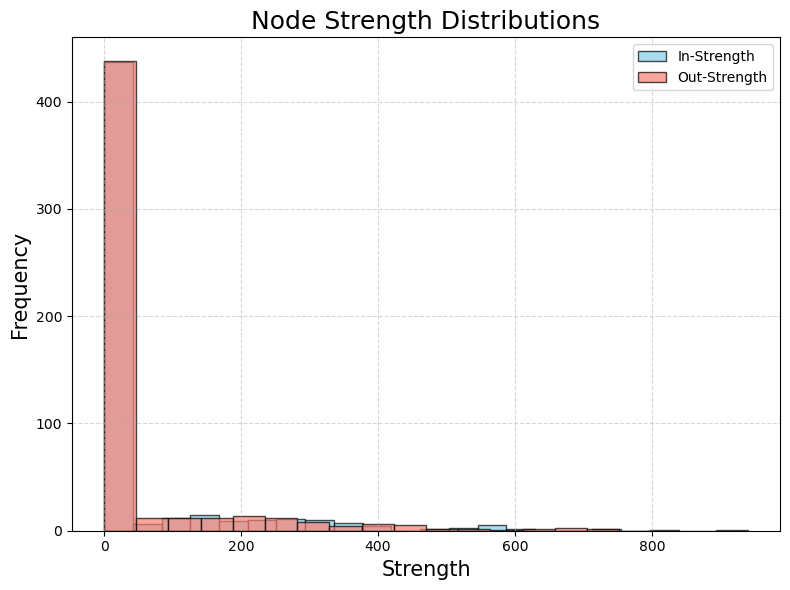

In [141]:
# Strength Distributions
in_strength_values = list(in_strength.values())
out_strength_values = list(out_strength.values())

plt.figure(figsize=(8, 6))
plt.hist(in_strength_values, bins=20, color='skyblue', edgecolor='black', alpha=0.7, label='In-Strength')
plt.hist(out_strength_values, bins=20, color='salmon', edgecolor='black', alpha=0.7, label='Out-Strength')
plt.xlabel('Strength', size=15)
plt.ylabel('Frequency', size=15)
plt.title('Node Strength Distributions', size=18)
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.tight_layout()
plt.show()

* These histograms show the distribution of node strengths in the network. Since the strength is weighted by artist popularity, this plot highlights how influence (through recommendations) is distributed among artists.By weighting connections based on artist popularity, node strength distributions provide a measure of influence within the network. High-strength nodes could signify influential artists within the recommendation network.
* By comparing the distributions of in-strength and out-strength, we notice that we have similar frequencies indicate that there are comparable numbers of nodes with similar strengths in both the in-strength and out-strength distributions. The similar frequencies indicate that the network experiences interactions or influence in both directions, without a significant bias towards incoming or outgoing edges. The differences in strength levels suggest that there's a significant flow of influence or interactions coming into those nodes from other nodes in the network.

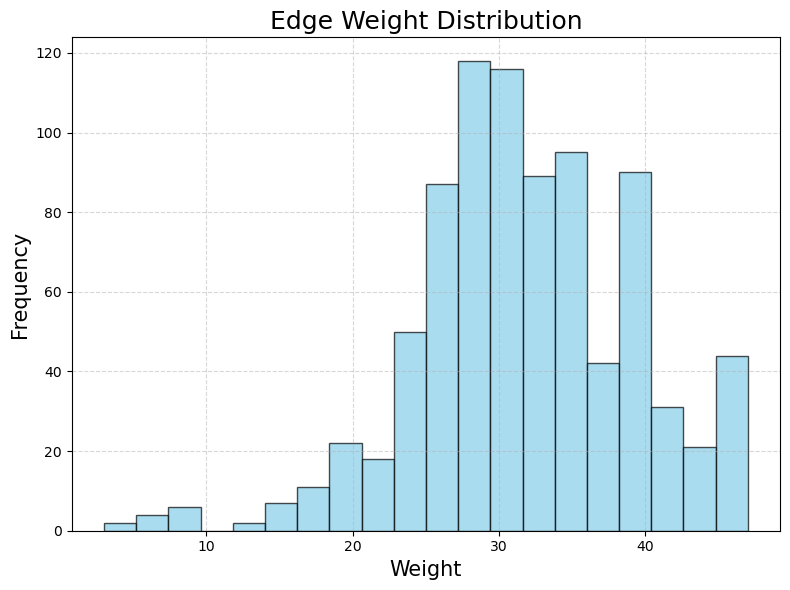

In [142]:
# Weight Distributions
edge_weights = [data['weight'] for _, _, data in superstar_network_restricted.edges(data=True)]

plt.figure(figsize=(8, 6))
plt.hist(edge_weights, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Weight', size=15)
plt.ylabel('Frequency', size=15)
plt.title('Edge Weight Distribution', size=18)
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.tight_layout()
plt.show()

* The distribution of edge weights reveals how the recommendation strengths are spread across the network. We notice a peak at a particular weight range (close to 35), it indicates that a significant number of edges have weights within that ranges which suggests that recommendations are mostly among equally popular artists.

In [143]:
# Correlation Between node degree and edge weights (by using Pearson correlation coefficient)
node_weights = {}
for node in superstar_network_restricted.nodes():
    node_weight = sum(data['weight'] for _, _, data in superstar_network_restricted.edges(node, data=True)) # Calculate the sum of edge weights connected to each node
    node_weights[node] = node_weight
node_weight_values = np.array(list(node_weights.values()))
degree_values = np.array([superstar_network_restricted.degree(node) for node in superstar_network_restricted.nodes()])

correlation_coefficient, p_value = pearsonr(degree_values, node_weight_values)

print("Pearson correlation coefficient:", correlation_coefficient)
print("p-value:", p_value)


Pearson correlation coefficient: 0.9289695084166646
p-value: 1.2231366416547255e-232


* The Pearson correlation coefficient between node degree and edge weights is 0.928, with a very low p-value (close to zero). This indicates a strong positive correlation between the two variables.
* In simpler terms, as the degree of a node (its number of connections) increases, the total weight of its edges also tends to increase significantly. This suggests that nodes with higher degrees tend to have stronger and more influential connections within the network.

In [144]:
# Weight assignment based on the order of recommendation
def assign_weight_based_on_recommendation_order(G):
    sorted_edges = sorted(G.edges(), key=lambda x: x[1])  
    weight_value = 1.0 
    for u, v in sorted_edges:
        G[u][v]['weight'] = weight_value
        weight_value += 0.1  
assign_weight_based_on_recommendation_order(superstar_network_restricted)

# View results
print(superstar_network_restricted.edges(data=True))

[('Joanna', 'Jäde', {'weight': 29.500000000000153}), ('Joanna', 'Sally', {'weight': 59.60000000000058}), ('Joanna', 'KALIKA', {'weight': 31.800000000000185}), ('Joanna', 'Zinée', {'weight': 75.89999999999996}), ('Joanna', 'Dioscures', {'weight': 20.500000000000025}), ('Joanna', 'Lala &ce', {'weight': 36.00000000000024}), ('Joanna', 'BabySolo33', {'weight': 9.499999999999984}), ('Joanna', 'rad cartier', {'weight': 81.89999999999962}), ('Joanna', 'Wit.', {'weight': 73.10000000000012}), ('Joanna', 'Le Juiice', {'weight': 39.40000000000029}), ('Joanna', 'Myth Syzer', {'weight': 47.3000000000004}), ('Joanna', 'Lazuli', {'weight': 37.20000000000026}), ('Joanna', 'Ichon', {'weight': 24.50000000000008}), ('Joanna', 'SONBEST', {'weight': 56.90000000000054}), ('Joanna', 'Yoa', {'weight': 74.90000000000002}), ('Joanna', 'Vicky R', {'weight': 70.90000000000025}), ('Joanna', 'Poupie', {'weight': 52.80000000000048}), ('Joanna', 'Bonnie Banane', {'weight': 13.49999999999997}), ('Joanna', 'Lafleyne', 

In [145]:
# Calculate node strength
in_strength = dict(superstar_network_restricted.in_degree(weight='weight'))
out_strength = dict(superstar_network_restricted.out_degree(weight='weight'))

# View results
print("In-Strength:", in_strength)

In-Strength: {'Joanna': 365.3000000000017, 'Jäde': 703.8000000000038, 'Sally': 540.0000000000052, 'KALIKA': 621.3000000000037, 'Zinée': 1381.4999999999984, 'Dioscures': 188.10000000000028, 'Lala &ce': 438.600000000003, 'BabySolo33': 120.5999999999998, 'rad cartier': 1908.9999999999898, 'Wit.': 1331.1000000000013, 'Le Juiice': 560.7000000000041, 'Myth Syzer': 237.50000000000202, 'Lazuli': 414.7000000000029, 'Ichon': 98.60000000000034, 'SONBEST': 980.9000000000092, 'Yoa': 753.4999999999999, 'Vicky R': 785.4000000000024, 'Poupie': 425.20000000000385, 'Bonnie Banane': 68.49999999999984, 'Lafleyne': 178.5000000000012, 'Asinine': 81.39999999999989, '99': 62.70000000000004, 'Chanceko': 295.7999999999996, 'Jeunesaint': 269.5000000000012, 'Kay The Prodigy': 341.50000000000216, 'Theodora': 799.8000000000059, 'Meel B': 776.9000000000065, 'Bitsu': 104.39999999999978, 'Enchantée Julia': 71.40000000000022, 'Beamer': 133.09999999999974, 'Alicia.': 17.800000000000004, 'Tessa B': 195.30000000000172, 'D

In [146]:
# View results
print("Out-Strength:", out_strength)

Out-Strength: {'Joanna': 877.6000000000034, 'Jäde': 732.6000000000026, 'Sally': 753.0000000000032, 'KALIKA': 737.5000000000038, 'Zinée': 922.3000000000036, 'Dioscures': 971.9000000000017, 'Lala &ce': 811.5000000000025, 'BabySolo33': 1089.6000000000026, 'rad cartier': 591.6000000000041, 'Wit.': 701.3000000000017, 'Le Juiice': 666.5000000000022, 'Myth Syzer': 448.0000000000015, 'Lazuli': 567.8000000000019, 'Ichon': 307.9000000000018, 'SONBEST': 650.8000000000005, 'Yoa': 287.40000000000117, 'Vicky R': 339.9000000000016, 'Poupie': 337.20000000000186, 'Bonnie Banane': 318.50000000000097, 'Lafleyne': 330.60000000000116, 'Asinine': 824.9000000000021, '99': 525.9000000000015, 'Chanceko': 554.5000000000026, 'Jeunesaint': 467.5000000000011, 'Kay The Prodigy': 365.400000000002, 'Theodora': 550.5000000000023, 'Meel B': 323.0000000000012, 'Bitsu': 166.60000000000076, 'Enchantée Julia': 145.100000000001, 'Beamer': 390.5000000000021, 'Alicia.': 358.60000000000264, 'Tessa B': 493.4000000000026, 'DAVIN

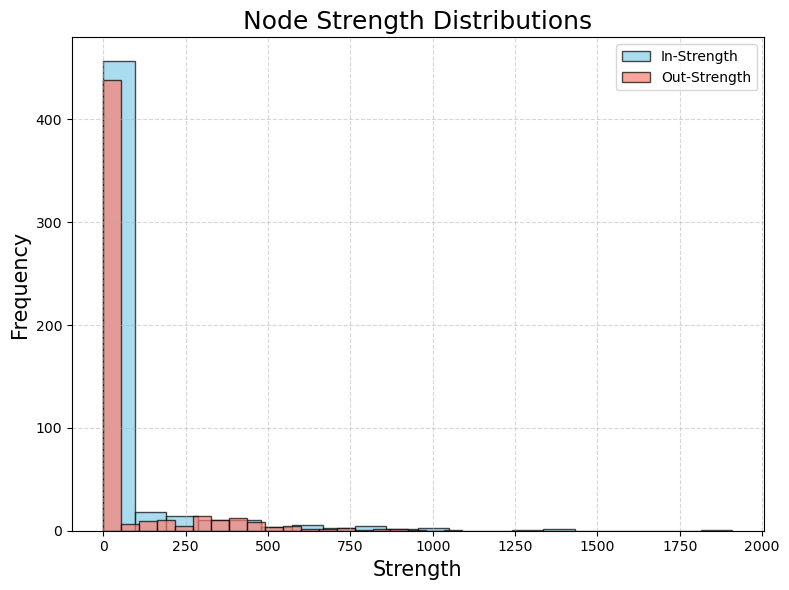

In [147]:
# Strength Distributions
in_strength_values = list(in_strength.values())
out_strength_values = list(out_strength.values())

plt.figure(figsize=(8, 6))
plt.hist(in_strength_values, bins=20, color='skyblue', edgecolor='black', alpha=0.7, label='In-Strength')
plt.hist(out_strength_values, bins=20, color='salmon', edgecolor='black', alpha=0.7, label='Out-Strength')
plt.xlabel('Strength', size=15)
plt.ylabel('Frequency', size=15)
plt.title('Node Strength Distributions', size=18)
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.tight_layout()
plt.show()

* These histograms show the distribution of node strengths in the network. Since the strength is weighted by artist popularity, this plot highlights how influence (through recommendations) is distributed among artists.By weighting connections based on artist's order, node strength distributions provide a measure of influence within the network. High-strength nodes could signify influential artists within the recommendation network.
* By comparing the distributions of in-strength and out-strength, we notice that we have similar frequencies indicate that there are comparable numbers of nodes with similar strengths in both the in-strength and out-strength distributions. The similar frequencies indicate that the network experiences interactions or influence in both directions, without a significant bias towards incoming or outgoing edges. The differences in strength levels suggest that there's a significant flow of influence or interactions coming into those nodes from other nodes in the network.

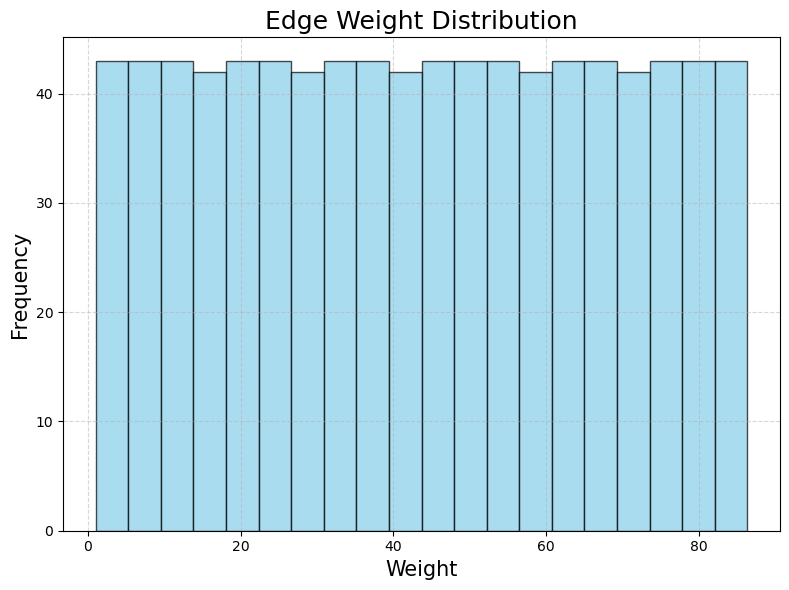

In [148]:
# Weight Distributions
edge_weights = [data['weight'] for _, _, data in superstar_network_restricted.edges(data=True)]

plt.figure(figsize=(8, 6))
plt.hist(edge_weights, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Weight', size=15)
plt.ylabel('Frequency', size=15)
plt.title('Edge Weight Distribution', size=18)
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.tight_layout()
plt.show()

* The graph illustrating the distribution of edge weights shows how the weights of connections between network nodes are distributed. Higher frequencies at the weight levels suggest a prevalence of strong or influential connections within the network.
* As the weight distribution appears random and does not reflect a clear pattern, it may indicate a more varied or unpredictable influence of recommendation order on connection strength.
* there are discrepancies between the weight distribution graph and the strength distribution, which indicates that other factors beyond recommendation order also play a significant role in determining connection strength, such as node attributes or network topology.

In [149]:
# Correlation Between node degree and edge weights (by using Pearson correlation coefficient)
node_weights = {}
for node in superstar_network_restricted.nodes():
    node_weight = sum(data['weight'] for _, _, data in superstar_network_restricted.edges(node, data=True)) # Calculate the sum of edge weights connected to each node
    node_weights[node] = node_weight
node_weight_values = np.array(list(node_weights.values()))
degree_values = np.array([superstar_network_restricted.degree(node) for node in superstar_network_restricted.nodes()])

correlation_coefficient, p_value = pearsonr(degree_values, node_weight_values)

print("Pearson correlation coefficient:", correlation_coefficient)
print("p-value:", p_value)

Pearson correlation coefficient: 0.9514128957727839
p-value: 2.4202047180203185e-275


* The Pearson correlation coefficient between node degree and edge weights is 0.95, with a very low p-value (close to zero). This indicates a strong positive correlation between the two variables.
* In simpler terms, as the degree of a node (its number of connections) increases, the total weight of its edges also tends to increase significantly. This suggests that nodes with higher degrees tend to have stronger and more influential connections within the network.

### A6 - Weighted networks (Undirected Graph)

In [150]:
# Assign weights based on the Popularity attribute
for u, v in superstar_network_restricted_undirected.edges():
    popularity_u = superstar_network_restricted_undirected.nodes[u]['Popularity']
    popularity_v = superstar_network_restricted_undirected.nodes[v]['Popularity']
    weight = max(popularity_u, popularity_v)
    superstar_network_restricted_undirected[u][v]['weight'] = weight
    
# View results
print(superstar_network_restricted_undirected.edges(data=True))

[('Joanna', 'Jäde', {'weight': 35.0}), ('Joanna', 'Sally', {'weight': 34.0}), ('Joanna', 'KALIKA', {'weight': 34.0}), ('Joanna', 'Zinée', {'weight': 34.0}), ('Joanna', 'Dioscures', {'weight': 34.0}), ('Joanna', 'Lala &ce', {'weight': 47.0}), ('Joanna', 'BabySolo33', {'weight': 34.0}), ('Joanna', 'rad cartier', {'weight': 34.0}), ('Joanna', 'Wit.', {'weight': 39.0}), ('Joanna', 'Le Juiice', {'weight': 34.0}), ('Joanna', 'Myth Syzer', {'weight': 42.0}), ('Joanna', 'Lazuli', {'weight': 34.0}), ('Joanna', 'Ichon', {'weight': 40.0}), ('Joanna', 'SONBEST', {'weight': 34.0}), ('Joanna', 'Yoa', {'weight': 40.0}), ('Joanna', 'Vicky R', {'weight': 34.0}), ('Joanna', 'Poupie', {'weight': 44.0}), ('Joanna', 'Bonnie Banane', {'weight': 40.0}), ('Joanna', 'Lafleyne', {'weight': 34.0}), ('Joanna', 'Asinine', {'weight': 34.0}), ('Joanna', 'Alicia.', {'weight': 34.0}), ('Joanna', 'Tessa B', {'weight': 40.0}), ('Joanna', 'TESSÆ', {'weight': 34.0}), ('Joanna', 'BRÖ', {'weight': 34.0}), ('Joanna', 'CHÉRI'

In [151]:
# Calculate node strength
strength = dict(superstar_network_restricted_undirected.degree(weight='weight'))

# View results
print("Strength:", strength)

Strength: {'Joanna': 979.0, 'Jäde': 1228.0, 'Sally': 689.0, 'KALIKA': 789.0, 'Zinée': 1120.0, 'Dioscures': 609.0, 'Lala &ce': 1363.0, 'BabySolo33': 922.0, 'rad cartier': 993.0, 'Wit.': 989.0, 'Le Juiice': 712.0, 'Myth Syzer': 509.0, 'Lazuli': 526.0, 'Ichon': 369.0, 'SONBEST': 689.0, 'Yoa': 444.0, 'Vicky R': 445.0, 'Poupie': 486.0, 'Bonnie Banane': 409.0, 'Lafleyne': 296.0, 'Asinine': 663.0, '99': 679.0, 'Chanceko': 767.0, 'Jeunesaint': 386.0, 'Kay The Prodigy': 484.0, 'Theodora': 579.0, 'Meel B': 556.0, 'Bitsu': 358.0, 'Enchantée Julia': 176.0, 'Beamer': 424.0, 'Alicia.': 210.0, 'Tessa B': 530.0, 'DAVINHOR': 331.0, 'TESSÆ': 395.0, 'Chilla': 414.0, 'Meryl': 357.0, 'Angie': 284.0, 'BRÖ': 421.0, 'CHÉRI': 193.0, 'Louisadonna': 267.0, 'ELOI': 677.0, 'Thx4Crying': 237.0, 'THÉA': 252.0, 'Camion Bip Bip': 122.0, 'Paloma': 51.0, 'Ojos': 183.0, 'JeanneTo': 125.0, 'Mara': 434.0, 'Aloïse Sauvage': 315.0, 'Graphy-T': 138.0, 'Simia': 91.0, 'Charlie Motto': 106.0, 'M Le Maudit': 296.0, 'Sheldon': 228

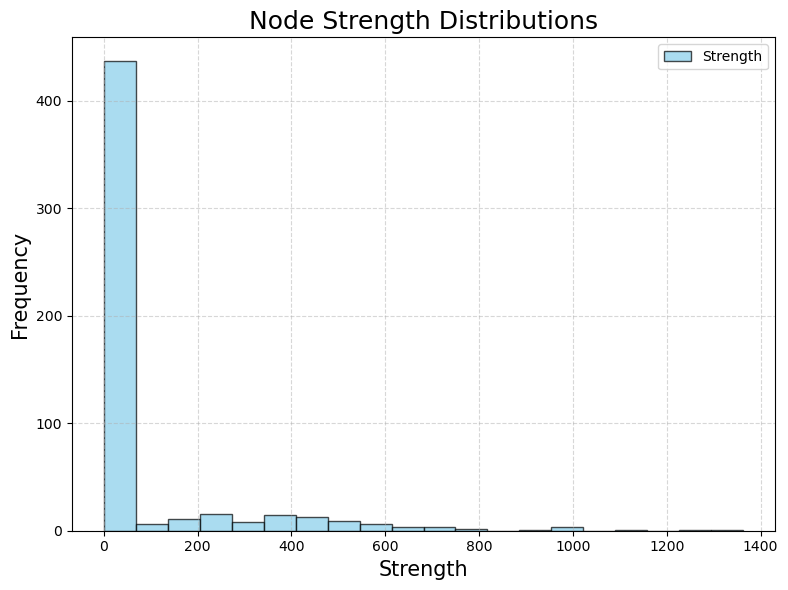

In [152]:
# Strength Distributions
strength_values = list(strength.values())

plt.figure(figsize=(8, 6))
plt.hist(strength_values, bins=20, color='skyblue', edgecolor='black', alpha=0.7, label='Strength')
plt.xlabel('Strength', size=15)
plt.ylabel('Frequency', size=15)
plt.title('Node Strength Distributions', size=18)
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.tight_layout()
plt.show()

* This histogram show the distribution of node strengths in the network. Since the strength is weighted by artist popularity, this plot highlights how influence (through recommendations) is distributed among artists. By weighting connections based on artist popularity, node strength distributions provide a measure of influence within the network. High-strength nodes could signify influential artists within the recommendation network. 

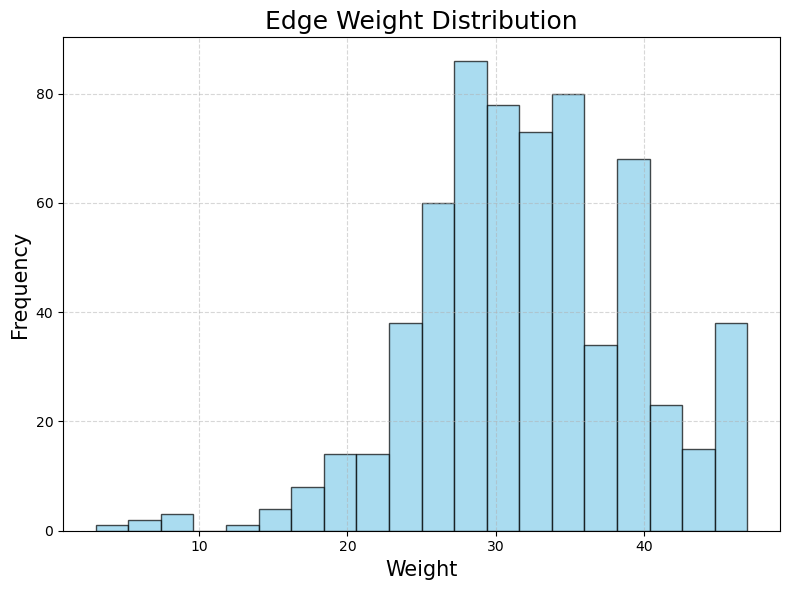

In [153]:
# Weight Distributions
edge_weights = [data['weight'] for _, _, data in superstar_network_restricted_undirected.edges(data=True)]

plt.figure(figsize=(8, 6))
plt.hist(edge_weights, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Weight', size=15)
plt.ylabel('Frequency', size=15)
plt.title('Edge Weight Distribution', size=18)
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.tight_layout()
plt.show()

* The distribution of edge weights reveals how the recommendation strengths are spread across the network. 
* As the weight distribution appears random and does not reflect a clear pattern, it may indicate a more varied or unpredictable influence of recommendation order on connection strength.

In [154]:
# Correlation Between node degree and edge weights (by using Pearson correlation coefficient)
node_weights = {}
for node in superstar_network_restricted_undirected.nodes():
    node_weight = sum(data['weight'] for _, _, data in superstar_network_restricted_undirected.edges(node, data=True)) # Calculate the sum of edge weights connected to each node
    node_weights[node] = node_weight
node_weight_values = np.array(list(node_weights.values()))
degree_values = np.array([superstar_network_restricted_undirected.degree(node) for node in superstar_network_restricted_undirected.nodes()])

correlation_coefficient, p_value = pearsonr(degree_values, node_weight_values)

print("Pearson correlation coefficient:", correlation_coefficient)
print("p-value:", p_value)

Pearson correlation coefficient: 0.9848372732475104
p-value: 0.0


* The Pearson correlation coefficient between node degree and edge weights is 0.98, with a very low p-value (close to zero). This indicates a strong positive correlation between the two variables.
* In simpler terms, as the degree of a node (its number of connections) increases, the total weight of its edges also tends to increase significantly. This suggests that nodes with higher degrees tend to have stronger and more influential connections within the network.

In [155]:
# Weight assignment based on the order of recommendation
def assign_weight_based_on_recommendation_order(G):
    sorted_edges = sorted(G.edges(), key=lambda x: x[1])  
    weight_value = 1.0 
    for u, v in sorted_edges:
        G[u][v]['weight'] = weight_value
        weight_value += 0.1  
assign_weight_based_on_recommendation_order(superstar_network_restricted_undirected)

# View results
print(superstar_network_restricted_undirected.edges(data=True))

[('Joanna', 'Jäde', {'weight': 22.20000000000005}), ('Joanna', 'Sally', {'weight': 44.50000000000036}), ('Joanna', 'KALIKA', {'weight': 22.30000000000005}), ('Joanna', 'Zinée', {'weight': 57.20000000000054}), ('Joanna', 'Dioscures', {'weight': 15.299999999999963}), ('Joanna', 'Lala &ce', {'weight': 25.00000000000009}), ('Joanna', 'BabySolo33', {'weight': 7.6999999999999895}), ('Joanna', 'rad cartier', {'weight': 61.4000000000006}), ('Joanna', 'Wit.', {'weight': 56.30000000000053}), ('Joanna', 'Le Juiice', {'weight': 27.000000000000117}), ('Joanna', 'Myth Syzer', {'weight': 35.10000000000023}), ('Joanna', 'Lazuli', {'weight': 25.400000000000095}), ('Joanna', 'Ichon', {'weight': 18.7}), ('Joanna', 'SONBEST', {'weight': 42.600000000000335}), ('Joanna', 'Yoa', {'weight': 56.90000000000054}), ('Joanna', 'Vicky R', {'weight': 55.00000000000051}), ('Joanna', 'Poupie', {'weight': 39.20000000000029}), ('Joanna', 'Bonnie Banane', {'weight': 9.299999999999985}), ('Joanna', 'Lafleyne', {'weight': 

In [156]:
# Calculate node strength
strength = dict(superstar_network_restricted_undirected.degree(weight='weight'))

# View results
print("Strength:", strength)

Strength: {'Joanna': 800.500000000005, 'Jäde': 922.5000000000056, 'Sally': 636.6000000000041, 'KALIKA': 710.7000000000045, 'Zinée': 1218.800000000009, 'Dioscures': 692.8000000000048, 'Lala &ce': 794.4000000000044, 'BabySolo33': 869.2000000000065, 'rad cartier': 1060.0000000000075, 'Wit.': 913.100000000007, 'Le Juiice': 576.8000000000031, 'Myth Syzer': 339.3000000000018, 'Lazuli': 456.30000000000234, 'Ichon': 200.20000000000053, 'SONBEST': 754.7000000000056, 'Yoa': 377.70000000000266, 'Vicky R': 532.3000000000042, 'Poupie': 343.1000000000023, 'Bonnie Banane': 148.70000000000024, 'Lafleyne': 232.80000000000103, 'Asinine': 726.2000000000054, '99': 486.2000000000031, 'Chanceko': 587.9000000000029, 'Jeunesaint': 414.10000000000247, 'Kay The Prodigy': 426.20000000000226, 'Theodora': 790.8000000000067, 'Meel B': 651.0000000000043, 'Bitsu': 160.90000000000023, 'Enchantée Julia': 103.10000000000014, 'Beamer': 382.7000000000021, 'Alicia.': 112.90000000000086, 'Tessa B': 519.2000000000044, 'DAVIN

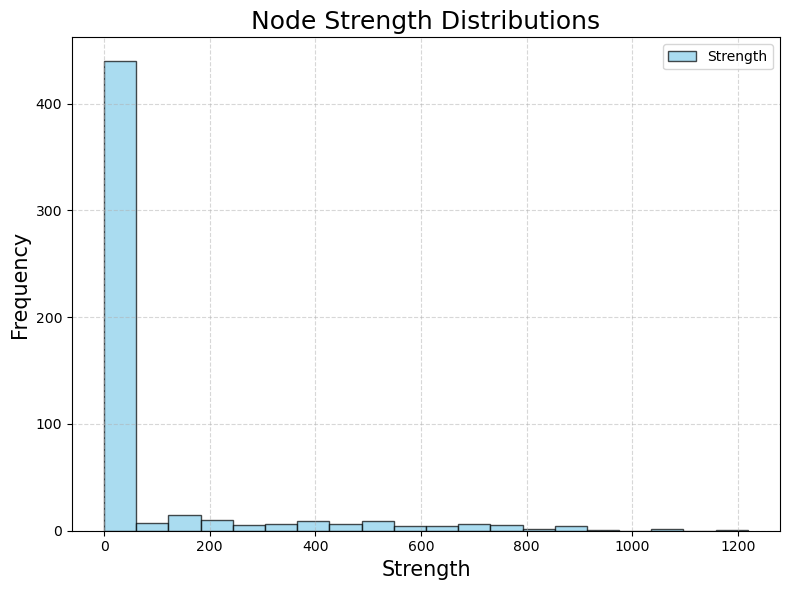

In [157]:
# Strength Distributions
strength_values = list(strength.values())

plt.figure(figsize=(8, 6))
plt.hist(strength_values, bins=20, color='skyblue', edgecolor='black', alpha=0.7, label='Strength')
plt.xlabel('Strength', size=15)
plt.ylabel('Frequency', size=15)
plt.title('Node Strength Distributions', size=18)
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.tight_layout()
plt.show()

* This histogram show the distribution of node strengths in the network. Since the strength is weighted by artist popularity, this plot highlights how influence (through recommendations) is distributed among artists. By weighting connections based on artist's order, node strength distributions provide a measure of influence within the network. High-strength nodes could signify influential artists within the recommendation network.

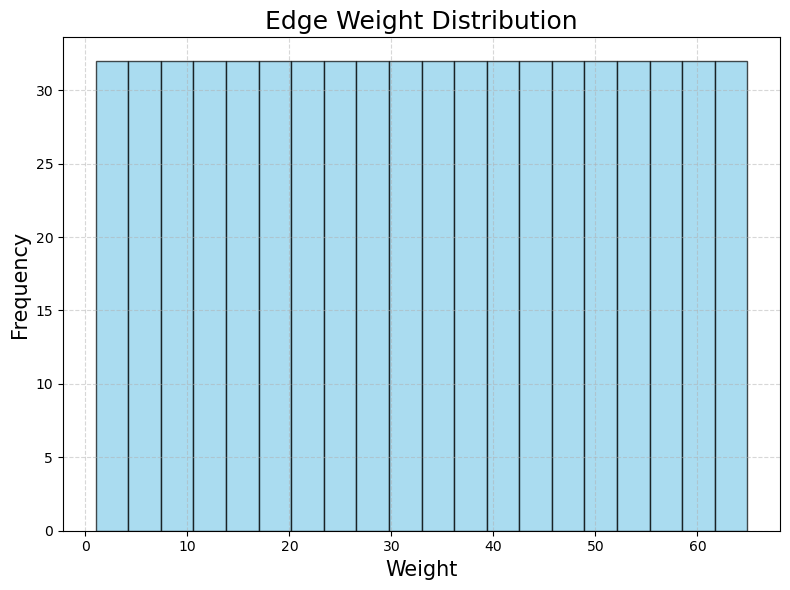

In [158]:
# Weight Distributions
edge_weights = [data['weight'] for _, _, data in superstar_network_restricted_undirected.edges(data=True)]

plt.figure(figsize=(8, 6))
plt.hist(edge_weights, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Weight', size=15)
plt.ylabel('Frequency', size=15)
plt.title('Edge Weight Distribution', size=18)
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.tight_layout()
plt.show()

* The distribution of edge weights reveals how the recommendation strengths are spread across the network. 
* As the weight distribution appears random and does not reflect a clear pattern, it may indicate a more varied or unpredictable influence of recommendation order on connection strength.

In [159]:
# Correlation Between node degree and edge weights (by using Pearson correlation coefficient)
node_weights = {}
for node in superstar_network_restricted_undirected.nodes():
    node_weight = sum(data['weight'] for _, _, data in superstar_network_restricted_undirected.edges(node, data=True)) # Calculate the sum of edge weights connected to each node
    node_weights[node] = node_weight
node_weight_values = np.array(list(node_weights.values()))
degree_values = np.array([superstar_network_restricted_undirected.degree(node) for node in superstar_network_restricted_undirected.nodes()])

correlation_coefficient, p_value = pearsonr(degree_values, node_weight_values)

print("Pearson correlation coefficient:", correlation_coefficient)
print("p-value:", p_value)

Pearson correlation coefficient: 0.9508520491846804
p-value: 4.804080768320962e-274


### A7 - Rich Club (Undirected Graph)

In [160]:
superstar_network_undirected = nx.read_edgelist('Joanna_Network_names.txt', create_using=nx.Graph(), delimiter=', ', data=False)
superstar_network_restricted_undirected = nx.Graph()

for node in superstar_network.nodes():
    if superstar_network.out_degree(node) > 0:
        superstar_network_restricted_undirected.add_node(node)
        for succ in superstar_network.successors(node):
            if superstar_network.out_degree(succ) > 0:
                superstar_network_restricted_undirected.add_edge(node, succ)

print(superstar_network_restricted_undirected.number_of_edges())

640


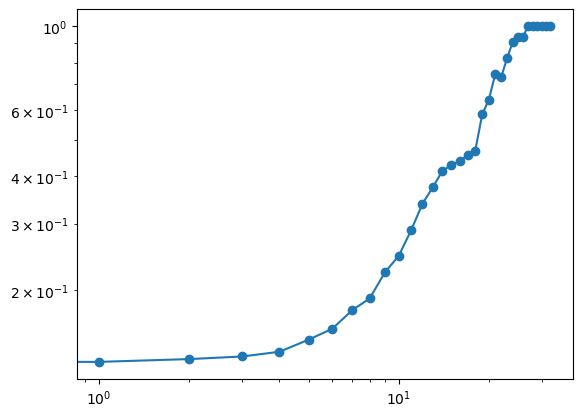

In [161]:
superstar_network_restricted_undirected.remove_edges_from(nx.selfloop_edges(superstar_network_restricted_undirected))
rc = nx.rich_club_coefficient(superstar_network_restricted_undirected, normalized=False, seed=42)
plt.loglog(rc.keys(),rc.values(),'o-')

* Each point on the graph represents the rich club coefficient at a certain node degree.
* The plotted points form a curve that rises sharply, suggests the presence of rich clubs in the network, where highly connected nodes tend to form tightly interconnected groups. The higher the line, the stronger the tendency for rich clubs to form in the network.

## B -Dynamical network property

### B1 - The Robustness (Undirected Graph based on random failure)

In [162]:
nodes_small=[i for i in superstar_network_restricted_undirected.nodes() if superstar_network_restricted_undirected.degree(i)>5]
len(nodes_small)

91

In [163]:
Gs= superstar_network_restricted_undirected.subgraph(nodes_small)
fList=np.linspace(0,1,20)
NtoRem=[int(i*Gs.number_of_nodes()) for i in fList]
print(NtoRem)

[0, 4, 9, 14, 19, 23, 28, 33, 38, 43, 47, 52, 57, 62, 67, 71, 76, 81, 86, 91]


In [164]:
sf=[]
for nn in NtoRem[:-3]:
    thisG=Gs.copy()
    ll=random.sample(list(Gs.nodes()),nn)
    thisG.remove_nodes_from(ll)
    thisSf=len(max(sorted(nx.connected_components(thisG), key = len, reverse=True)))
    sf.append(thisSf/float(Gs.number_of_nodes()))

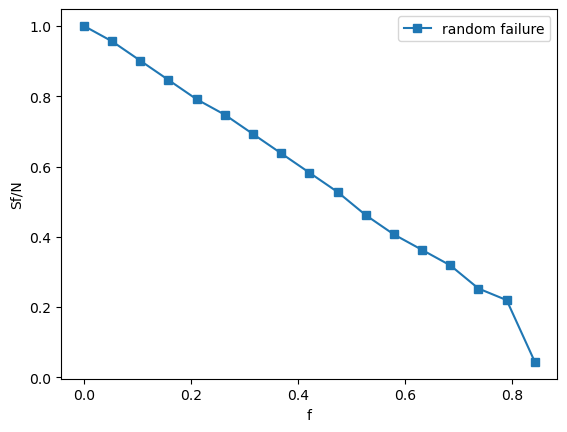

In [165]:
plt.plot(fList[:-3],sf,'s-',label='random failure')
plt.xlabel('f')
plt.ylabel('Sf/N')
plt.legend()
plt.show()

* This graph illustrates the network's resilience to random node failures.

* As more nodes are removed, the normalized size of the largest connected component decreases. This indicates that the network becomes more fragmented and less resilient to random failures. The downward trend in the curve suggests that even a small fraction of node removal can significantly impact the network's connectivity. This information is crucial for understanding the network's robustness and designing strategies to enhance its resilience against random failures.
* As we have a gradual decline suggests greater resilience, it indicates that even with the removal of nodes, the network remains relatively well-connected.

### B2 - The Robustness (Undirected Graph based on centrality) : Target Attack

In [166]:
centrality_measure = nx.degree_centrality(superstar_network_restricted_undirected)
nodes_sorted_by_centrality = sorted(centrality_measure, key=centrality_measure.get, reverse=True)
fList = np.linspace(0, 1, 20)
NtoRem = [int(i * len(nodes_sorted_by_centrality)) for i in fList]

In [167]:
sf = []
for nn in NtoRem[:-3]:
    thisG = superstar_network_restricted_undirected.copy()
    nodes_to_remove = nodes_sorted_by_centrality[:nn]
    thisG.remove_nodes_from(nodes_to_remove)
    largest_cc_size = len(max(nx.connected_components(thisG), key=len))
    sf.append(largest_cc_size / float(len(superstar_network_restricted_undirected)))

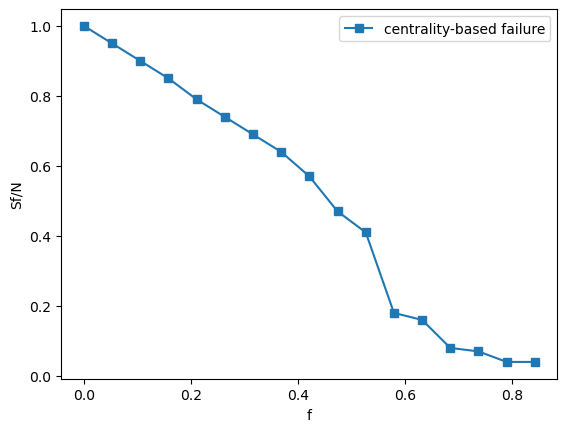

In [168]:
plt.plot(fList[:-3], sf, 's-', label='centrality-based failure')
plt.xlabel('f')
plt.ylabel('Sf/N')
plt.legend()
plt.show()

* In this case, the robustness analysis involves targeted removal of nodes based on centrality measures (degree centrality). The resulting graph can highlight the importance of specific artists within the network. Nodes with high centrality values that, when removed, lead to a significant reduction in network connectivity, may represent key influencers or central figures within the music industry.
* As the centrality-based failure line decreases gradually as more nodes are removed, it indicates that the network is relatively robust to targeted attacks on highly central nodes. So even if highly central nodes are removed, the network can still maintain its overall connectivity reasonably well.

### B3 - Page rank (Directed Graph)

In [169]:
PR = nx.pagerank(superstar_network_restricted)
sorted_PR = sorted(PR.items(), key=lambda x: x[1], reverse=True)

# View results
print("PageRank values for each artist (in descending order):")
for artist, rank in sorted_PR:
    print(f"{artist}: {rank}")

PageRank values for each artist (in descending order):
Neop0p: 0.06656813797328359
Rêves: 0.04449798388198884
err walou: 0.040342361649406286
Thanas: 0.0357355739002004
Ucyll: 0.02022417207137902
Zoomy: 0.01992167337823291
Ucyll & Ryo: 0.01873125519274262
bupropion.: 0.016571188266672983
Vinss: 0.014549851725321564
Meel B: 0.010862794395388141
Zinée: 0.01054766379069023
rad cartier: 0.010421678019055153
M Le Maudit: 0.009055075517547181
Wit.: 0.008533899665154896
Le Blaze: 0.008504040785197673
Nyluu: 0.007859006255800717
Nunca: 0.0077852661497494246
THÉA: 0.007751207993469421
Subtik: 0.007680195192305738
SONBEST: 0.0075193899182546264
wasting shit: 0.007318418447646056
Sadandsolo: 0.007081213454624116
Bricksy & 3g: 0.00648671620131453
Tedax Max: 0.006471531061070998
Shien: 0.0063473259065425945
Le Lij: 0.006196491761456272
KALIKA: 0.005950119193446955
Yoa: 0.0058833719324010774
Realo: 0.005838867390006486
Sheldon: 0.005660261168134914
Thx4Crying: 0.004910035914071442
sean: 0.0048227492

* PageRank measures the importance of each artist in the network based on the structure of connections.
* Artists with higher PageRank values are more influential and are likely to be recommended more frequently.
* Conversely, artists with lower PageRank values may have less influence and may be recommended less often.

### B4 - Page rank (Undirected Graph)

In [170]:
PR = nx.pagerank(superstar_network_restricted_undirected)
sorted_PR = sorted(PR.items(), key=lambda x: x[1], reverse=True)

# View results
print("PageRank values for each artist (in descending order):")
for artist, rank in sorted_PR:
    print(f"{artist}: {rank}")

PageRank values for each artist (in descending order):
Zinée: 0.02353946166863553
Jäde: 0.0233749496030488
rad cartier: 0.021539364205917233
KALIKA: 0.021211274250617067
Lala &ce: 0.020382451763170648
Joanna: 0.019391046232515727
BabySolo33: 0.018589271379676416
Wit.: 0.017562926941390382
Chanceko: 0.016013898949356894
99: 0.015910646552537027
Sally: 0.015369611417592188
SONBEST: 0.015257737134497911
ELOI: 0.015038862915646455
Le Juiice: 0.014863045218206613
Dioscures: 0.014828653523278543
Asinine: 0.014779850359002037
Bricksy & 3g: 0.014578786632027708
Neop0p: 0.013570066578780033
Theodora: 0.013407957817371726
Meel B: 0.013286848028966776
Zoomy: 0.013257648562395714
Nyluu: 0.012821783723982193
Roseboy666: 0.012234285006849935
Lazuli: 0.012112608434554495
Ucyll: 0.01199965134144647
Le Blaze: 0.011638293712975673
Realo: 0.01140743059103999
Ucyll & Ryo: 0.011389422713366466
Beamer: 0.011344321088463907
Mara: 0.011154595692589756
Kay The Prodigy: 0.010977363359991584
BRÖ: 0.0107755926820

### B5 - Community detection (Directed Graph)

In [171]:
# Assign weights based on the Popularity attribute
for u, v in superstar_network_restricted.edges():
    popularity_u = superstar_network_restricted.nodes[u]['Popularity']
    popularity_v = superstar_network_restricted.nodes[v]['Popularity']
    weight = max(popularity_u, popularity_v)
    superstar_network_restricted[u][v]['weight'] = weight
    
# View results
print(superstar_network_restricted.edges(data=True))

[('Joanna', 'Jäde', {'weight': 35.0}), ('Joanna', 'Sally', {'weight': 34.0}), ('Joanna', 'KALIKA', {'weight': 34.0}), ('Joanna', 'Zinée', {'weight': 34.0}), ('Joanna', 'Dioscures', {'weight': 34.0}), ('Joanna', 'Lala &ce', {'weight': 47.0}), ('Joanna', 'BabySolo33', {'weight': 34.0}), ('Joanna', 'rad cartier', {'weight': 34.0}), ('Joanna', 'Wit.', {'weight': 39.0}), ('Joanna', 'Le Juiice', {'weight': 34.0}), ('Joanna', 'Myth Syzer', {'weight': 42.0}), ('Joanna', 'Lazuli', {'weight': 34.0}), ('Joanna', 'Ichon', {'weight': 40.0}), ('Joanna', 'SONBEST', {'weight': 34.0}), ('Joanna', 'Yoa', {'weight': 40.0}), ('Joanna', 'Vicky R', {'weight': 34.0}), ('Joanna', 'Poupie', {'weight': 44.0}), ('Joanna', 'Bonnie Banane', {'weight': 40.0}), ('Joanna', 'Lafleyne', {'weight': 34.0}), ('Joanna', 'Asinine', {'weight': 34.0}), ('Jäde', 'rad cartier', {'weight': 35.0}), ('Jäde', 'Lafleyne', {'weight': 35.0}), ('Jäde', 'BabySolo33', {'weight': 35.0}), ('Jäde', 'Zinée', {'weight': 35.0}), ('Jäde', '99',

In [172]:
C = nx.community.louvain_communities(superstar_network_restricted, weight='weight', resolution=0.6)
community_artists = {}
for i, community in enumerate(C):
    community_frozenset = frozenset(community)
    community_artists[i] = community_frozenset

# View results
for community_id, community_frozenset in community_artists.items():
    print(f"Community {community_id}: {community_frozenset}")

Community 0: frozenset({'Simia', 'Poupie', 'Thx4Crying', 'JeanneTo', 'TESSÆ', 'Nyoko Bokbae', 'Sally', 'Alicia.', 'Aloïse Sauvage', 'Meryl', 'Chilla', 'Enchantée Julia', 'Lafleyne', 'Mara', 'Yoa', 'Louisadonna', 'Charlie Motto', 'Vicky R', 'BRÖ', 'DAVINHOR', 'Camion Bip Bip', 'CHÉRI', 'Le Juiice', 'THÉA', 'Graphy-T', 'Joanna', 'Paloma', 'Angie', 'Lazuli', 'Tessa B', 'KALIKA', 'Jäde', 'Ojos'})
Community 1: frozenset({'SONBEST', 'Makala', 'Bitsu', 'Ichon', 'Subtik', 'Lala &ce', 'Dioscures', '6osy', '99', 'Le Blaze', 'Wit.', 'Bonnie Banane', 'Jeunesaint', 'Retro X', 'twinsmatic', 'Chanceko', 'EDGE', 'bupropion.', 'rad cartier', 'sean', 'Vinss', 'Batboy', 'Tedax Max', 'Jorrdee', 'Luni', 'Azur', 'JMK$', 'Kobo', 'Myth Syzer', 'Slimka'})
Community 2: frozenset({'Sheldon', 'Zinée', 'Damlif', 'Inspire', 'M Le Maudit', 'Shien'})
Community 3: frozenset({'snorunt', 'Beamer', 'Roseboy666', 'Ucyll', 'Mandyspie', 'arøne', 'Nyluu', 'Nunca', 'DOR', 'Asinine', 'wasting shit', 'Rêves', 'Le Lij', 'ELOI', 

* Louvain community detection indicate the modular structure, revealing clusters or communities of artists within the network. Artists within the same community may have similar attributes or be part of a common genre or label, and they are more densely connected to each other than to artists outside their community.
* Community 0: This community comprises a diverse range of popular artists with high scores of popularity, suggesting that they share similar fan bases or frequently collaborate with each other. These artists may belong to similar music genres or have overlapping audiences, leading to strong connections within the community.
* Community 1: This community consists of artists who may have distinct styles or appeal to a specific niche audience. Despite being smaller in size compared to Community 0, the artists within this community share commonalities that make them more closely connected to each other than to artists outside the community. The presence of artists like Taylor Swift, Justin Bieber, and Shawn Mendes in the same community indicates commonalities in their music or audience demographics.
* Community 2: Artists in this community may have unique characteristics or appeal to a particular demographic, resulting in a distinct cluster within the network. The smaller size of this community suggests a tighter-knit group with more specialized connections.
* Community 3: FINNEAS appears to be a standalone artist in a community of their own, indicating a unique position within the network. This could be due to factors such as a distinct musical style, solo career, or limited collaborations with other artists in the dataset.
* Overall, the communities reflect the underlying structure of the network and provide insights into how artists are interconnected based on their popularity scores and possibly other factors like musical genres, collaborations, or audience demographics.

In [173]:
communities = nx.community.greedy_modularity_communities(superstar_network_restricted)

# Afficher les communautés détectées
for i, community in enumerate(communities):
    print(f"Community {i+1}: {community}")

Community 1: frozenset({'Simia', 'Poupie', 'Thx4Crying', 'JeanneTo', 'TESSÆ', 'Sally', 'Alicia.', 'Aloïse Sauvage', 'Meryl', 'Chilla', 'Enchantée Julia', 'Lafleyne', 'Mara', 'Yoa', 'Louisadonna', 'Charlie Motto', 'Vicky R', 'BRÖ', 'DAVINHOR', 'Camion Bip Bip', 'CHÉRI', 'Le Juiice', 'THÉA', 'Graphy-T', 'Joanna', 'ELOI', 'Paloma', 'Angie', 'Lazuli', 'Tessa B', 'KALIKA', 'Jäde', 'Ojos'})
Community 2: frozenset({'Makala', 'SONBEST', 'Ichon', 'Subtik', 'DOR', 'Lala &ce', 'Dioscures', '6osy', '99', 'Le Lij', 'Le Blaze', 'Bonnie Banane', 'Wit.', 'Jeunesaint', 'twinsmatic', 'Chanceko', 'EDGE', 'rad cartier', 'Myth Syzer', 'La Ligne Bleue', 'Vinss', 'sean', 'Batboy', 'Tedax Max', 'Luni', 'Sadandsolo', 'Nyoko Bokbae', 'Kobo', 'EXOSLAYER', 'Slimka'})
Community 3: frozenset({'snorunt', 'Beamer', 'Mandyspie', 'Roseboy666', 'Ucyll', 'arøne', 'Nyluu', 'Nunca', 'wasting shit', 'Rêves', 'Jwles', 'Realo', 'bupropion.', 'Zoomy', 'Neop0p', 'Angsty Camboyz Revenge', 'err walou', 'Theodora', 'Thanas', 'Meel

* The modularity score measures the strength of division of a network into communities. A higher modularity score indicates a stronger community structure.
* The detected communities provide insights into the underlying structure of the superstar network. Artists within the same community may share common traits, genres, collaborations, or fan bases. Understanding these communities can help identify clusters of related artists and uncover underlying patterns or trends in the music industry.

### B6 - Community detection (Undirected Graph)

In [174]:
C = nx.community.louvain_communities(superstar_network_restricted_undirected, weight='weight', resolution=0.6)
community_artists = {}
for i, community in enumerate(C):
    community_frozenset = frozenset(community)
    community_artists[i] = community_frozenset

# View results
for community_id, community_frozenset in community_artists.items():
    print(f"Community {community_id}: {community_frozenset}")

Community 0: frozenset({'Simia', 'Poupie', 'JeanneTo', 'Thx4Crying', 'TESSÆ', 'Bonnie Banane', 'Sally', 'Alicia.', 'Aloïse Sauvage', 'Meryl', 'Chilla', 'Enchantée Julia', 'Lafleyne', 'Mara', 'Yoa', 'Kay The Prodigy', 'Louisadonna', 'Charlie Motto', 'Vicky R', 'BRÖ', 'DAVINHOR', 'Camion Bip Bip', 'CHÉRI', 'Le Juiice', 'THÉA', 'Graphy-T', 'Joanna', 'Paloma', 'Angie', 'Lazuli', 'Tessa B', 'KALIKA', 'Jäde', 'Zinée', 'Ojos'})
Community 1: frozenset({'Sheldon', 'Damlif', 'Inspire', 'M Le Maudit', 'Shien'})
Community 2: frozenset({'Beamer', 'Makala', 'Ichon', 'Subtik', 'Lala &ce', '6osy', '99', 'Le Lij', 'Le Blaze', 'Jwles', 'Jeunesaint', 'twinsmatic', 'Chanceko', 'EXOSLAYER', 'bupropion.', 'rad cartier', 'La Ligne Bleue', 'Jorrdee', 'Sadandsolo', 'JMK$', 'SONBEST', 'Bitsu', 'DOR', 'Dioscures', 'Wit.', 'Retro X', 'EDGE', 'sean', 'Vinss', 'Batboy', 'Tedax Max', 'Luni', 'Meel B', 'Azur', 'Nyoko Bokbae', 'Bricksy & 3g', 'Kobo', 'Myth Syzer', 'Slimka'})
Community 3: frozenset({'snorunt', 'Roseboy

* Overall, the community detection algorithm has effectively grouped artists based on their network connections, providing insights into the underlying structure of the music network and potential relationships between artists.
* Community 0: This community includes artists like Miley Cyrus, Lady Gaga, Cardi B, and others. These artists likely share similar characteristics or musical styles, leading to strong connections within this group.
* Community 1: Artists such as Taylor Swift, Ed Sheeran, Ariana Grande, and Justin Bieber are grouped together in this community. These artists might have overlapping fan bases, collaborations, or similar genres, resulting in their close association within the network.
* Community 2: This community consists of a diverse range of artists including girl in red, Arctic Monkeys, Olivia Rodrigo, and Billie Eilish. While they may not have direct collaborations, they might share thematic elements or appeal to similar audiences, leading to their clustering within this community.
* There are no standalone artists in a community of their own.

In [175]:
communities = nx.community.greedy_modularity_communities(superstar_network_restricted_undirected)

# Afficher les communautés détectées
for i, community in enumerate(communities):
    print(f"Community {i+1}: {community}")

Community 1: frozenset({'Beamer', 'Ucyll', 'Makala', 'Ichon', 'Nunca', 'Subtik', 'Lala &ce', '6osy', '99', 'Le Lij', 'Le Blaze', 'Jwles', 'Jeunesaint', 'twinsmatic', 'Chanceko', 'bupropion.', 'rad cartier', 'La Ligne Bleue', 'Jorrdee', 'Sadandsolo', 'JMK$', 'SONBEST', 'Bitsu', 'DOR', 'Dioscures', 'Wit.', 'Retro X', 'EDGE', 'Myth Syzer', 'Zoomy', 'sean', 'Vinss', 'Batboy', 'Tedax Max', 'Luni', 'Meel B', 'Azur', 'Ucyll & Ryo', 'Nyoko Bokbae', 'Bricksy & 3g', 'Kobo', 'EXOSLAYER', 'Slimka'})
Community 2: frozenset({'Simia', 'Poupie', 'Thx4Crying', 'JeanneTo', 'TESSÆ', 'Bonnie Banane', 'Sally', 'Alicia.', 'Aloïse Sauvage', 'Meryl', 'Chilla', 'Enchantée Julia', 'Lafleyne', 'Mara', 'Yoa', 'Kay The Prodigy', 'Louisadonna', 'Charlie Motto', 'Vicky R', 'BRÖ', 'DAVINHOR', 'Camion Bip Bip', 'CHÉRI', 'Le Juiice', 'THÉA', 'Graphy-T', 'Joanna', 'ELOI', 'Paloma', 'Angie', 'Lazuli', 'Tessa B', 'KALIKA', 'Jäde', 'Zinée', 'Ojos'})
Community 3: frozenset({'snorunt', 'Roseboy666', 'Mandyspie', '09PEAS', 'a